In [303]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [304]:
df=pd.read_csv("../VSCode/sample_mmp.csv")

C:\Users\admin\AppData\Local\Temp\ipykernel_6720\2135249147.py:1: DtypeWarning: Columns (29,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("../VSCode/sample_mmp.csv")


In [305]:
df["HasDetections"].value_counts()

HasDetections
0    250047
1    249953
Name: count, dtype: int64

In [306]:
#Fijamos 'HasDetections' como nuestra variable target
target_col="HasDetections"

<Axes: xlabel='HasDetections'>

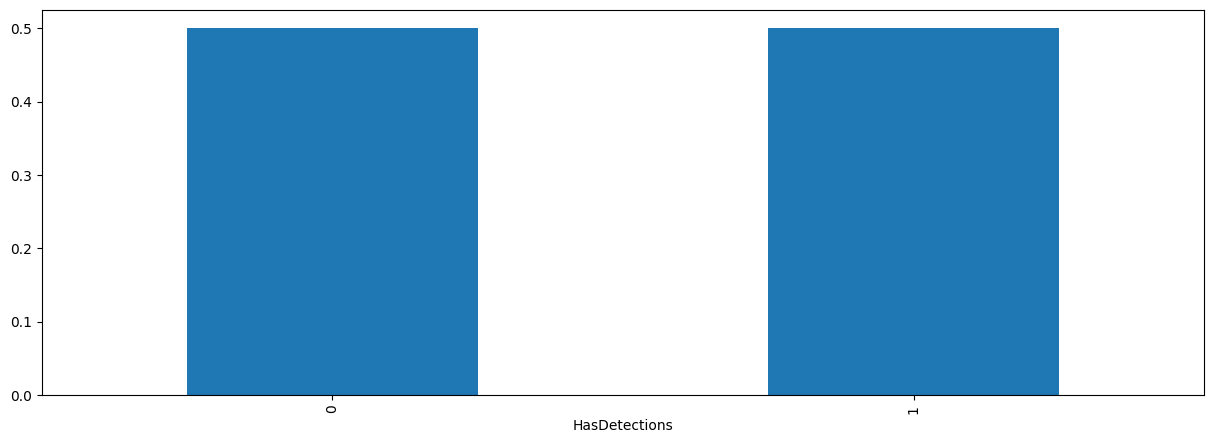

In [307]:
df[target_col].value_counts(normalize = True).plot(kind = 'bar')
#Podemos ver que la variable target está bastante balanceada. 

In [308]:
df.columns

Index(['Unnamed: 0', 'MachineIdentifier', 'ProductName', 'EngineVersion',
       'AppVersion', 'AvSigVersion', 'IsBeta', 'RtpStateBitfield',
       'IsSxsPassiveMode', 'DefaultBrowsersIdentifier',
       'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled',
       'HasTpm', 'CountryIdentifier', 'CityIdentifier',
       'OrganizationIdentifier', 'GeoNameIdentifier',
       'LocaleEnglishNameIdentifier', 'Platform', 'Processor', 'OsVer',
       'OsBuild', 'OsSuite', 'OsPlatformSubRelease', 'OsBuildLab',
       'SkuEdition', 'IsProtected', 'AutoSampleOptIn', 'PuaMode', 'SMode',
       'IeVerIdentifier', 'SmartScreen', 'Firewall', 'UacLuaenable',
       'Census_MDC2FormFactor', 'Census_DeviceFamily',
       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_ProcessorClass',
       'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeN

In [309]:
df.shape

(500000, 84)

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 84 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Unnamed: 0                                         500000 non-null  int64  
 1   MachineIdentifier                                  500000 non-null  object 
 2   ProductName                                        500000 non-null  object 
 3   EngineVersion                                      500000 non-null  object 
 4   AppVersion                                         500000 non-null  object 
 5   AvSigVersion                                       500000 non-null  object 
 6   IsBeta                                             500000 non-null  int64  
 7   RtpStateBitfield                                   498168 non-null  float64
 8   IsSxsPassiveMode                                   500000 non-null  int64 

In [311]:
#Voy a realizar algunos cambios en los tipos de datos para que el dataset pese menos y tenga menor carga computacional
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

In [312]:
#Ejecuto la modificación de los dtypes
df = df.astype(dtypes)

In [313]:
#Lo compruebo..
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 84 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   Unnamed: 0                                         500000 non-null  int64   
 1   MachineIdentifier                                  500000 non-null  category
 2   ProductName                                        500000 non-null  category
 3   EngineVersion                                      500000 non-null  category
 4   AppVersion                                         500000 non-null  category
 5   AvSigVersion                                       500000 non-null  category
 6   IsBeta                                             500000 non-null  int8    
 7   RtpStateBitfield                                   498168 non-null  float16 
 8   IsSxsPassiveMode                                   500000 non-nu

In [314]:
#Vemos el porcentaje de nulos que tiene cada columna.
pd.set_option('display.max_rows', None)
total=df.isnull().sum().sort_values(ascending=False)
porcentaje=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_data=pd.concat([total,porcentaje], axis=1, keys=['Total','Porcentaje'])
missing_data

Total  Porcentaje
PuaMode                                            499874     99.9748
Census_ProcessorClass                              497918     99.5836
DefaultBrowsersIdentifier                          475939     95.1878
Census_IsFlightingInternal                         415225     83.0450
Census_InternalBatteryType                         355603     71.1206
Census_ThresholdOptIn                              318104     63.6208
Census_IsWIMBootEnabled                            317666     63.5332
SmartScreen                                        178596     35.7192
OrganizationIdentifier                             154563     30.9126
SMode                                               29848      5.9696
CityIdentifier                                      18240      3.6480
Wdft_IsGamer                                        16950      3.3900
Wdft_RegionIdentifier                               16950      3.3900
Census_InternalBatteryNumberOfCharges               15038      3.0076
Census_FirmwareManufacturerIdentifier               10349      2.0698
Census_FirmwareVersionIdentifier                     9061      1.8122
Census_IsFlightsDisabled                             8933      1.7866
Census_OEMModelIdentifier                            5764      1.1528
Census_OEMNameIdentifier                             5381      1.0762
Firewall                                             5162      1.0324
Census_TotalPhysicalRAM                              4556      0.9112
Census_IsAlwaysOnAlwaysConnectedCapable              4040      0.8080
Census_OSInstallLanguageIdentifier                   3332      0.6664
IeVerIdentifier                                      3209      0.6418
Census_PrimaryDiskTotalCapacity                      2976      0.5952
Census_SystemVolumeTotalCapacity                     2976      0.5952
Census_InternalPrimaryDiagonalDisplaySizeInInches    2654      0.5308
Census_InternalPrimaryDisplayResolutionHorizontal    2650      0.5300
Census_InternalPrimaryDisplayResolutionVertical      2650      0.5300
Census_ProcessorModelIdentifier                      2349      0.4698
Census_ProcessorCoreCount                            2347      0.4694
Census_ProcessorManufacturerIdentifier               2347      0.4694
AVProductsEnabled                                    1938      0.3876
AVProductStatesIdentifier                            1938      0.3876
AVProductsInstalled                                  1938      0.3876
IsProtected                                          1926      0.3852
RtpStateBitfield                                     1832      0.3664
Census_IsVirtualDevice                                901      0.1802
Census_PrimaryDiskTypeName                            709      0.1418
UacLuaenable                                          623      0.1246
Census_ChassisTypeName                                 37      0.0074
GeoNameIdentifier                                      16      0.0032
Census_PowerPlatformRoleName                            2      0.0004
OsBuildLab                                              1      0.0002
Census_OSSkuName                                        0      0.0000
Census_OSEdition                                        0      0.0000
Census_OSWUAutoUpdateOptionsName                        0      0.0000
Census_OSInstallTypeName                                0      0.0000
Census_OSUILocaleIdentifier                             0      0.0000
Census_IsSecureBootEnabled                              0      0.0000
Census_IsPenCapable                                     0      0.0000
Census_IsTouchEnabled                                   0      0.0000
Census_OSBuildNumber                                    0      0.0000
Census_IsPortableOperatingSystem                        0      0.0000
Census_GenuineStateName                                 0      0.0000
Census_ActivationChannel                                0      0.0000
Census_FlightRing                                       0     

In [315]:
#Elimino las variables que tienen gran cantidad de nulos. En este caso a partir de un 60% parece una cantidad razonable.
variables_muchos_nulos=["PuaMode",
                        "Census_ProcessorClass",
                        "DefaultBrowsersIdentifier",
                        "Census_IsFlightingInternal",
                        "Census_InternalBatteryType",
                        "Census_ThresholdOptIn",
                        "Census_IsWIMBootEnabled"]

df.drop(variables_muchos_nulos,inplace=True,axis=1)

In [316]:
df.drop("Unnamed: 0",inplace=True,axis=1)

In [317]:
#Ahora separo mis variables en tres categorias: id, numéricas y  categóricas.

In [318]:
id_cols=["MachineIdentifier", 
         "AVProductStatesIdentifier",
         "CountryIdentifier",
         "CityIdentifier",
         "OrganizationIdentifier",
         "GeoNameIdentifier",
         "LocaleEnglishNameIdentifier",
         "IeVerIdentifier",
         "Census_OEMNameIdentifier",
         "Census_OEMModelIdentifier",
         "Census_ProcessorManufacturerIdentifier",
         "Census_ProcessorModelIdentifier",
         "Census_OSInstallLanguageIdentifier",
         "Census_OSUILocaleIdentifier",
         "Census_FirmwareManufacturerIdentifier",
         "Census_FirmwareVersionIdentifier",
         "Wdft_RegionIdentifier"]
print("ID columns",id_cols)

ID columns ['MachineIdentifier', 'AVProductStatesIdentifier', 'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier', 'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'IeVerIdentifier', 'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier', 'Census_ProcessorManufacturerIdentifier', 'Census_ProcessorModelIdentifier', 'Census_OSInstallLanguageIdentifier', 'Census_OSUILocaleIdentifier', 'Census_FirmwareManufacturerIdentifier', 'Census_FirmwareVersionIdentifier', 'Wdft_RegionIdentifier']


In [319]:


numeric_cols = df.select_dtypes(include=["int8", "int16","int32", "float16","float32"]).columns.tolist()
numeric_cols = [c for c in numeric_cols if c != target_col and c not in id_cols]
print("Variables numéricas:", numeric_cols)

Variables numéricas: ['IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode', 'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm', 'OsBuild', 'OsSuite', 'IsProtected', 'AutoSampleOptIn', 'SMode', 'Firewall', 'UacLuaenable', 'Census_ProcessorCoreCount', 'Census_PrimaryDiskTotalCapacity', 'Census_SystemVolumeTotalCapacity', 'Census_HasOpticalDiskDrive', 'Census_TotalPhysicalRAM', 'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'Census_InternalPrimaryDisplayResolutionHorizontal', 'Census_InternalPrimaryDisplayResolutionVertical', 'Census_InternalBatteryNumberOfCharges', 'Census_OSBuildNumber', 'Census_OSBuildRevision', 'Census_IsPortableOperatingSystem', 'Census_IsFlightsDisabled', 'Census_IsSecureBootEnabled', 'Census_IsVirtualDevice', 'Census_IsTouchEnabled', 'Census_IsPenCapable', 'Census_IsAlwaysOnAlwaysConnectedCapable', 'Wdft_IsGamer']


In [320]:
categoric_cols = df.select_dtypes(include=['category']).columns.tolist()
categoric_cols = [c for c in categoric_cols if c not in id_cols] 
print("Variables categóricas: ", categoric_cols)

Variables categóricas:  ['ProductName', 'EngineVersion', 'AppVersion', 'AvSigVersion', 'Platform', 'Processor', 'OsVer', 'OsPlatformSubRelease', 'OsBuildLab', 'SkuEdition', 'SmartScreen', 'Census_MDC2FormFactor', 'Census_DeviceFamily', 'Census_PrimaryDiskTypeName', 'Census_ChassisTypeName', 'Census_PowerPlatformRoleName', 'Census_OSVersion', 'Census_OSArchitecture', 'Census_OSBranch', 'Census_OSEdition', 'Census_OSSkuName', 'Census_OSInstallTypeName', 'Census_OSWUAutoUpdateOptionsName', 'Census_GenuineStateName', 'Census_ActivationChannel', 'Census_FlightRing']


In [321]:
print(len(id_cols))
print(len(numeric_cols))
print(len(categoric_cols))


17
32
26


# EDA

### ANALISIS UNIVARIANTE

In [322]:
#Visualizo las columnas de variables numéricas mediante histogramas y boxplots.
plt.rcParams['figure.figsize'] = [15, 5]

In [323]:
def plot_histogram_and_boxplot(df, column_name):
    df_ = df.loc[df[column_name].notnull()]
    
    fig = plt.figure()
    fig.suptitle(column_name, fontsize=16)
    fig.subplots_adjust(wspace = 0.3)
    
    ax1 = fig.add_subplot(121)
    ax1.set_title("histogram")
    ax1.hist(df_[column_name], bins = 25)
    
    ax2 = fig.add_subplot(122)
    ax2.set_title("boxplot")
    ax2.boxplot(df_[column_name], vert = False)

C:\Users\admin\AppData\Local\Temp\ipykernel_6720\898009161.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


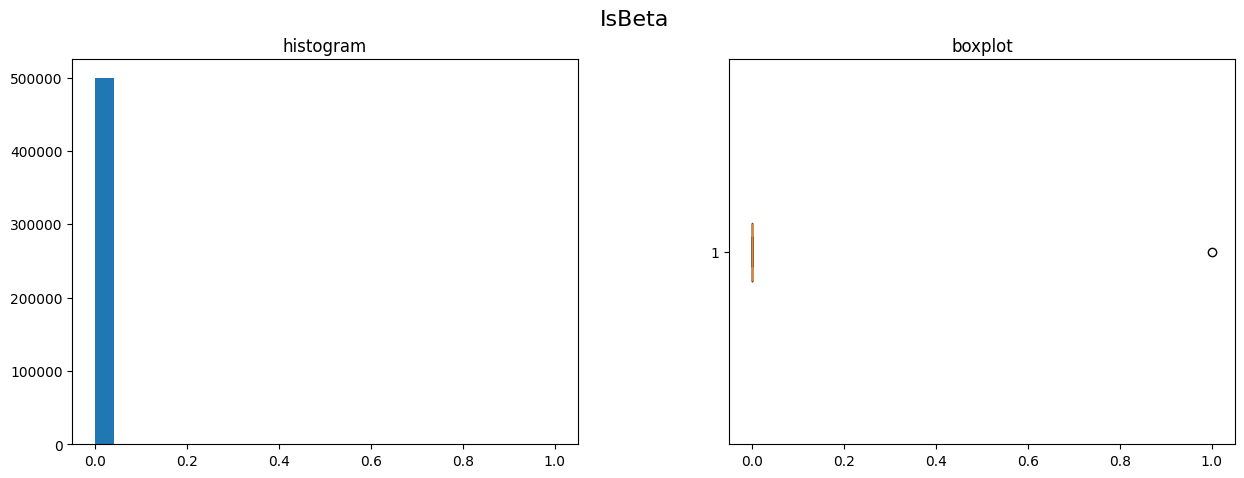

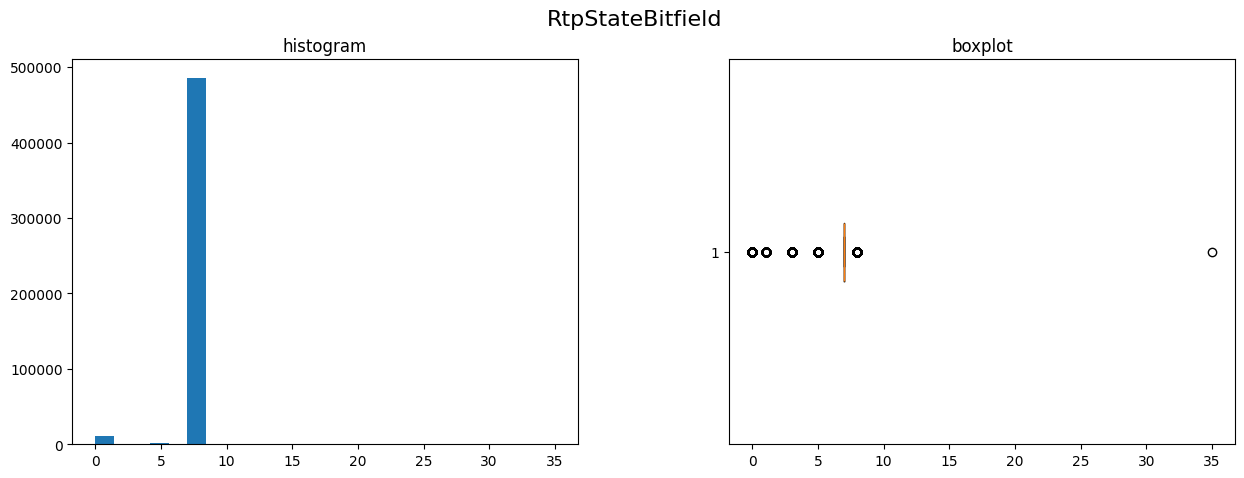

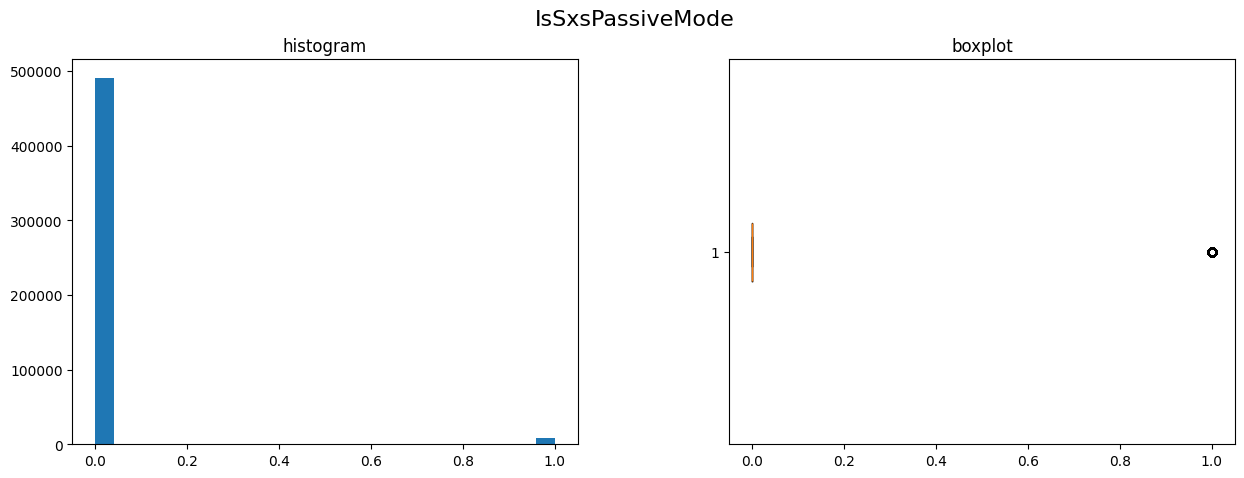

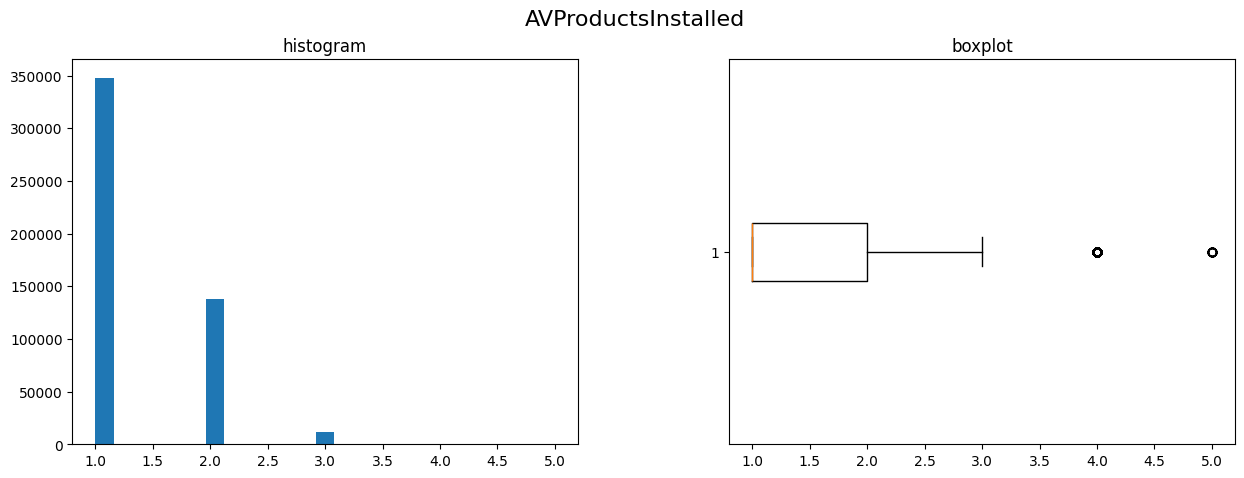

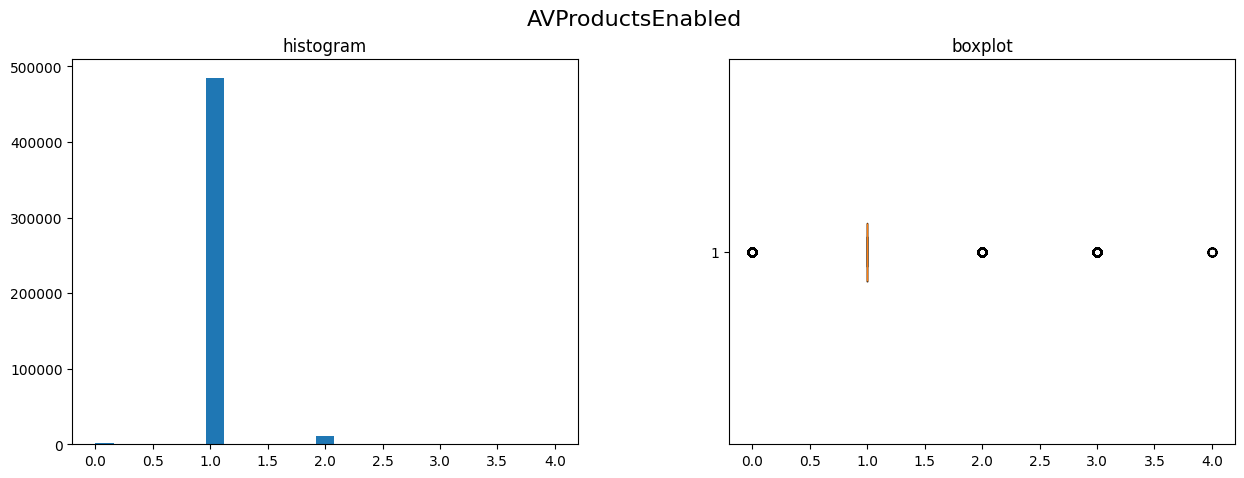

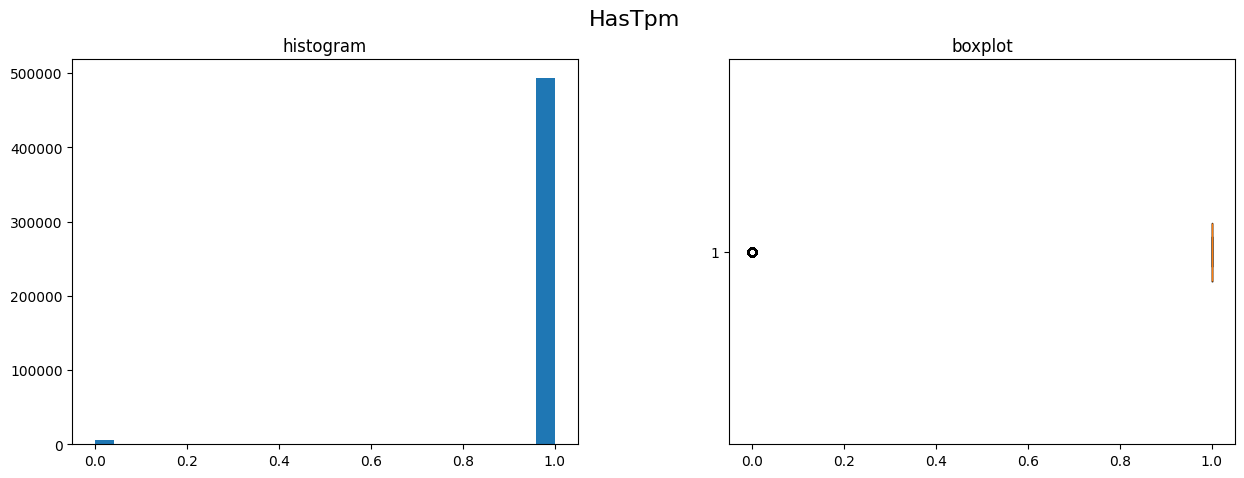

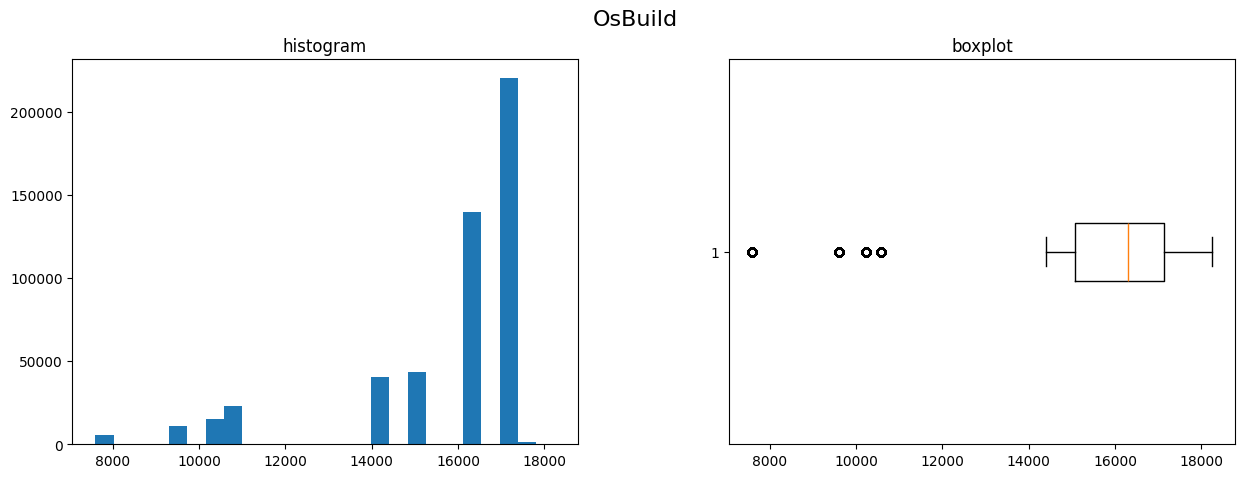

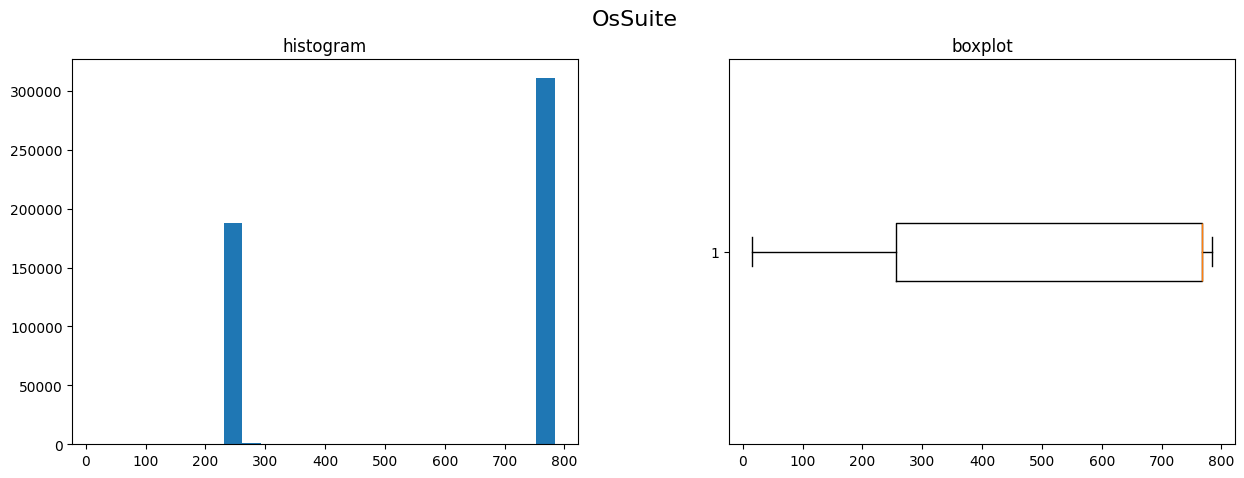

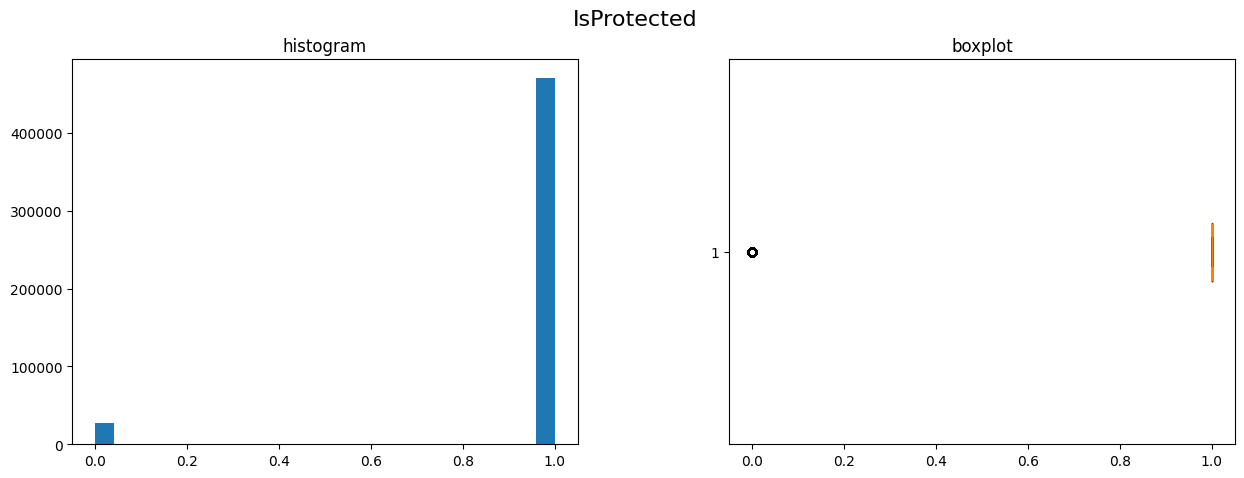

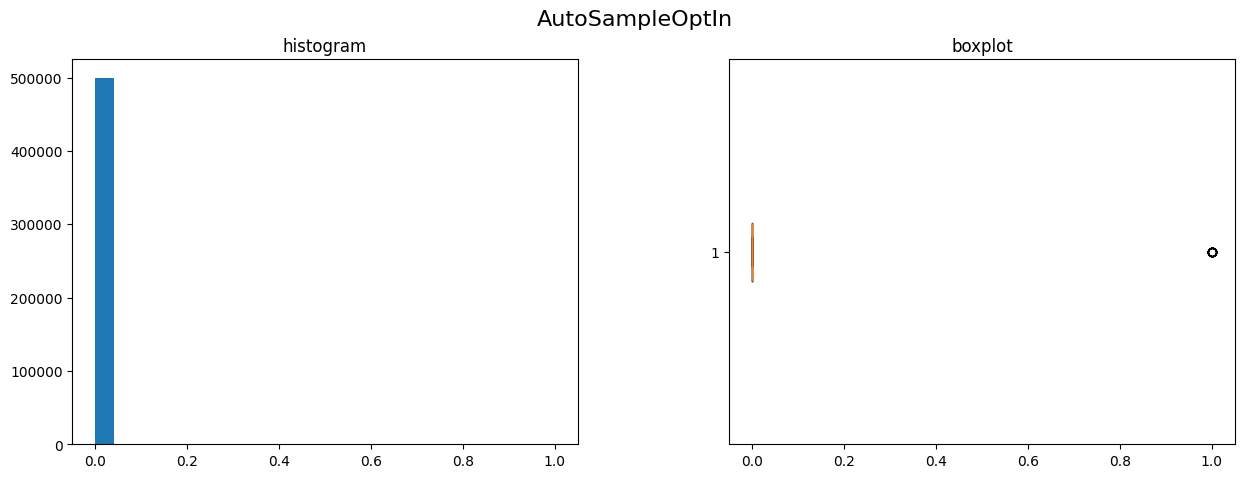

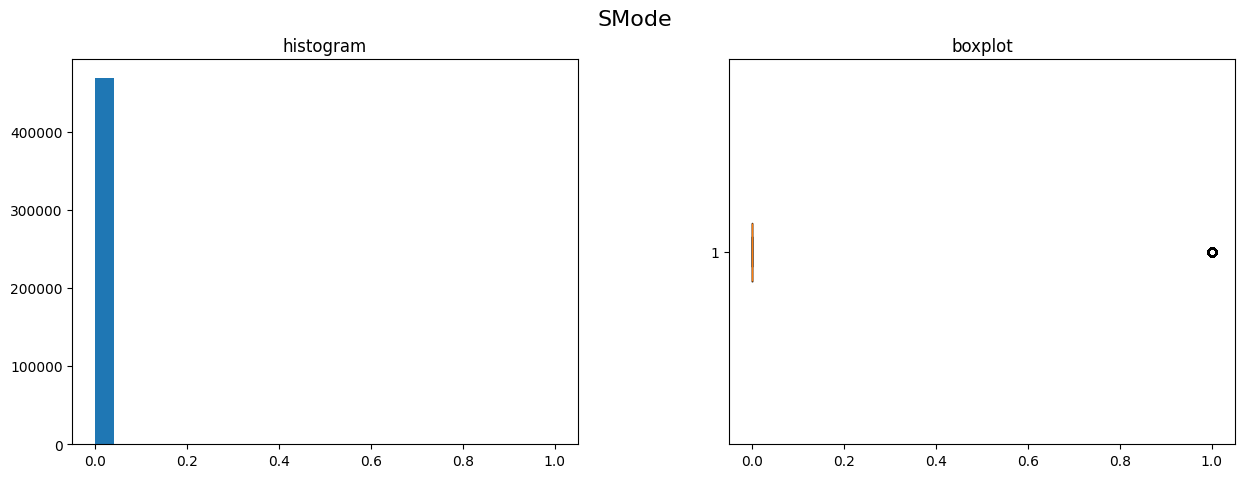

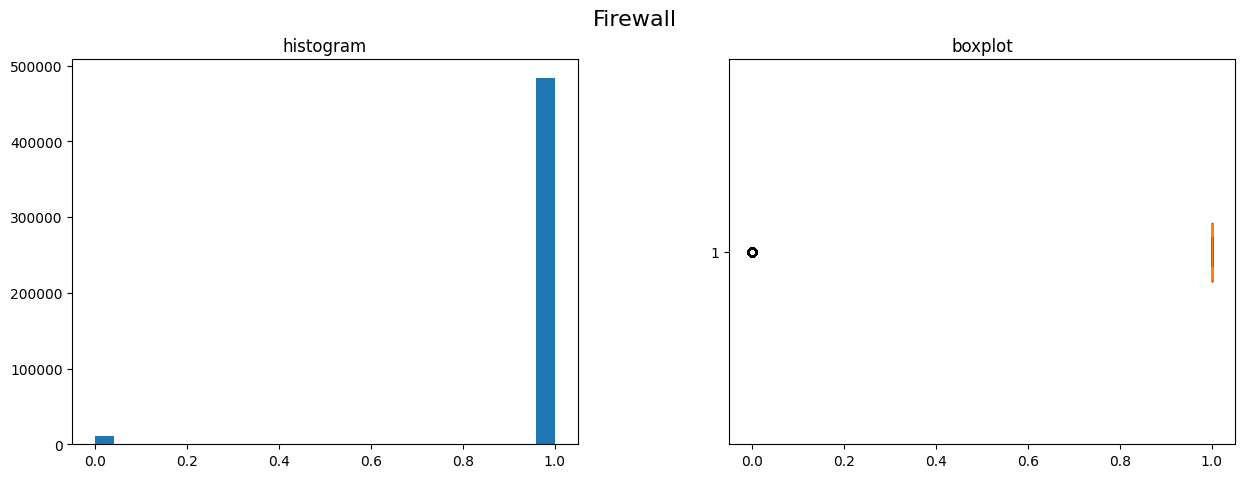

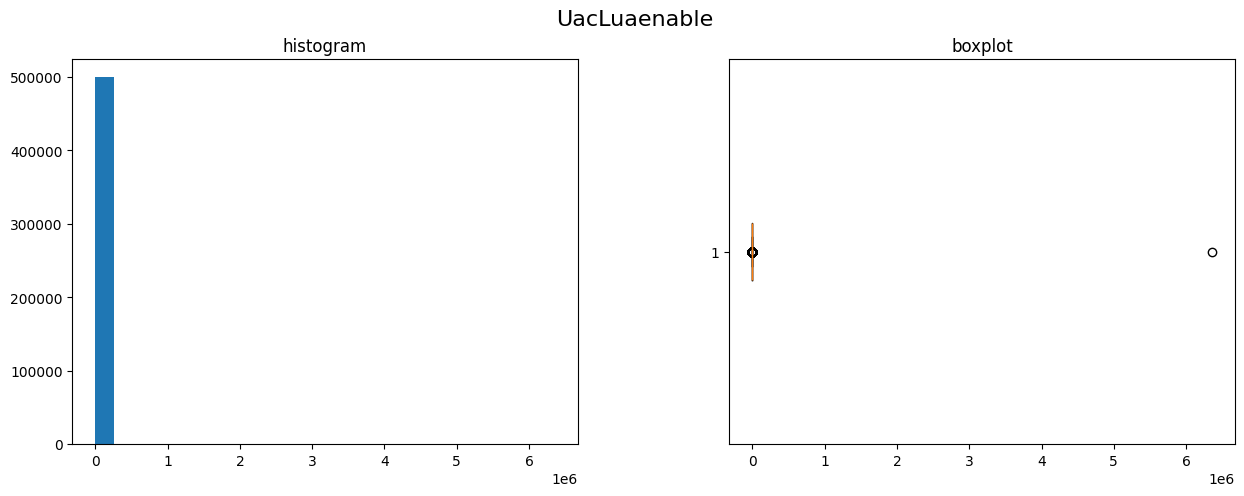

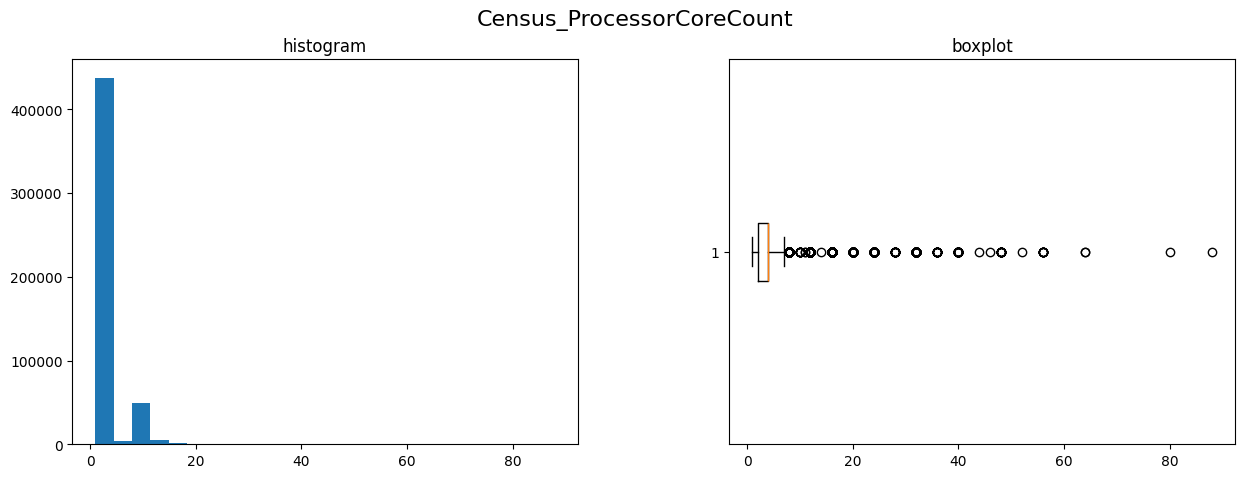

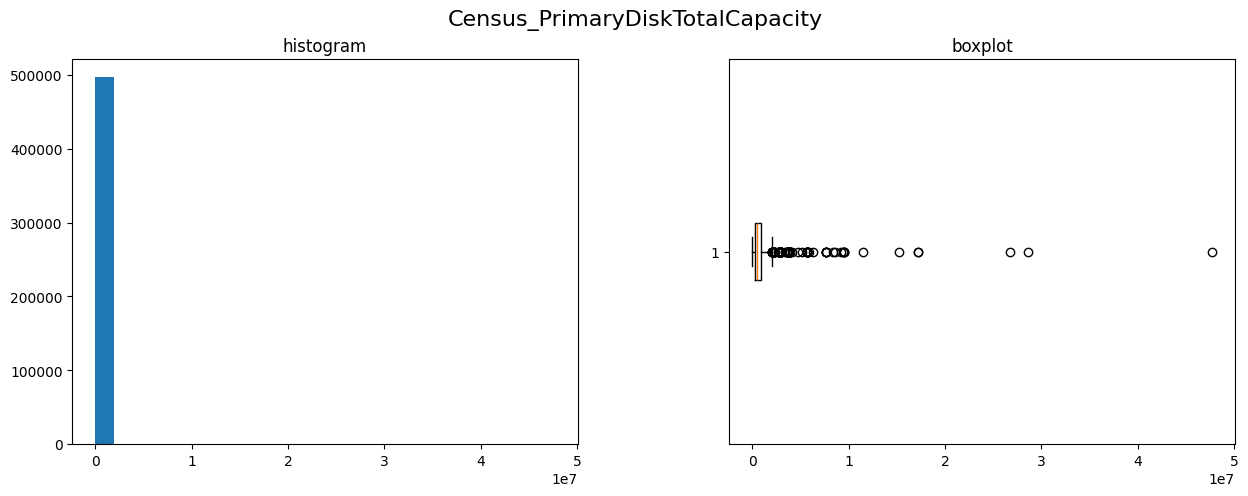

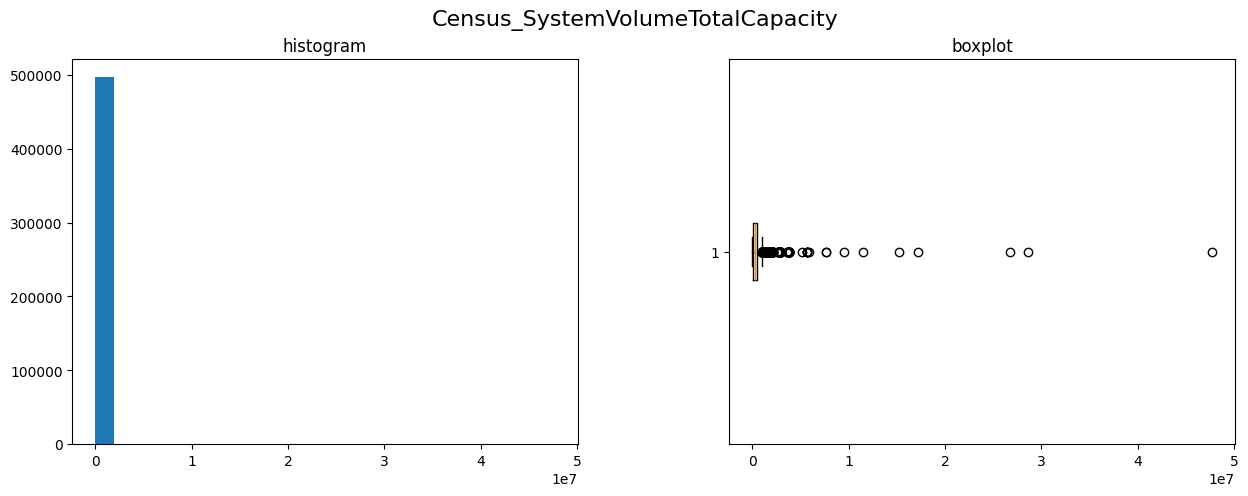

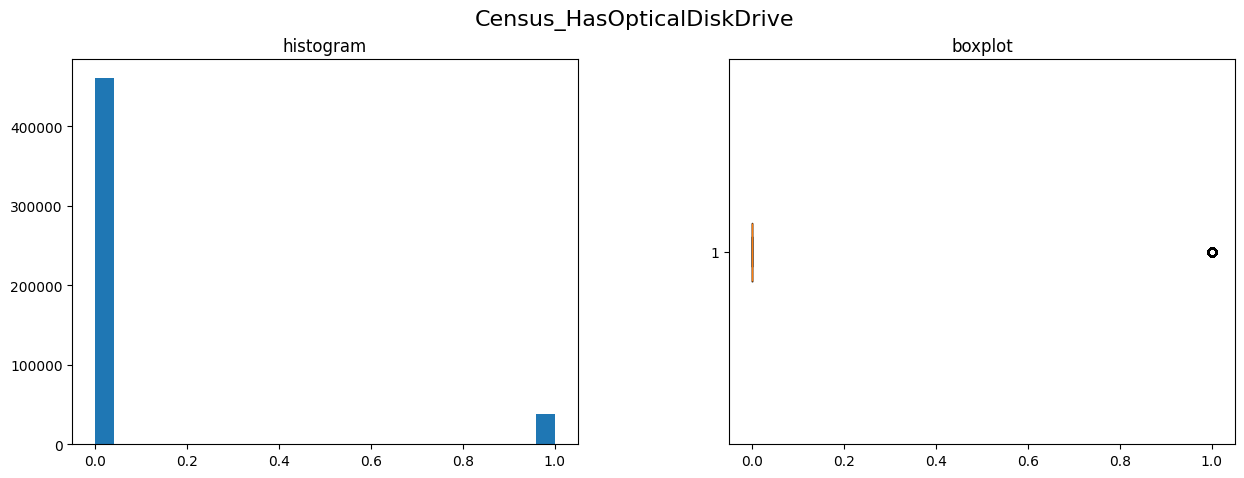

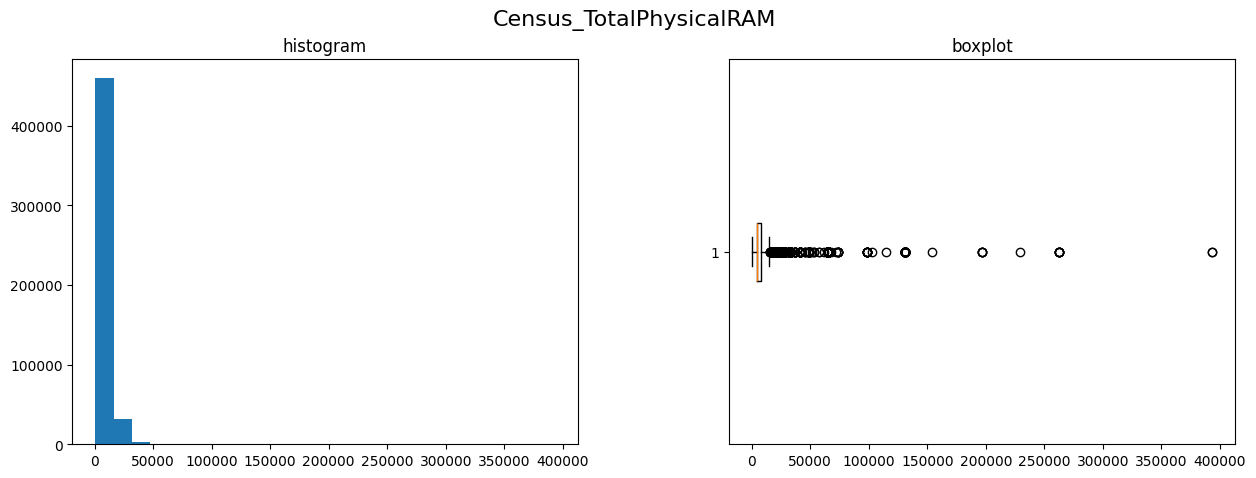

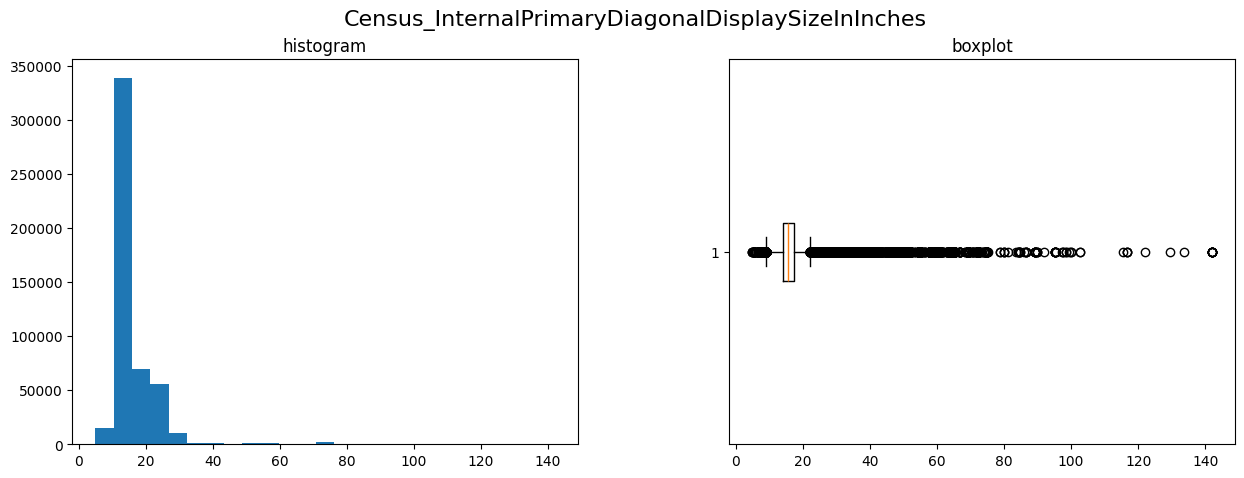

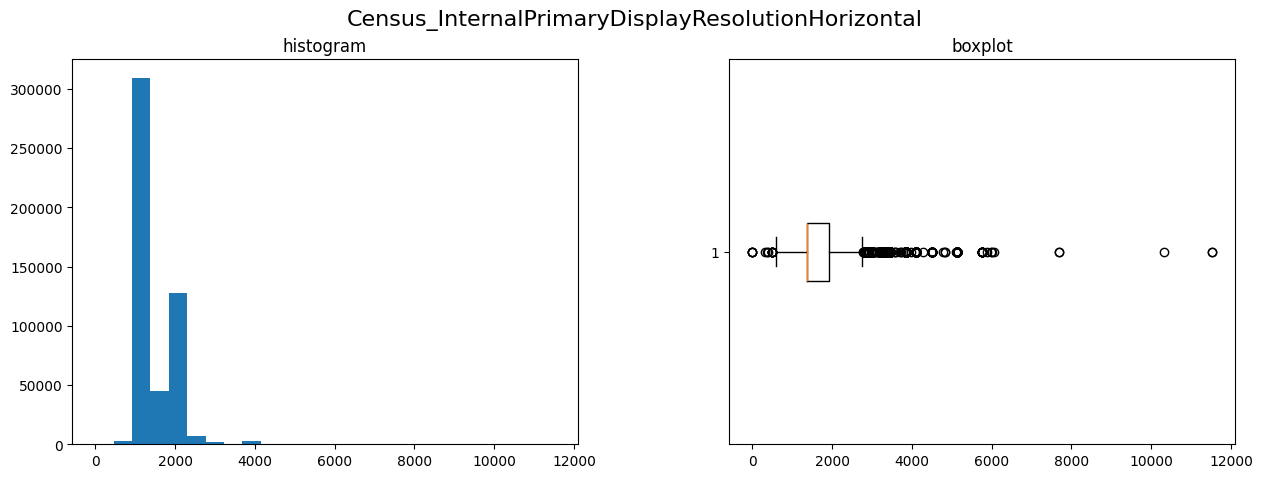

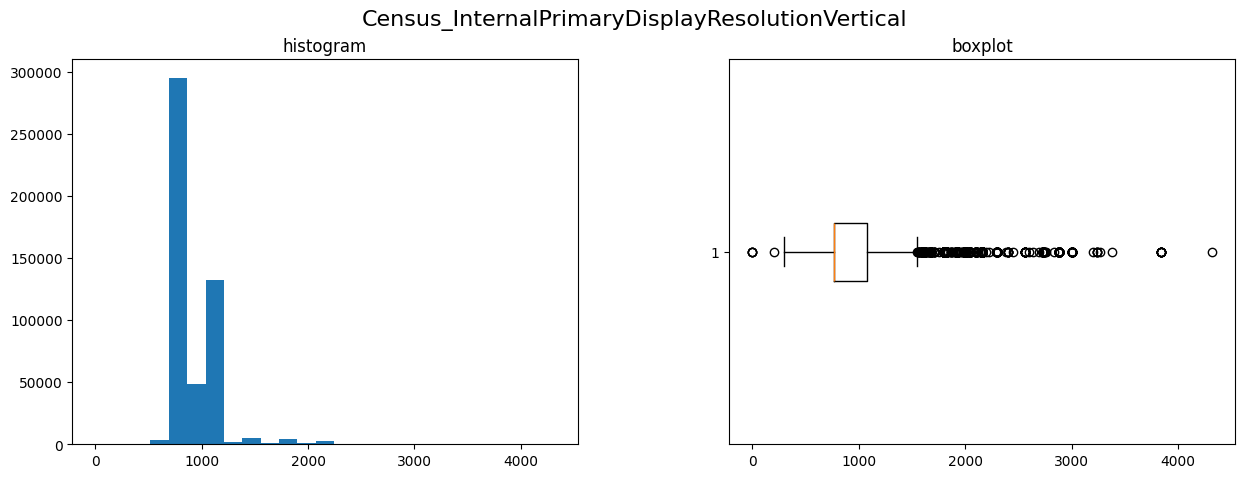

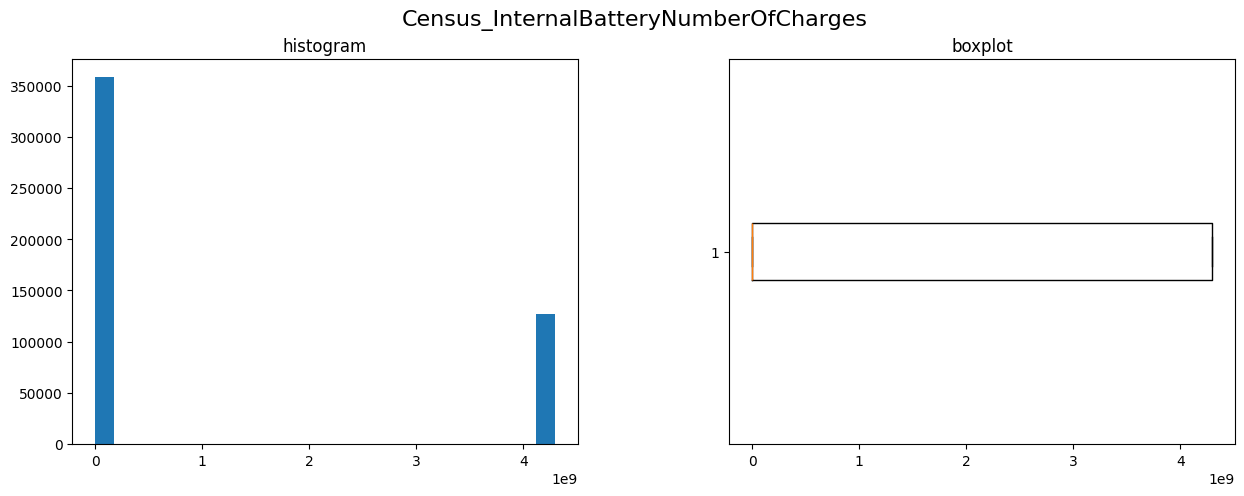

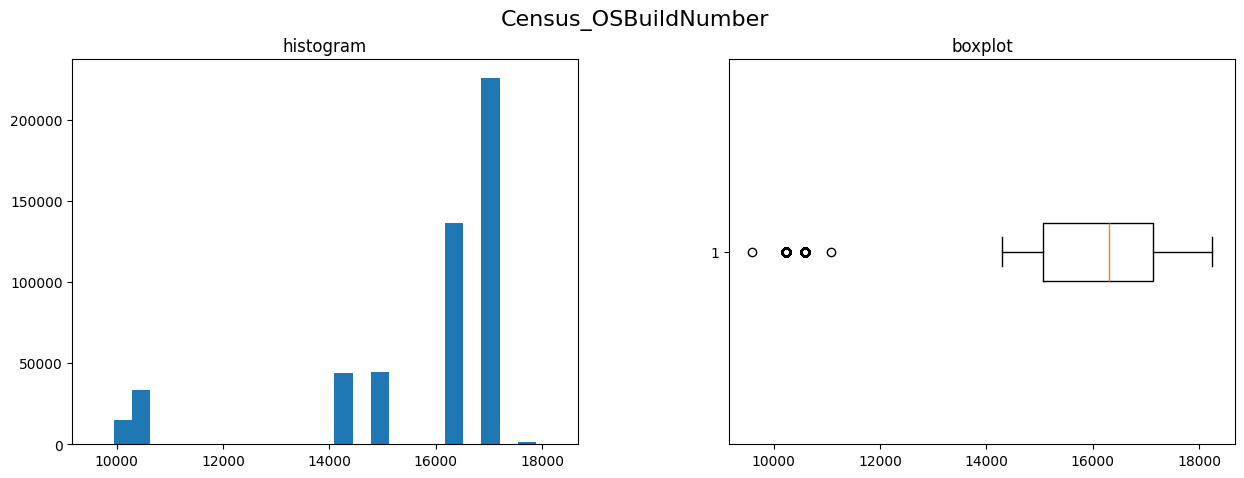

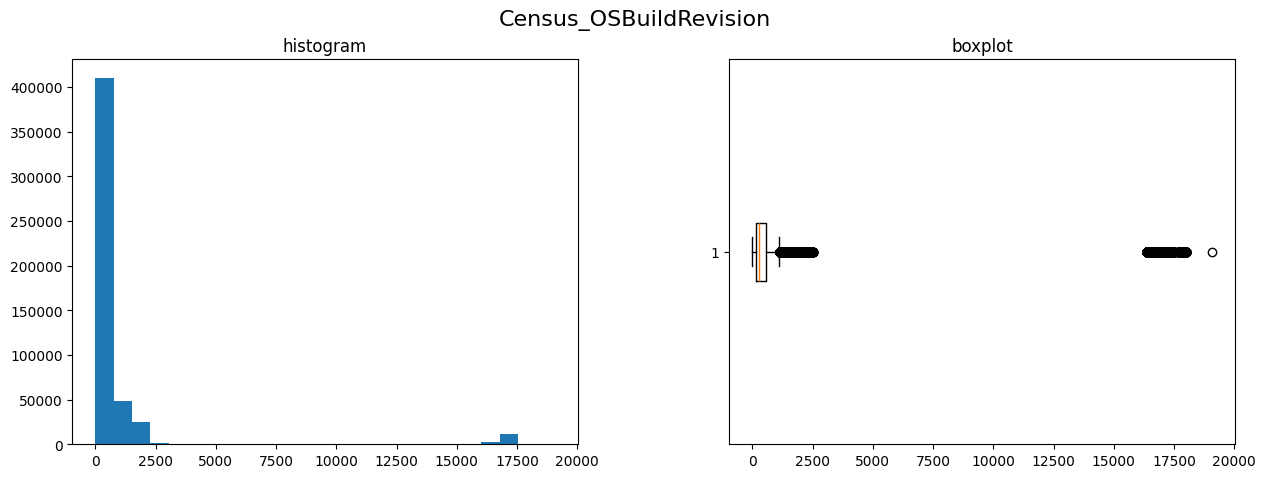

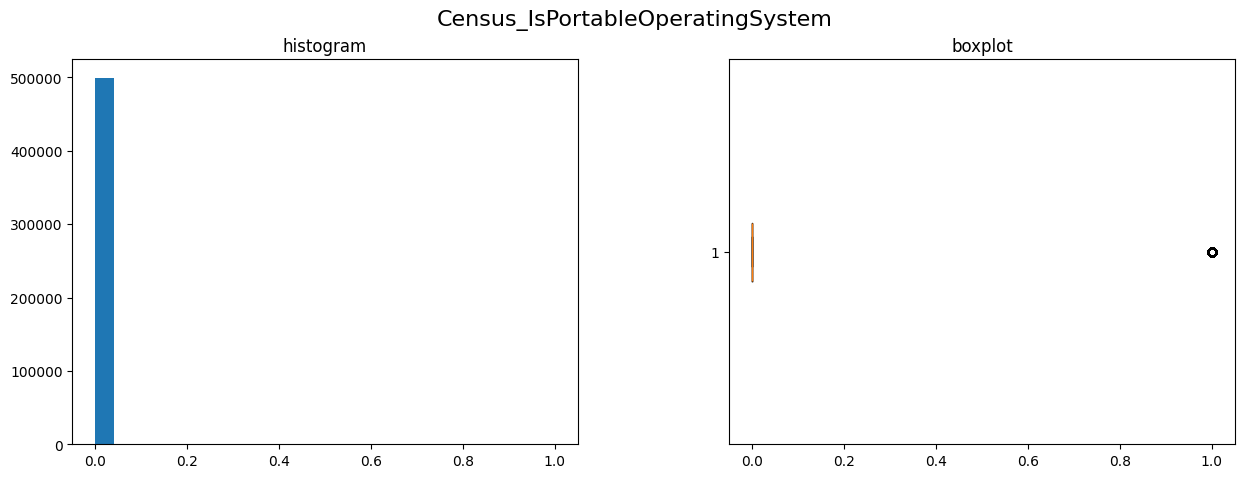

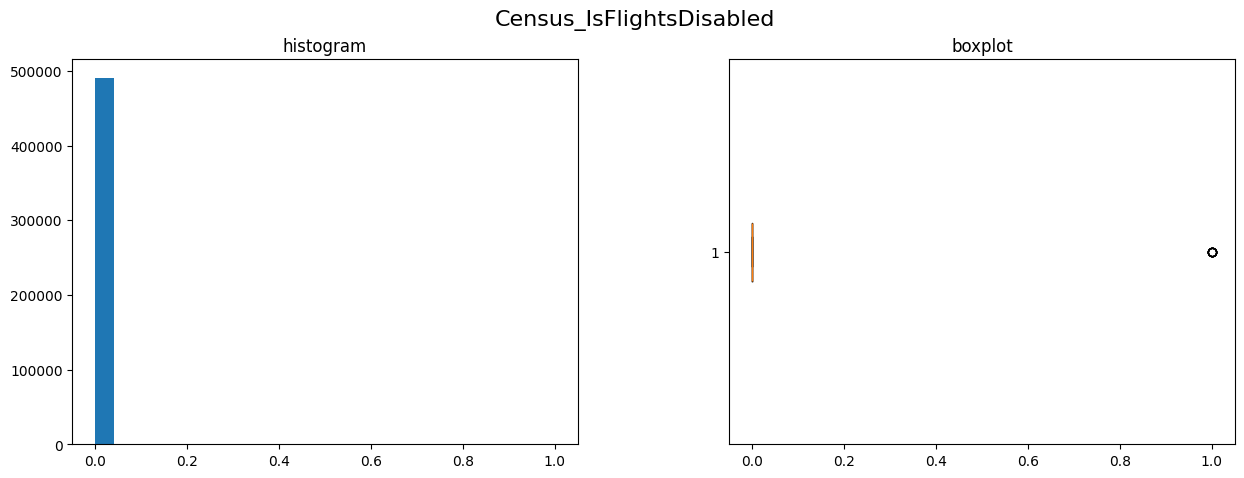

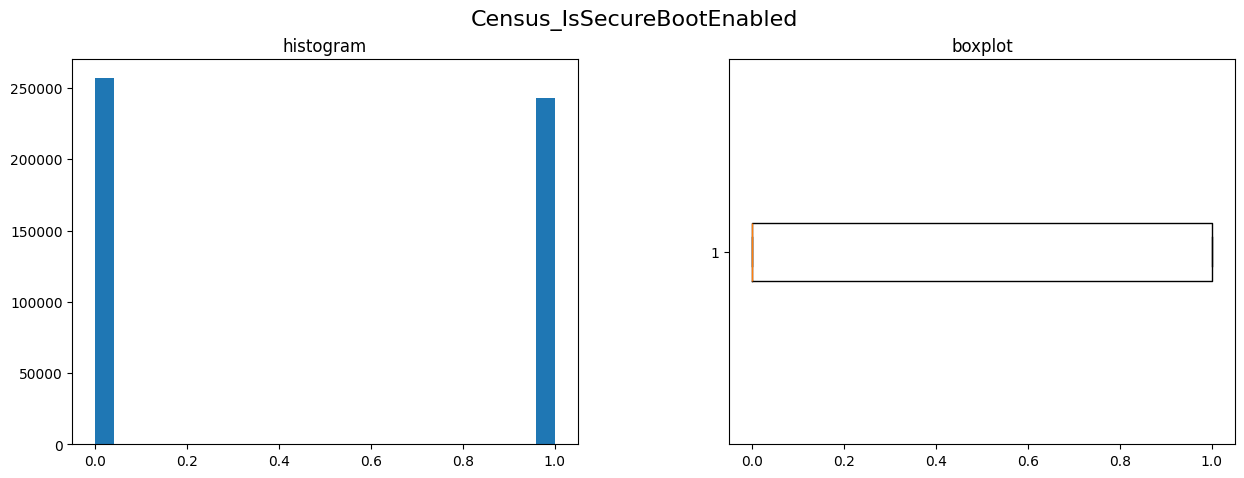

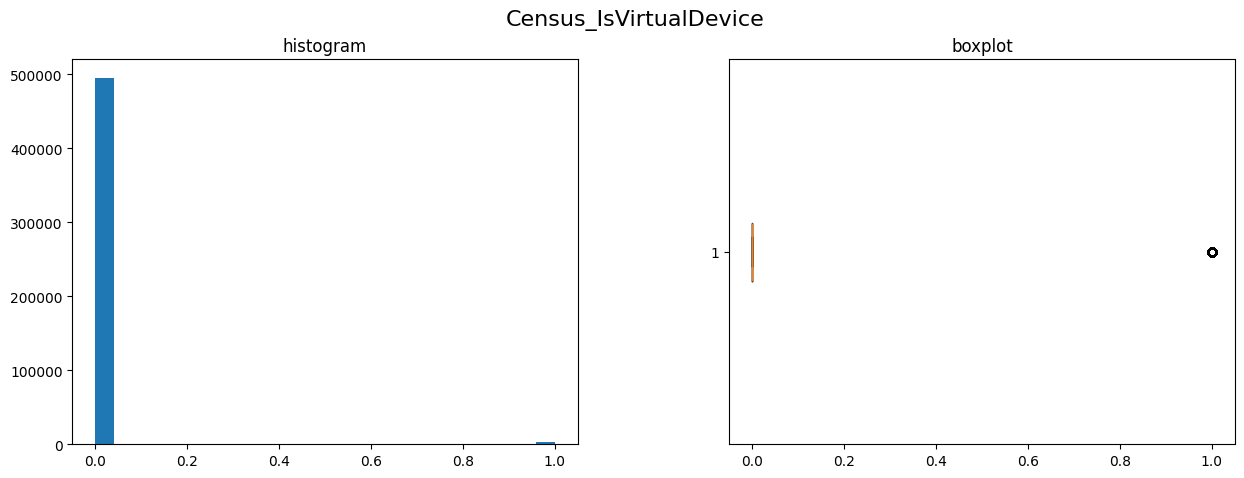

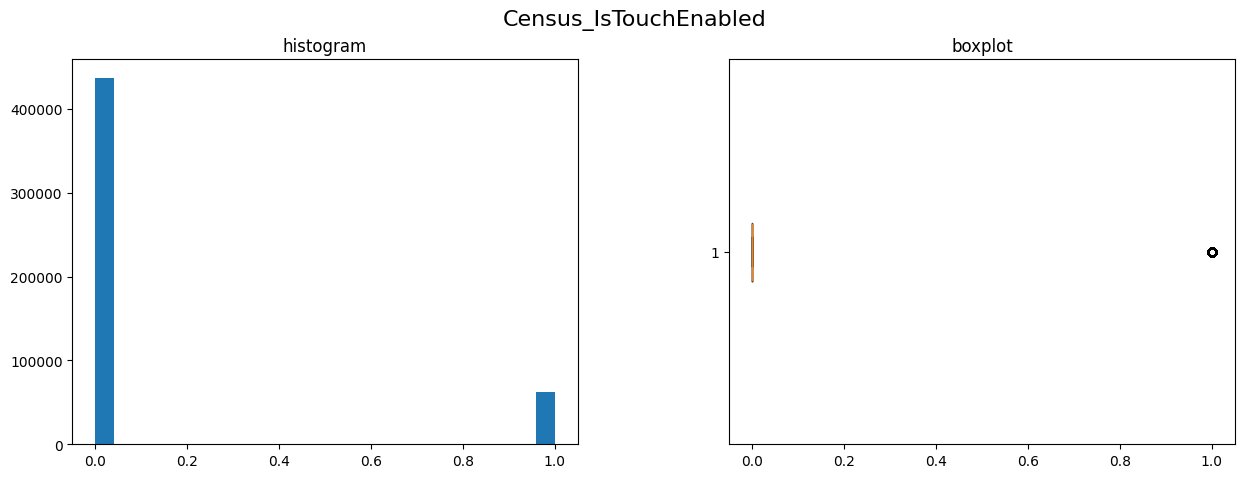

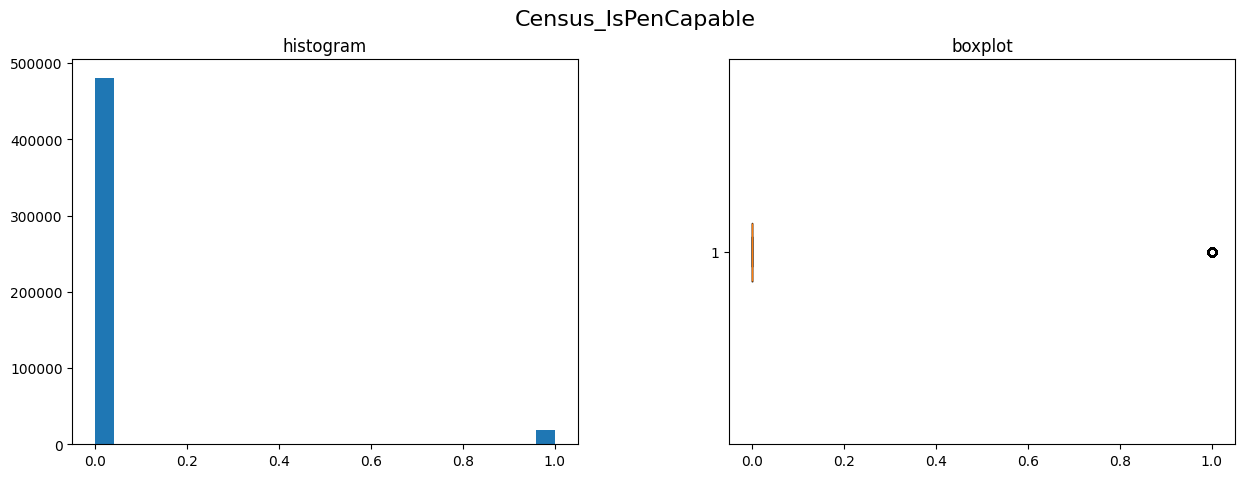

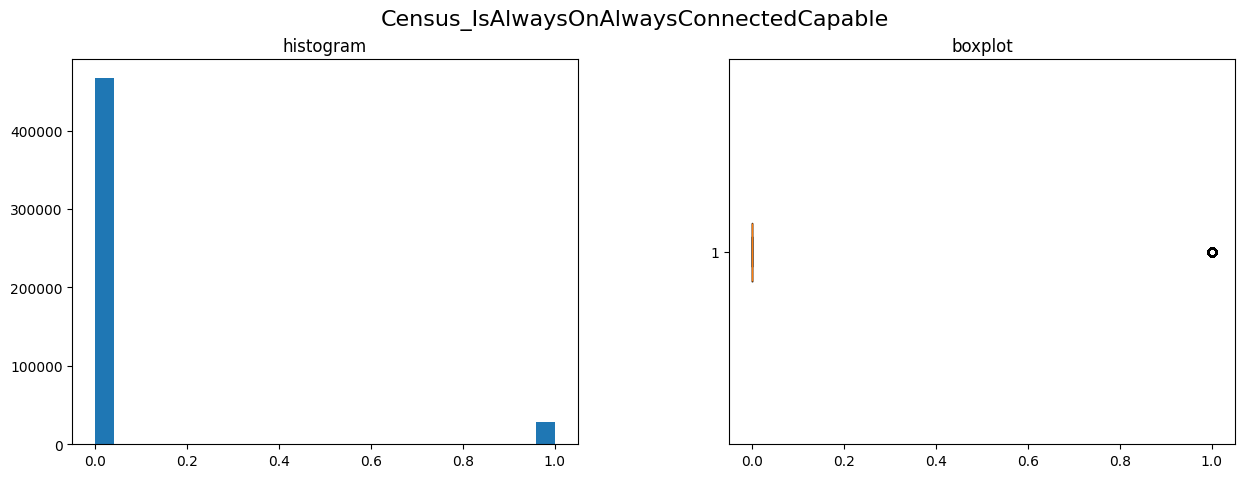

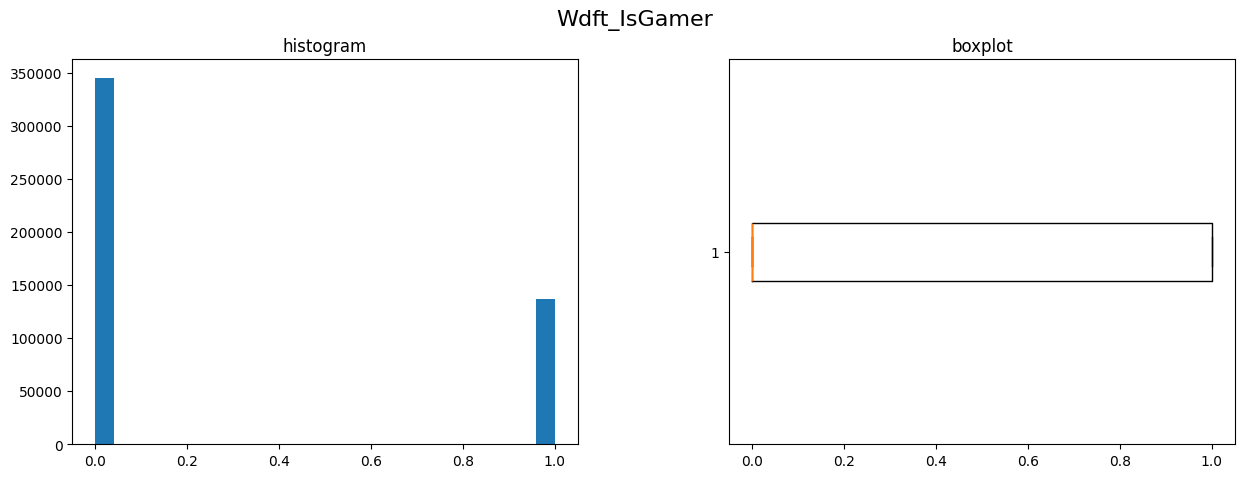

In [324]:
for c in numeric_cols:
    plot_histogram_and_boxplot(df = df, column_name = c)

In [325]:
#Ahora paso a analizar las variables categóricas mediante gráficos de barras.

In [326]:
def plot_barplot(df, column_name):
    fig = plt.figure()
    fig.suptitle(column_name, fontsize=16)
    df[column_name].value_counts().plot(kind = 'bar')

C:\Users\admin\AppData\Local\Temp\ipykernel_6720\3982451214.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


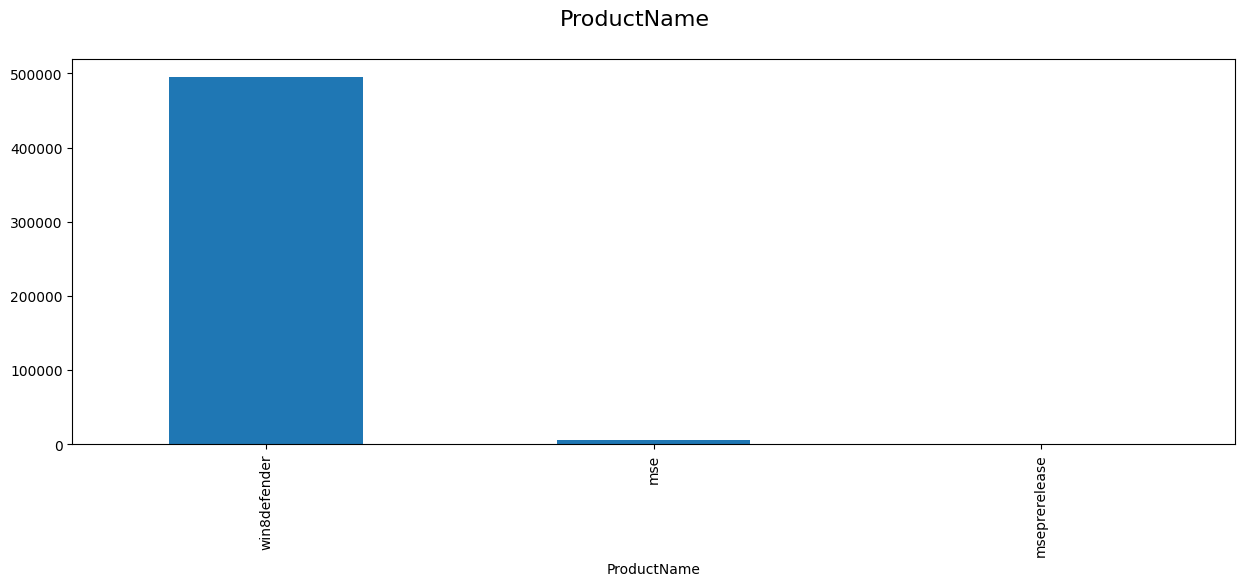

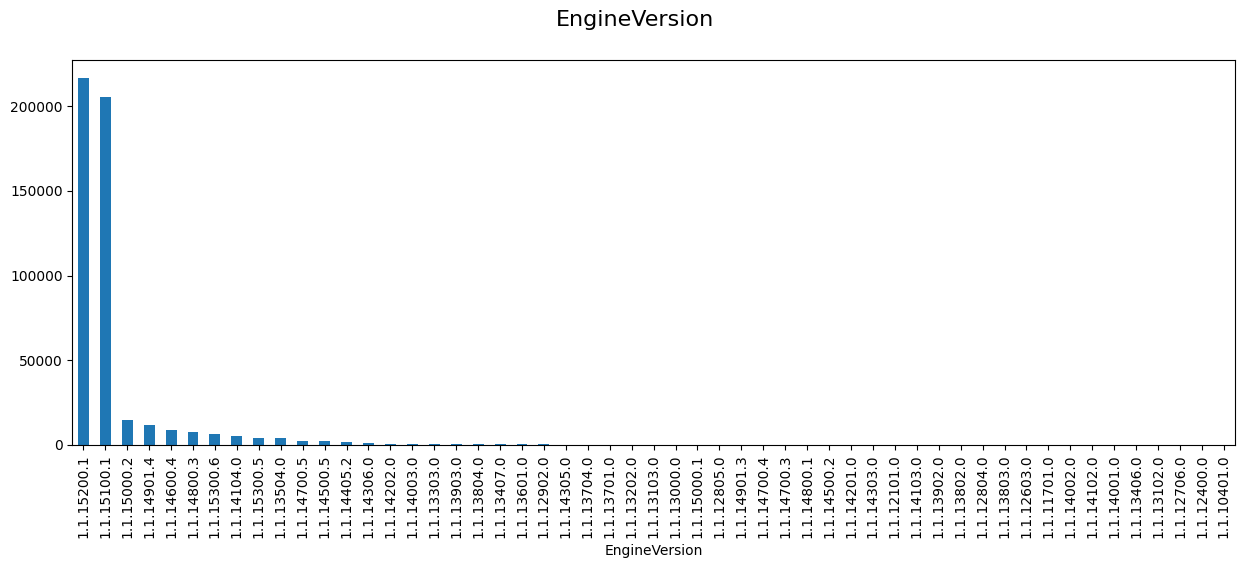

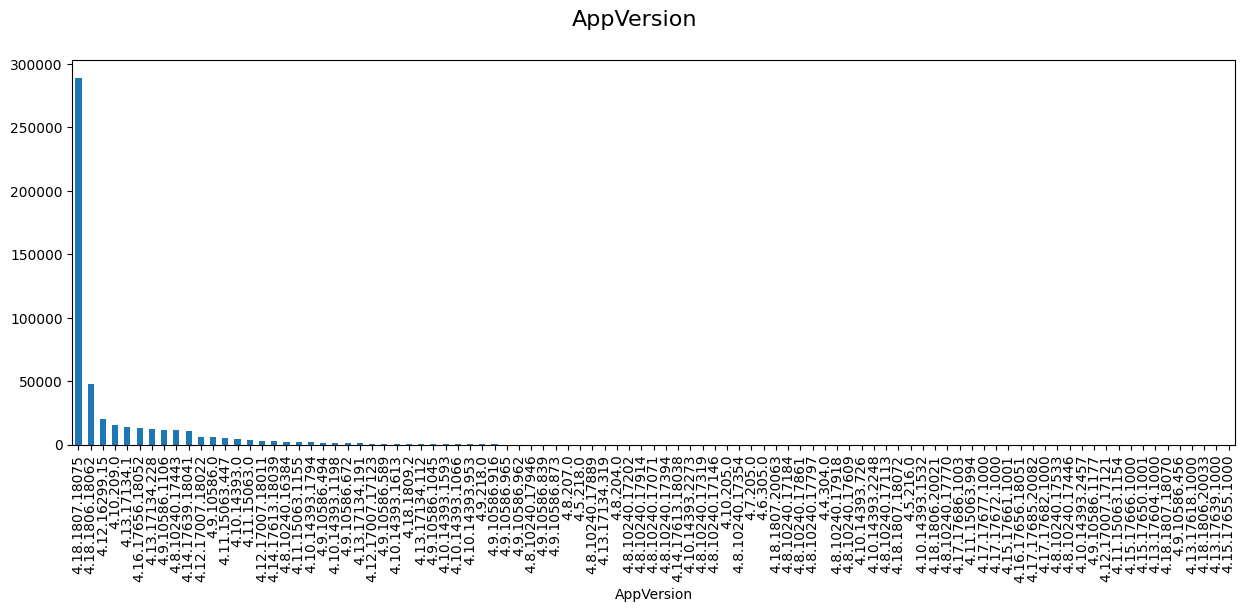

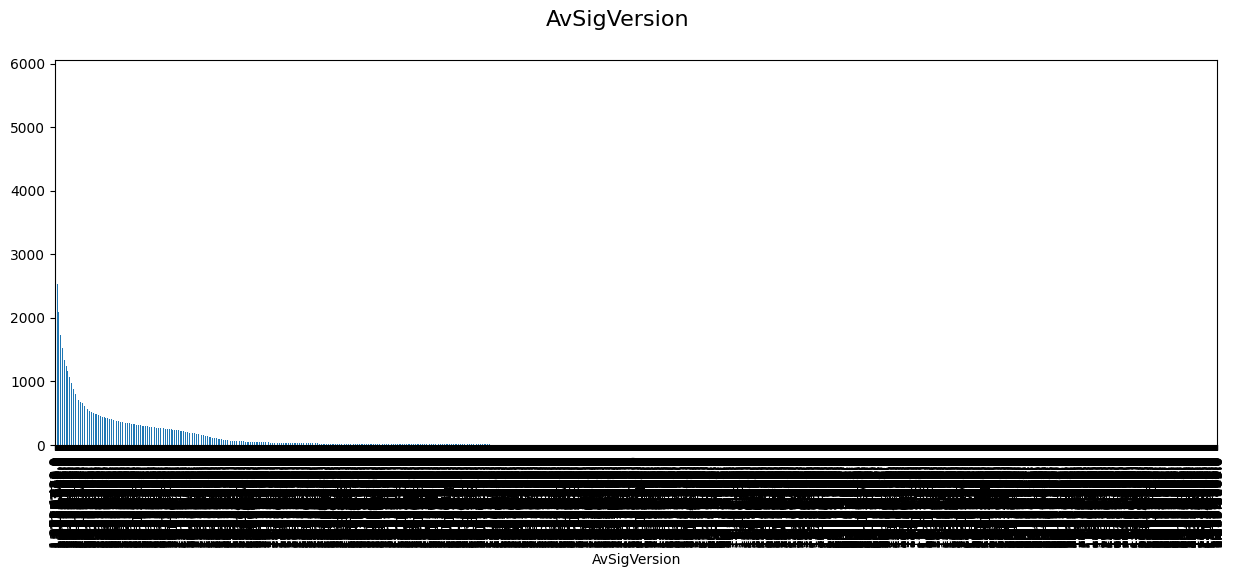

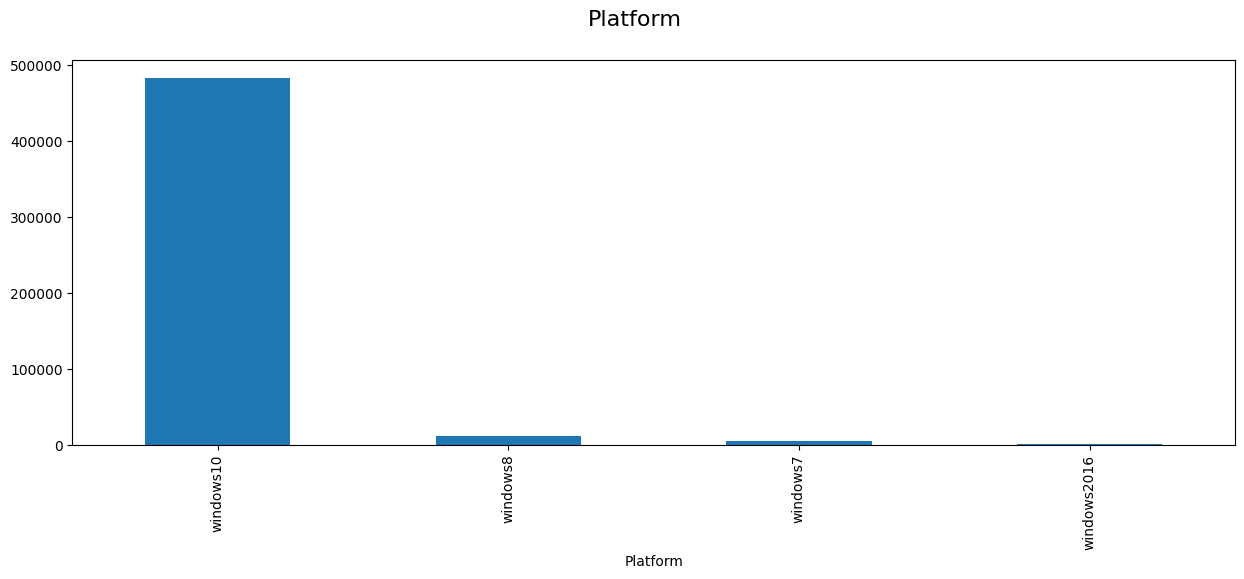

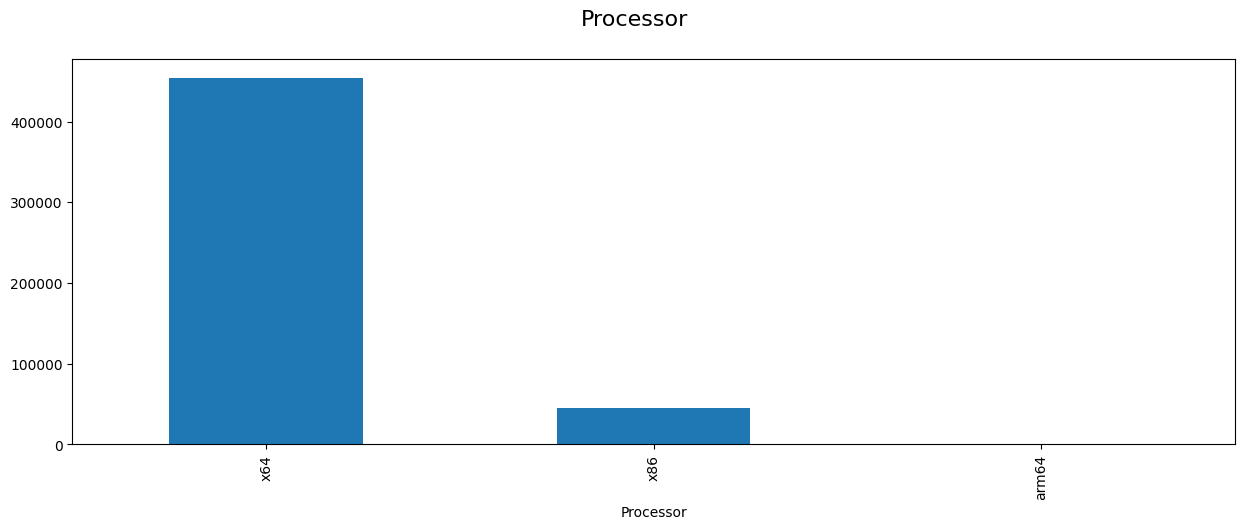

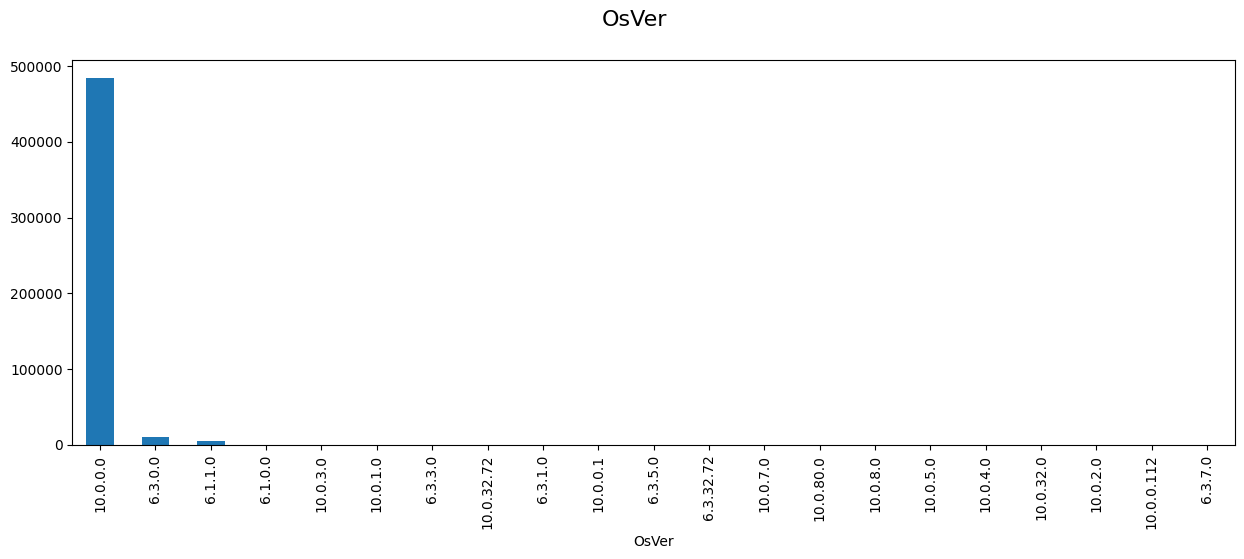

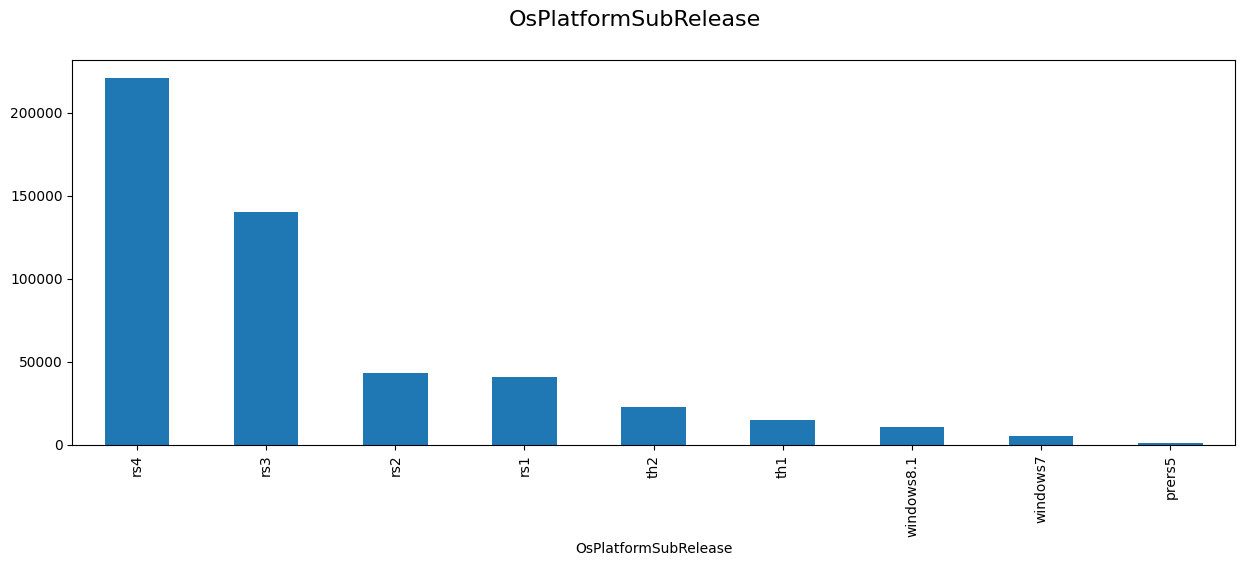

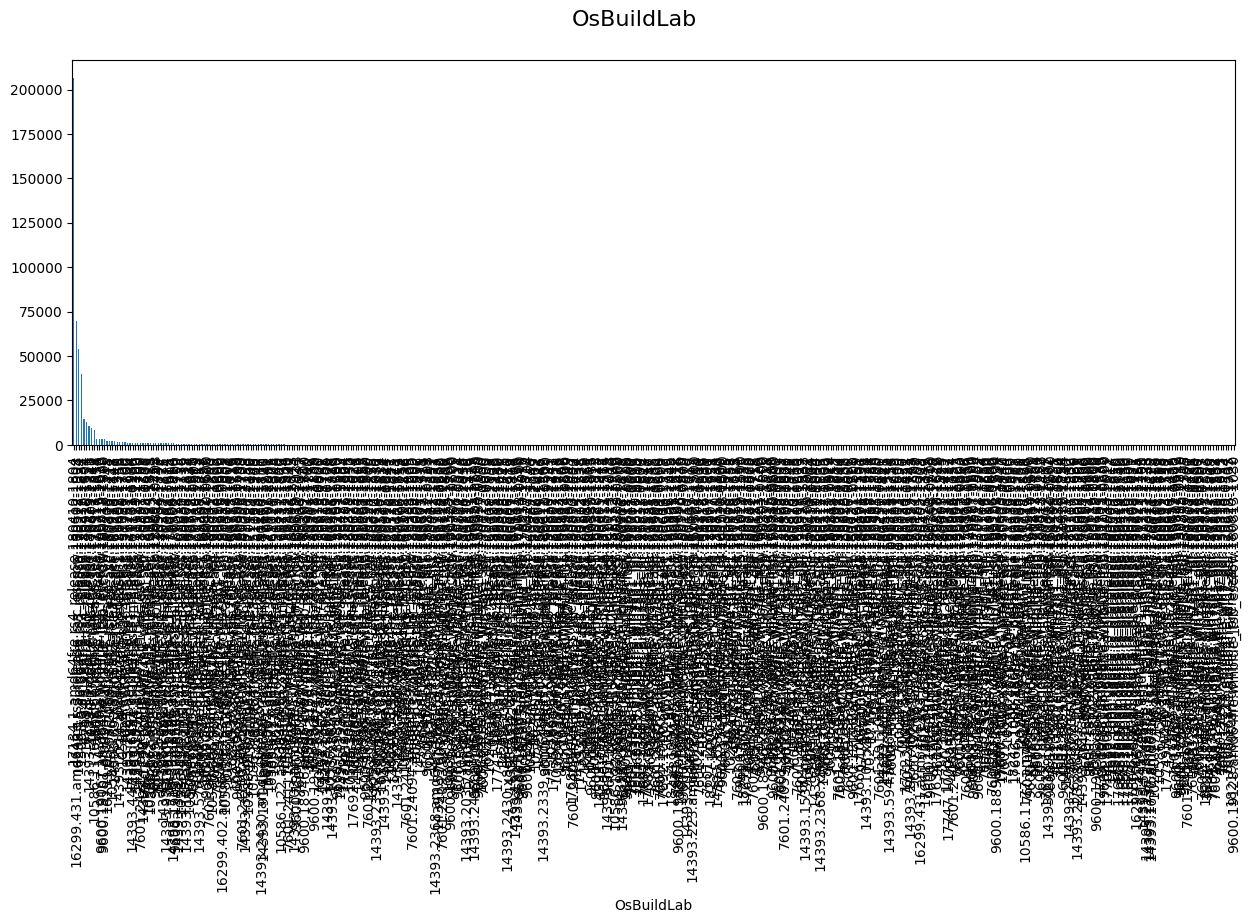

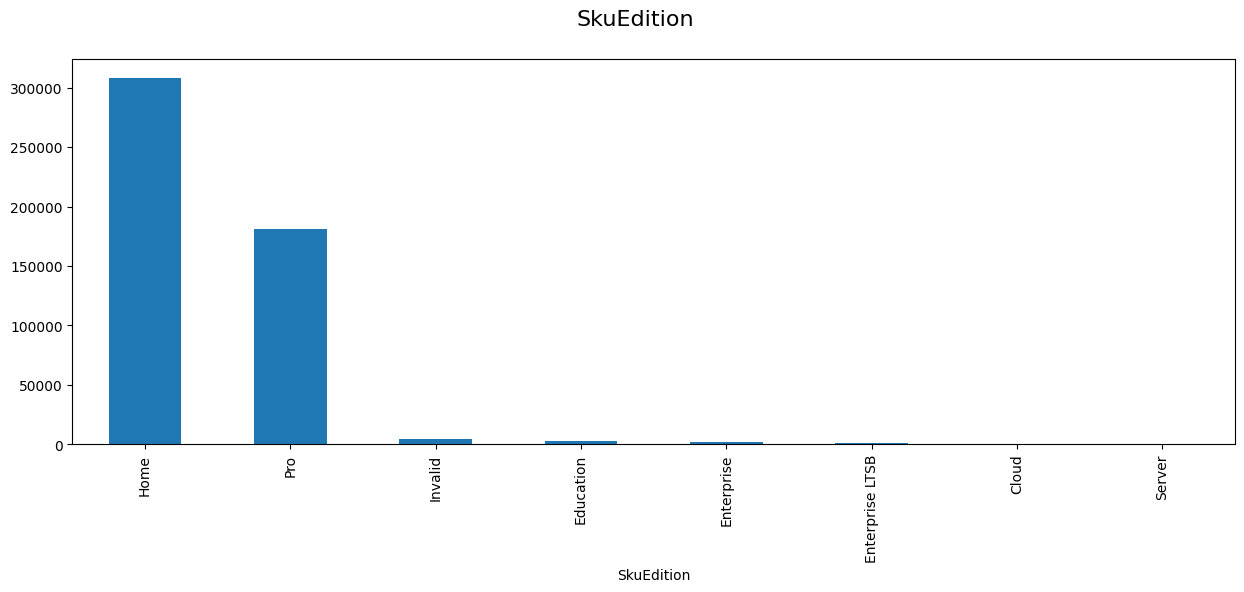

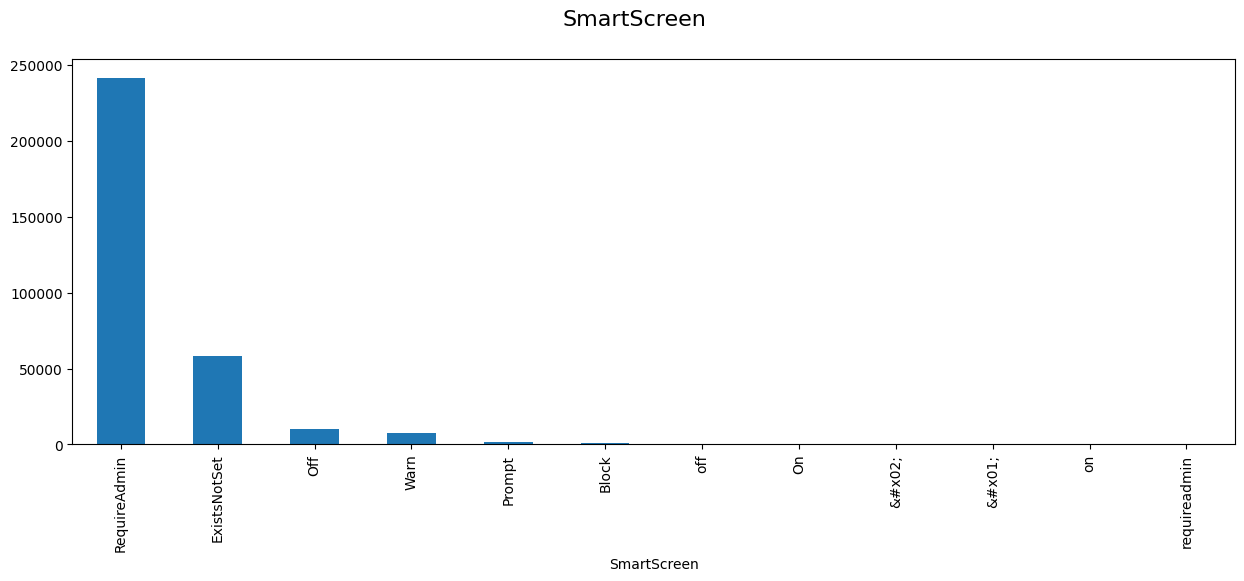

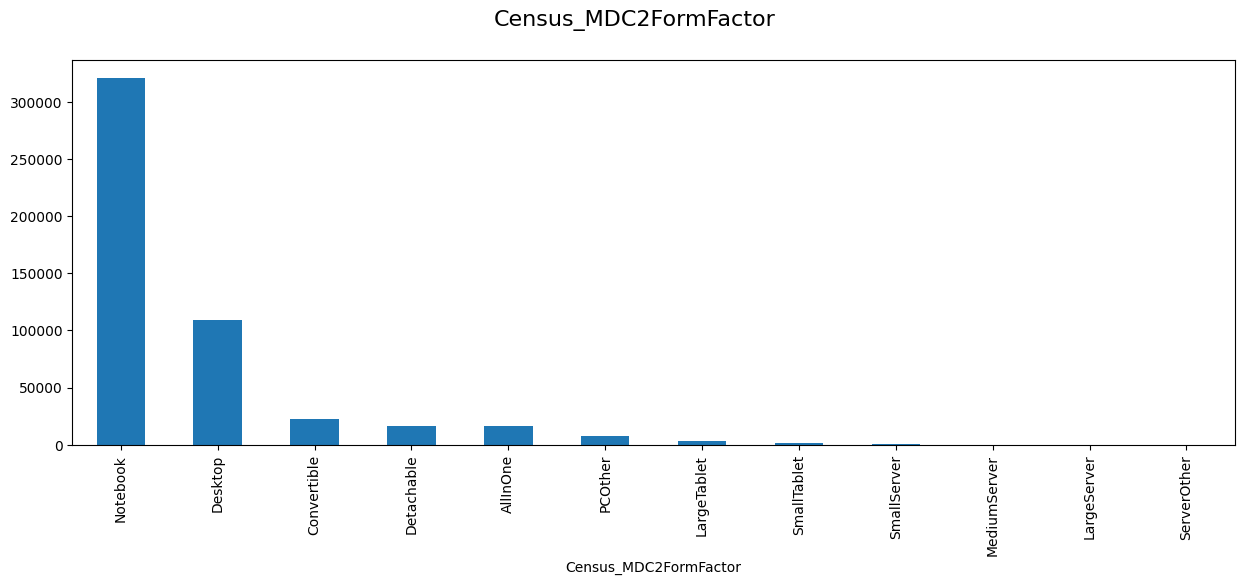

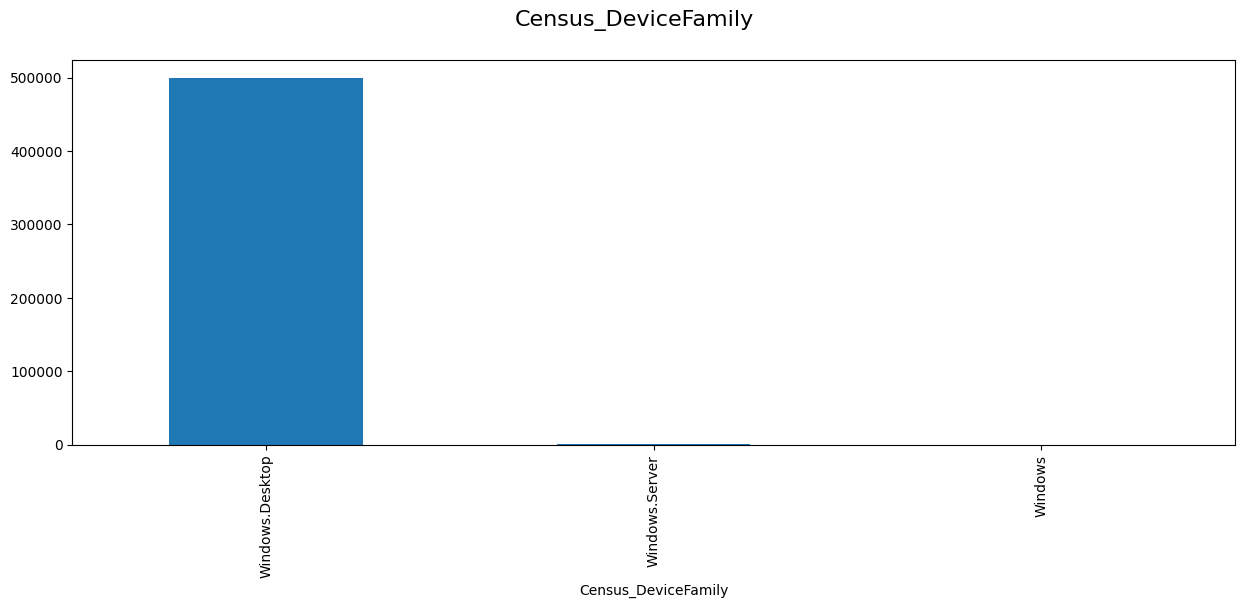

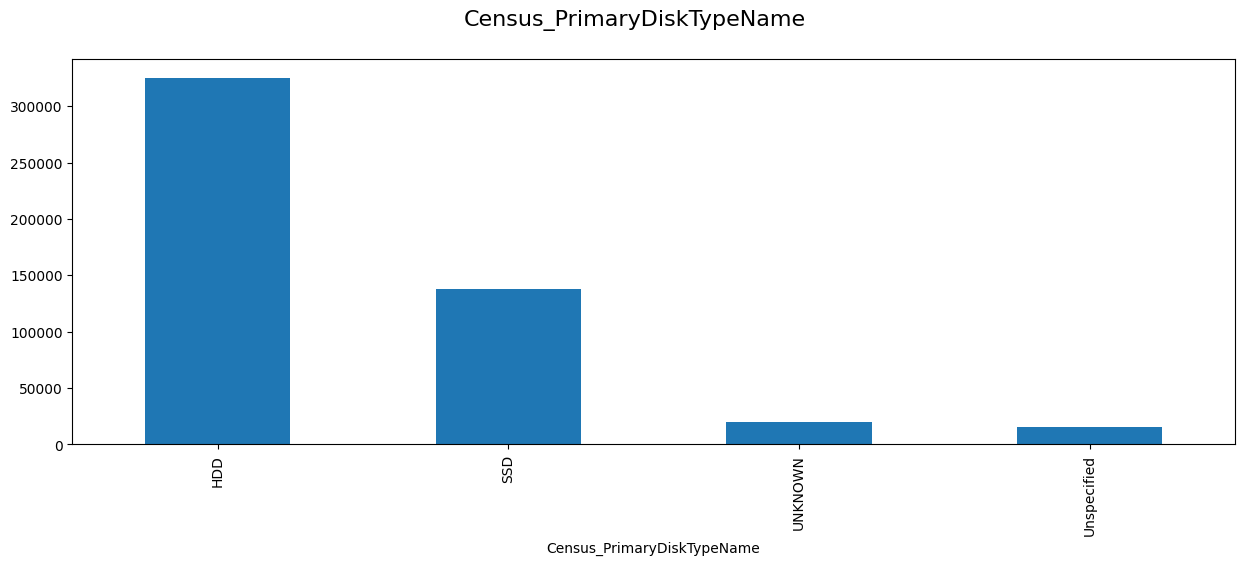

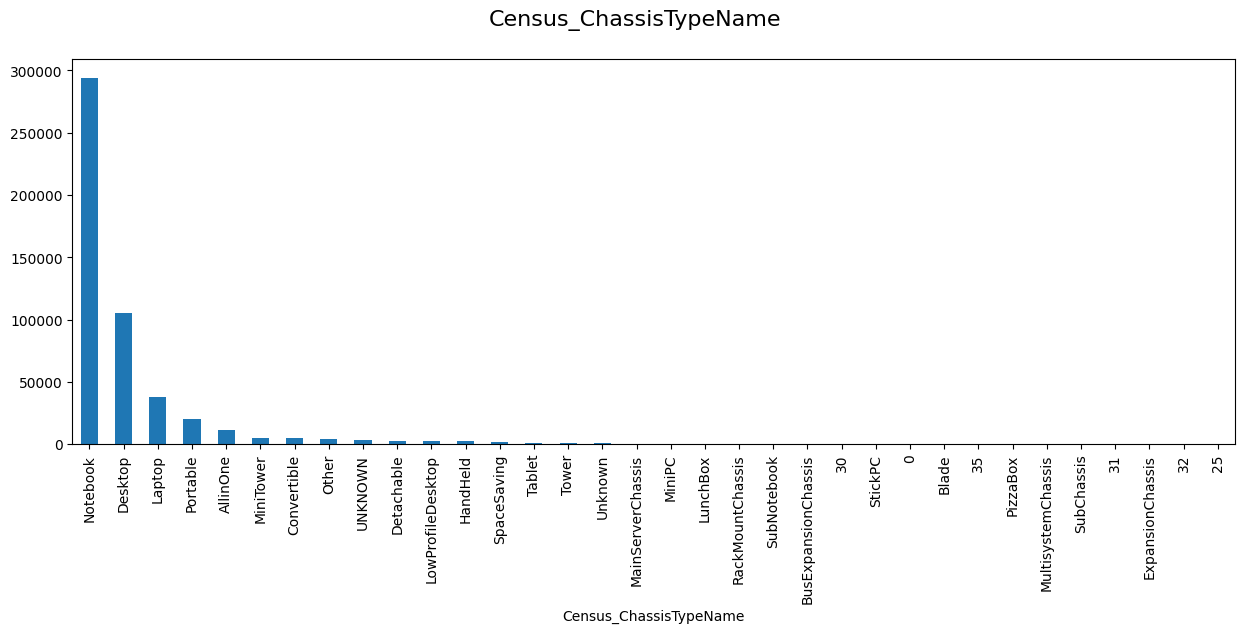

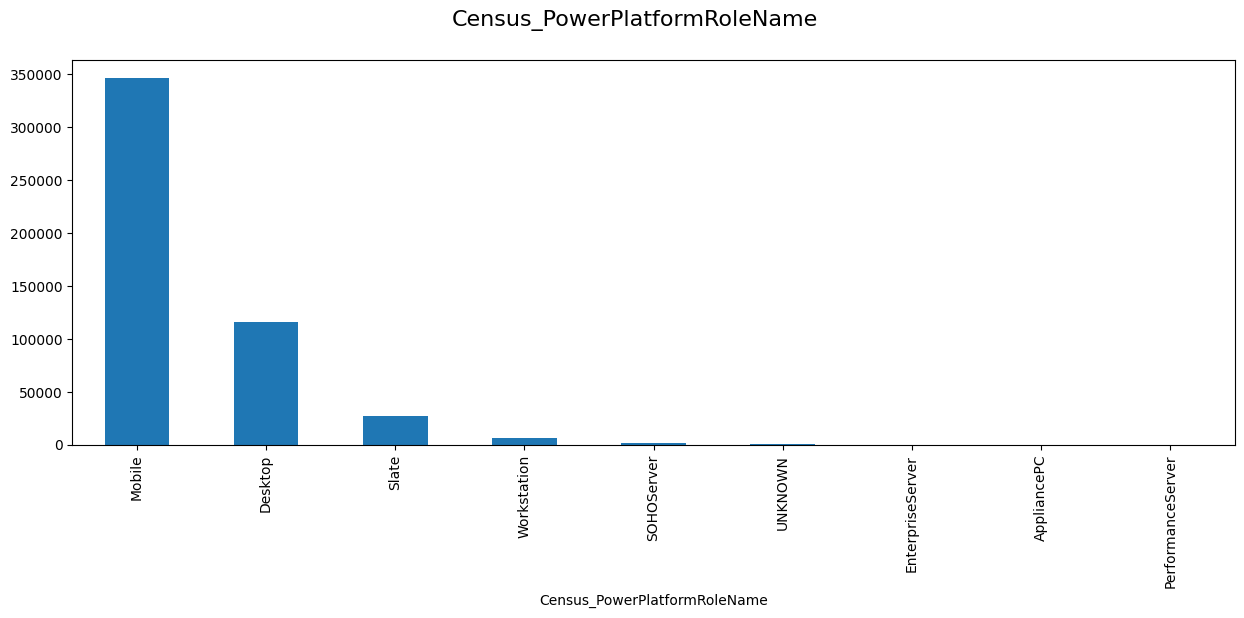

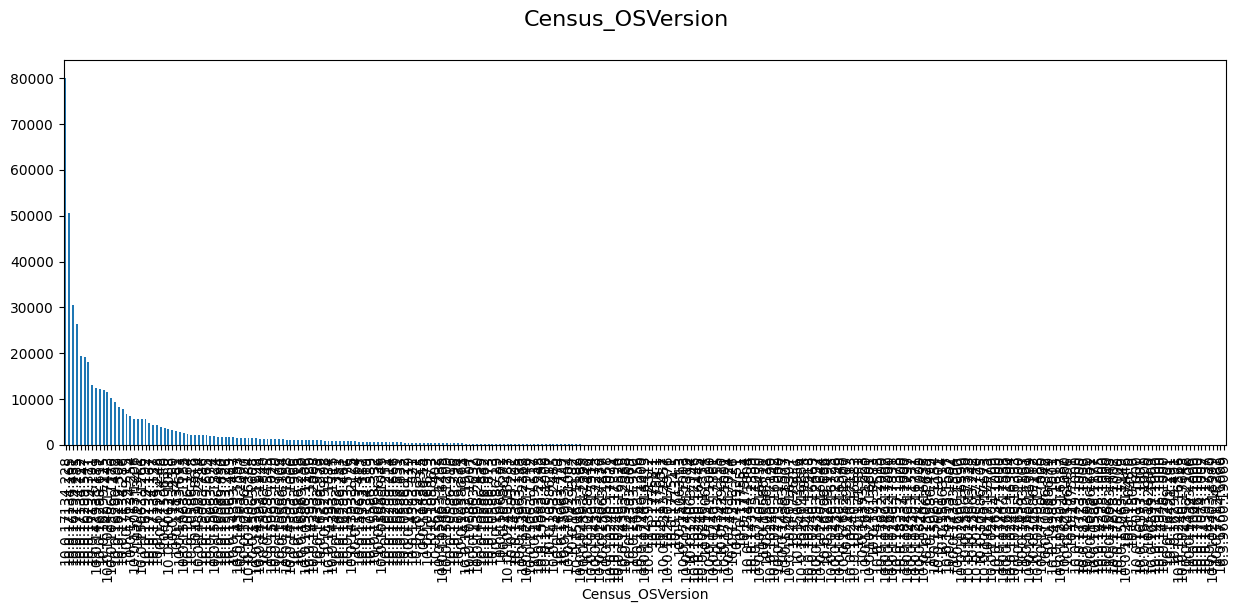

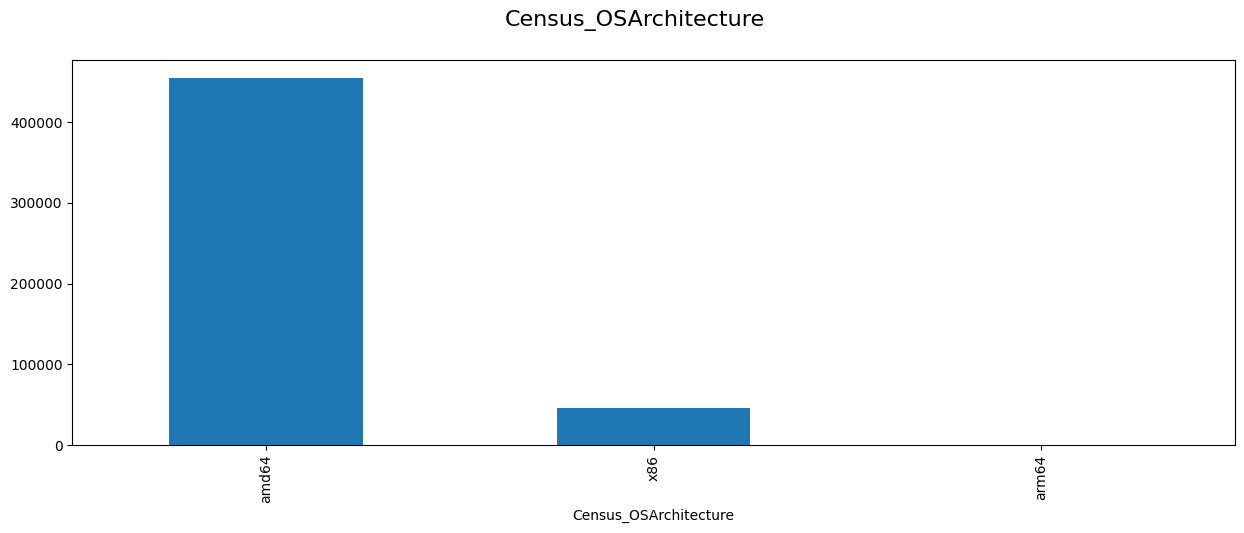

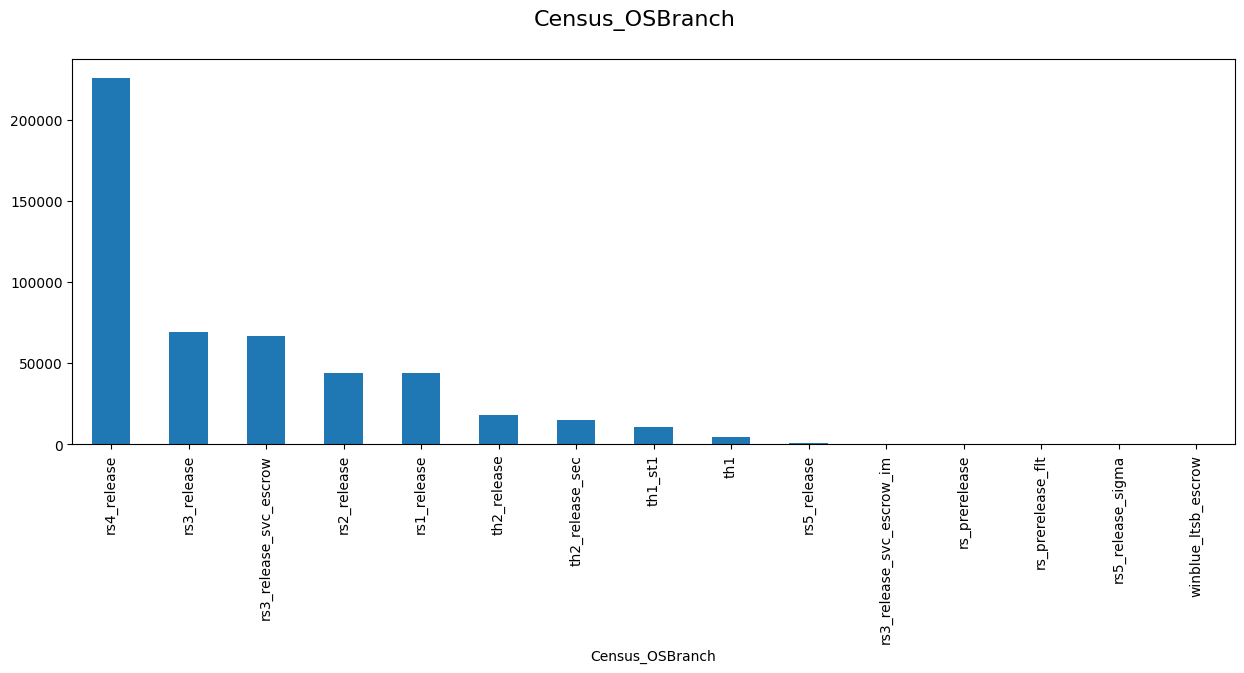

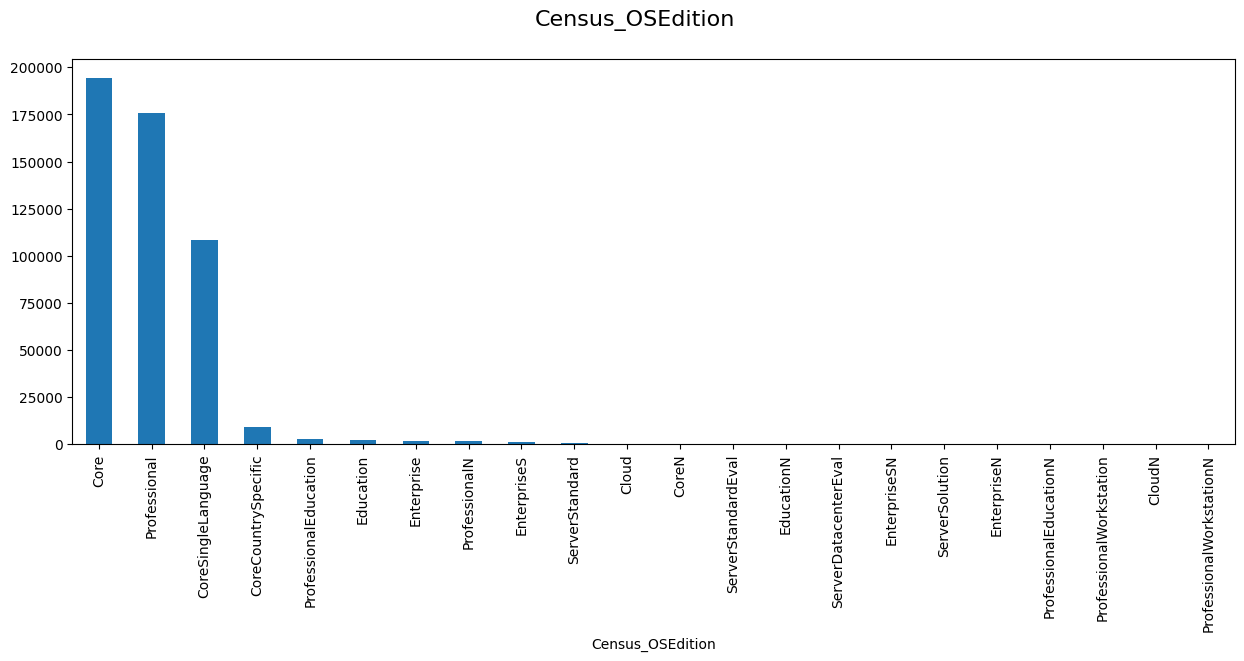

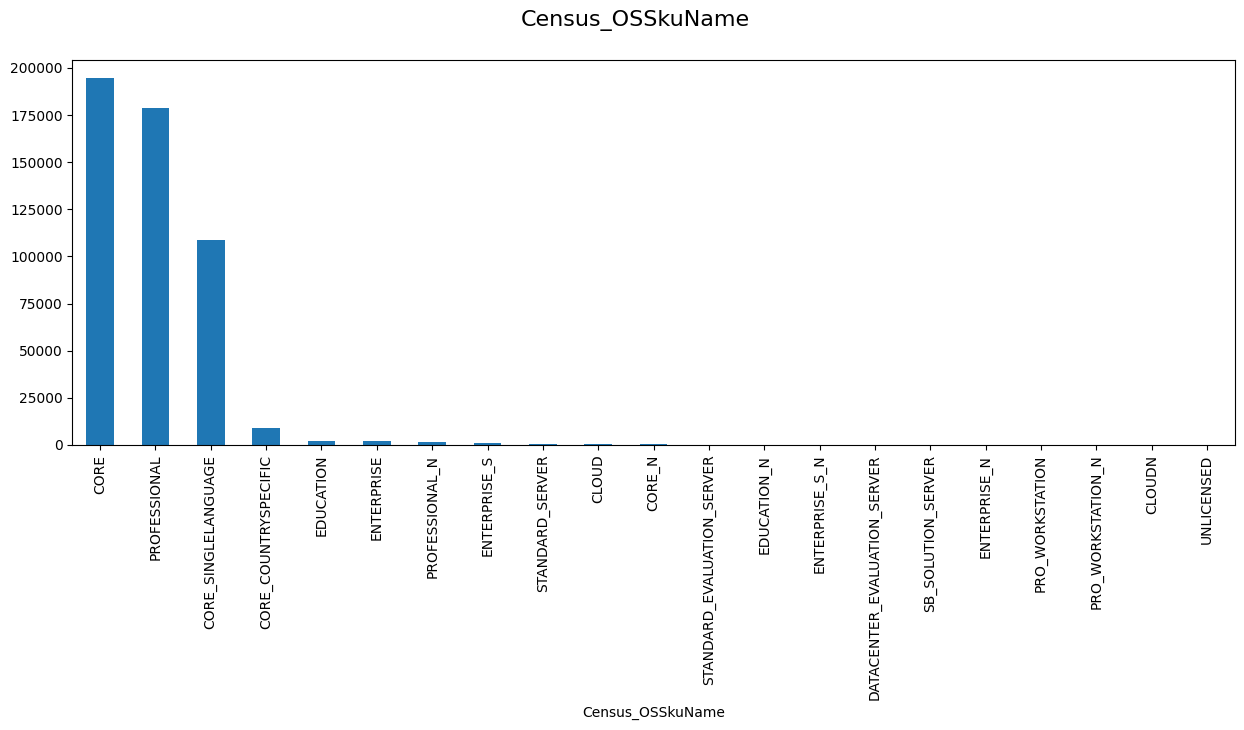

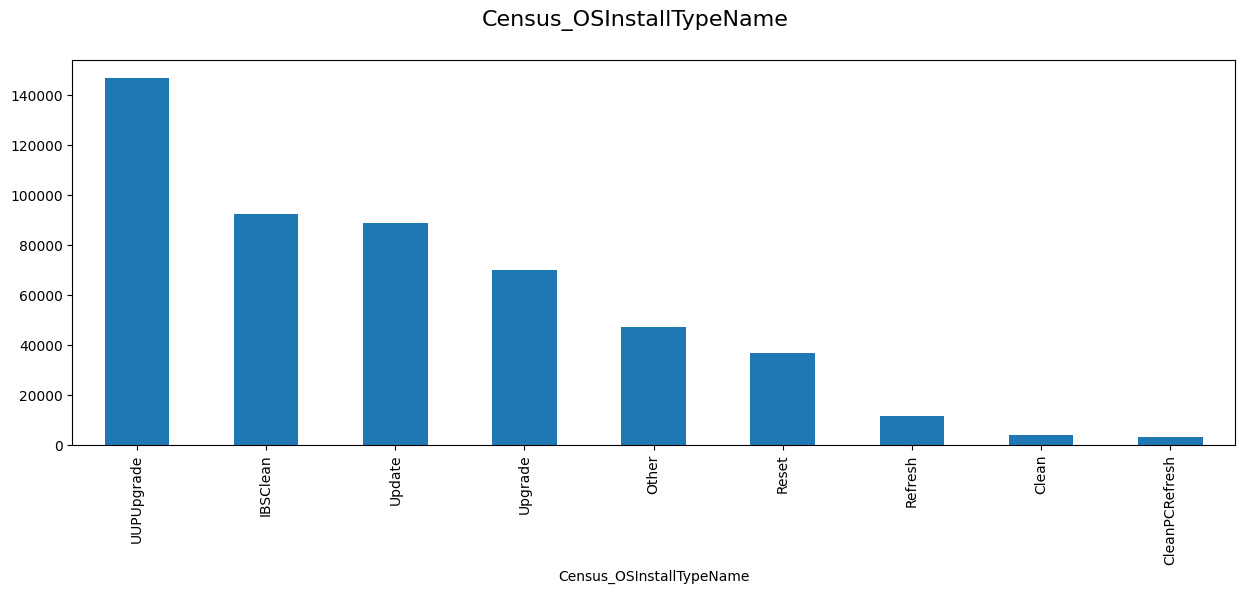

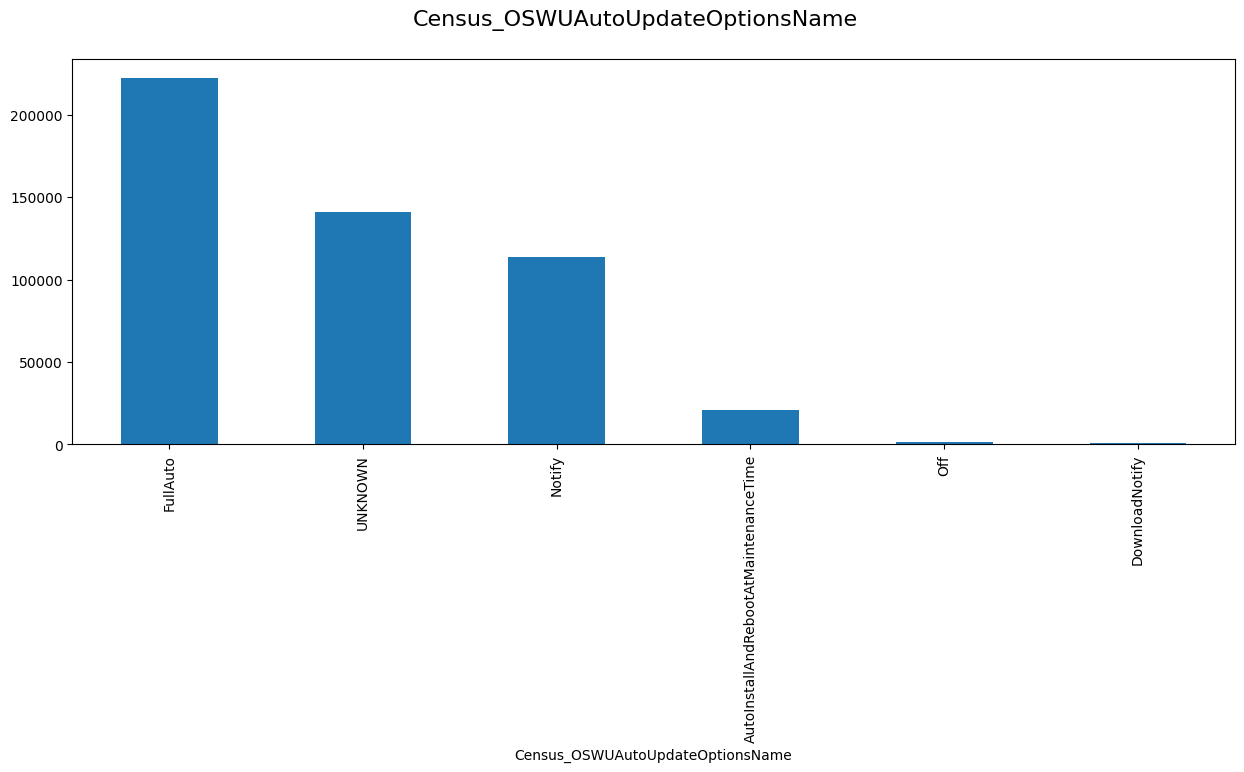

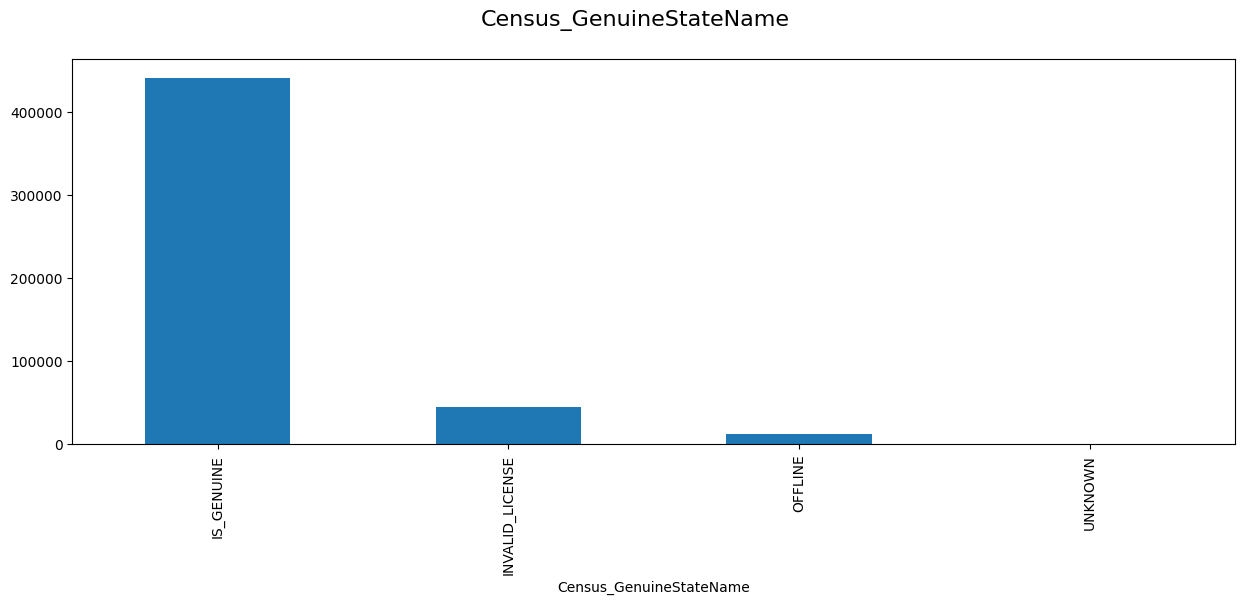

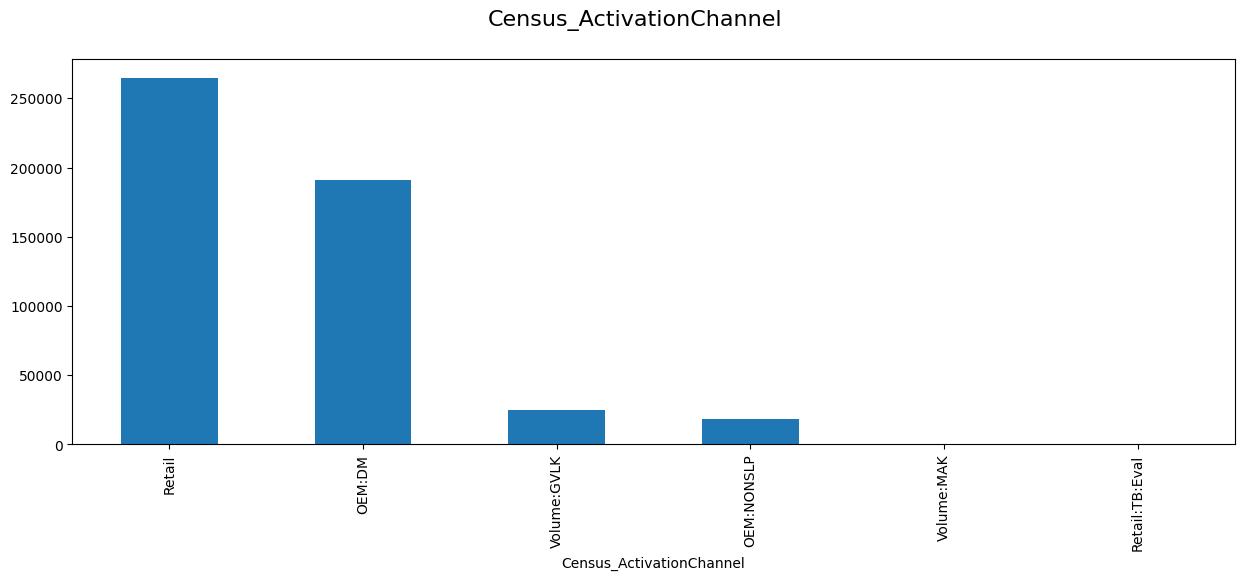

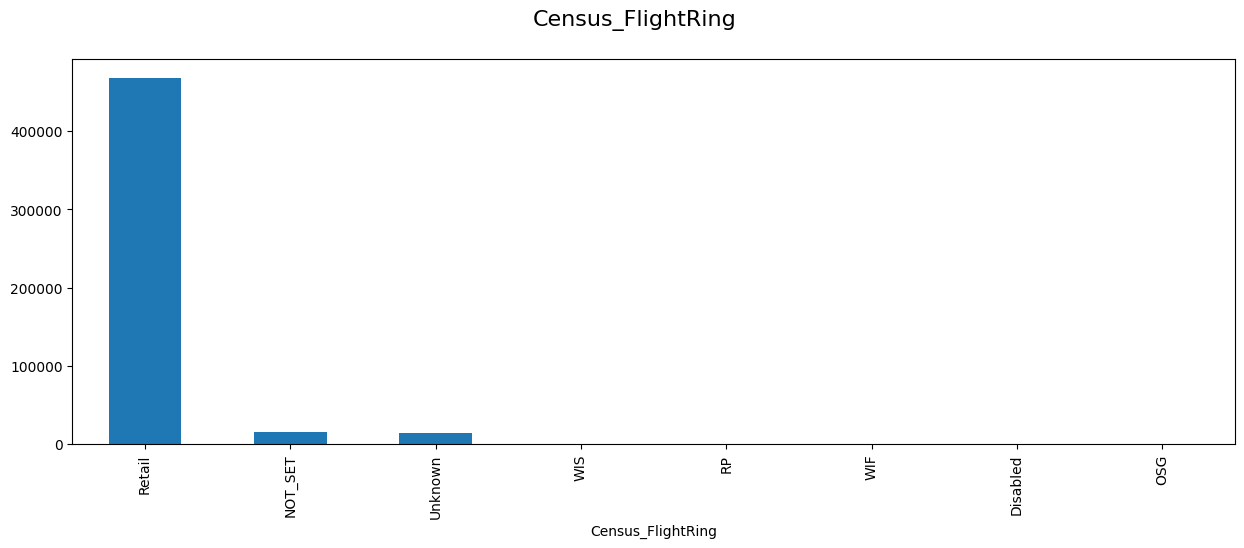

In [327]:
for c in categoric_cols:
    plot_barplot(df, column_name = c)

In [328]:
print(numeric_cols)
print(categoric_cols)

['IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode', 'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm', 'OsBuild', 'OsSuite', 'IsProtected', 'AutoSampleOptIn', 'SMode', 'Firewall', 'UacLuaenable', 'Census_ProcessorCoreCount', 'Census_PrimaryDiskTotalCapacity', 'Census_SystemVolumeTotalCapacity', 'Census_HasOpticalDiskDrive', 'Census_TotalPhysicalRAM', 'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'Census_InternalPrimaryDisplayResolutionHorizontal', 'Census_InternalPrimaryDisplayResolutionVertical', 'Census_InternalBatteryNumberOfCharges', 'Census_OSBuildNumber', 'Census_OSBuildRevision', 'Census_IsPortableOperatingSystem', 'Census_IsFlightsDisabled', 'Census_IsSecureBootEnabled', 'Census_IsVirtualDevice', 'Census_IsTouchEnabled', 'Census_IsPenCapable', 'Census_IsAlwaysOnAlwaysConnectedCapable', 'Wdft_IsGamer']
['ProductName', 'EngineVersion', 'AppVersion', 'AvSigVersion', 'Platform', 'Processor', 'OsVer', 'OsPlatformSubRelease', 'OsBuildLab', 'SkuEdition', 'SmartScreen', 'Censu

### ANALISIS BIVARIANTE


In [329]:
#Ahora paso a analizar la relacion entre las variables numéricas con la variable target("Has detections")

In [330]:
def plot_histogram_by_target(df, input_name, target_name):
    fig = plt.figure()
    fig.suptitle(input_name, fontsize=16)
    ax1 = fig.add_subplot(121)
    sns.histplot(data=df, x=input_name, hue=target_name, alpha=.5, bins=25, ax=ax1)
    
    ax2 = fig.add_subplot(122)
    sns.boxplot(data=df, x=target_name, y=input_name, ax=ax2)

C:\Users\admin\AppData\Local\Temp\ipykernel_6720\1920988923.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


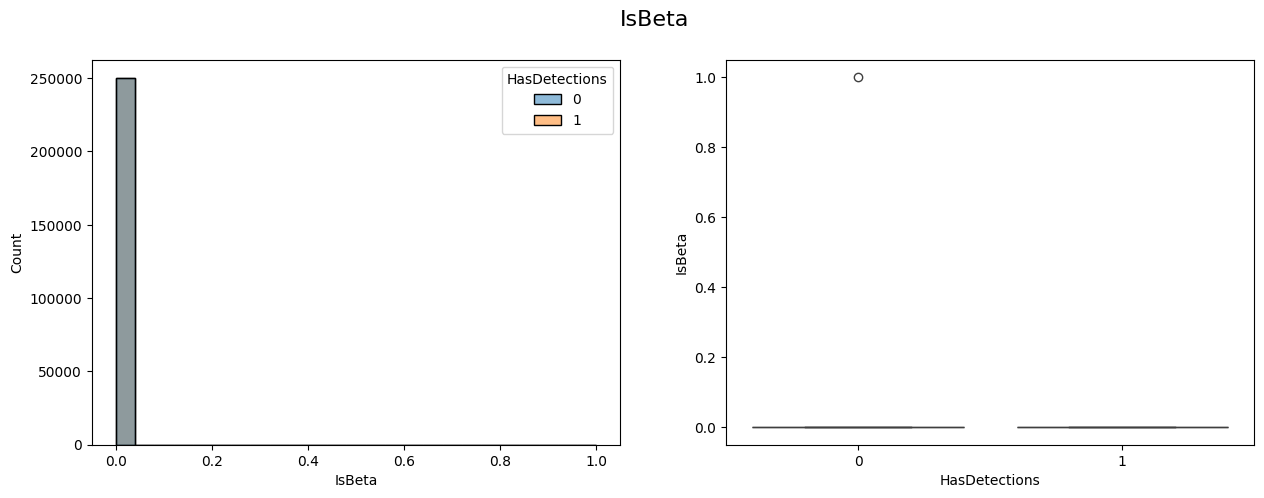

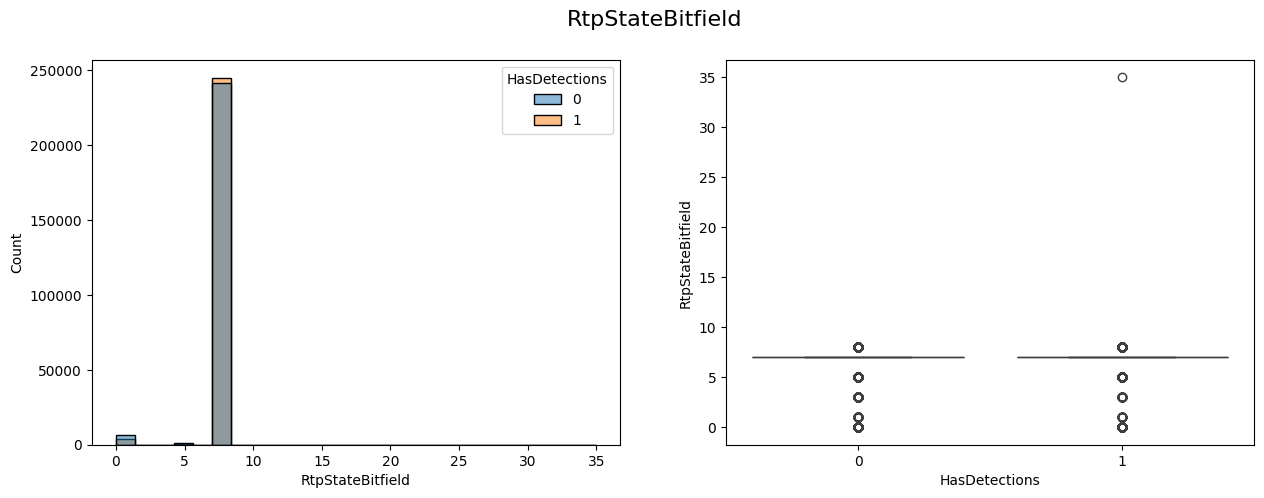

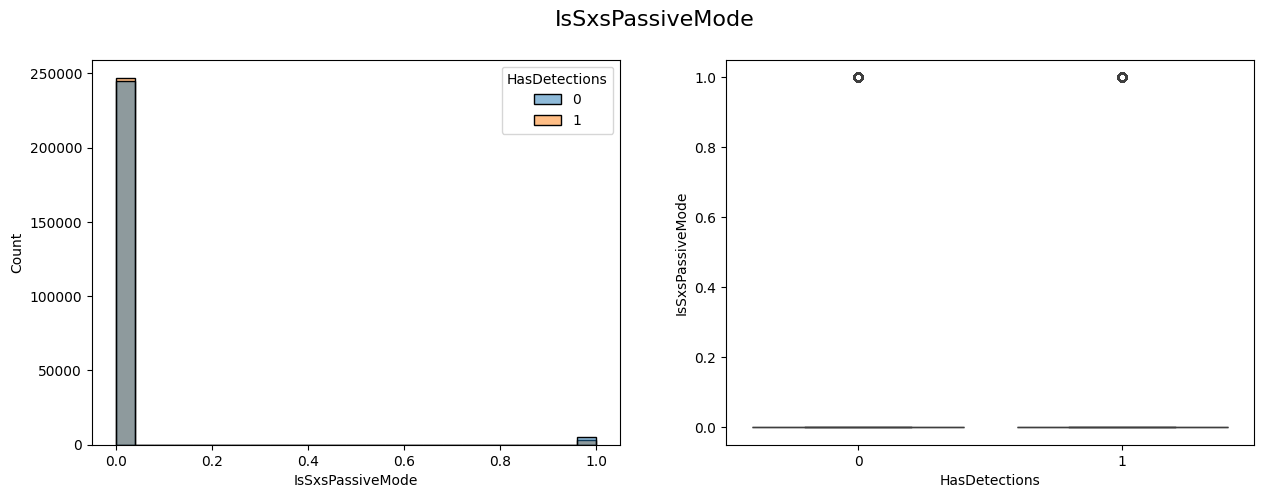

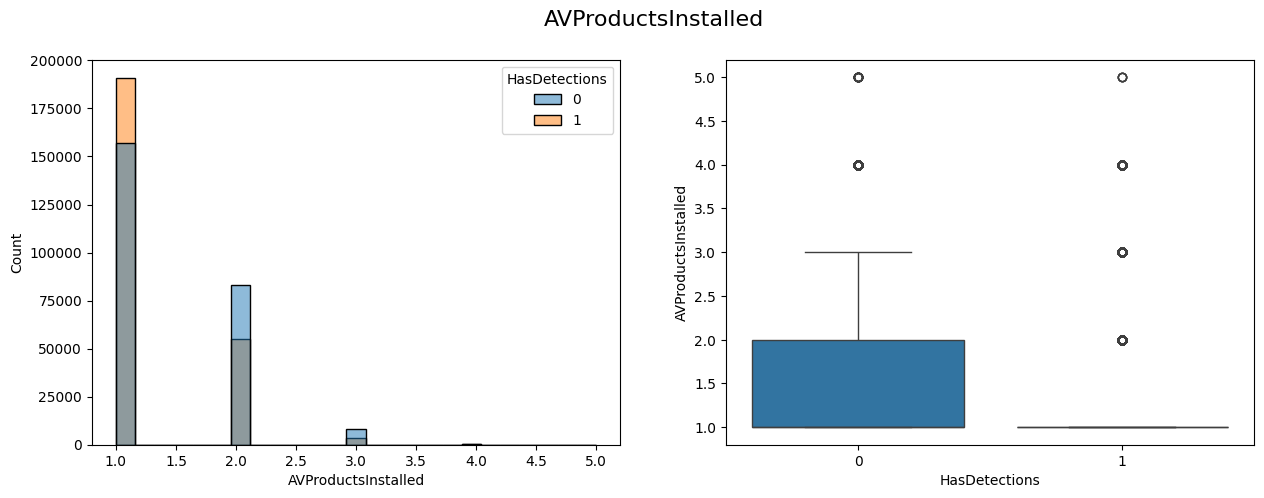

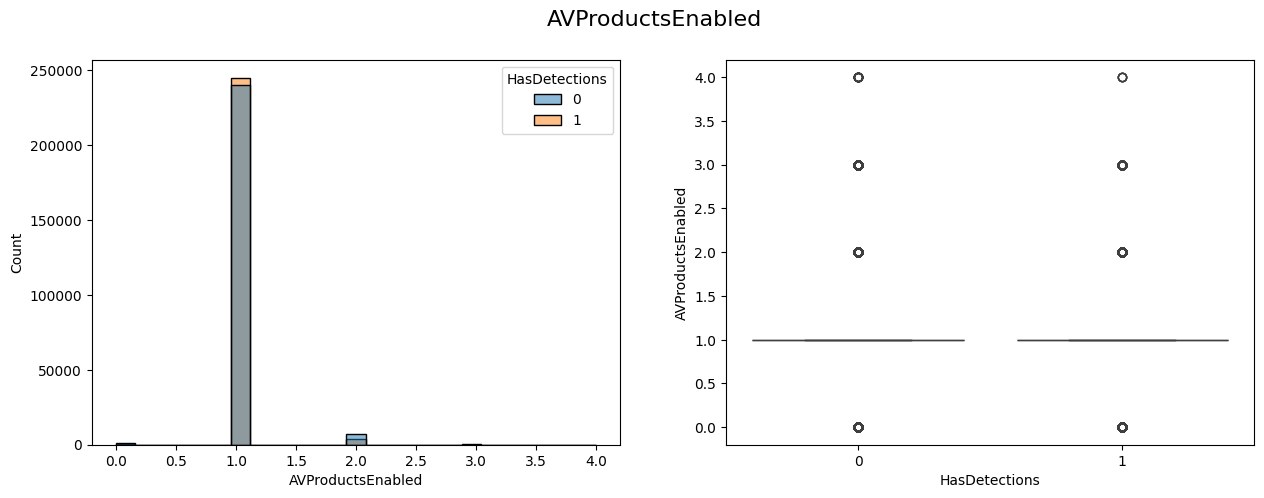

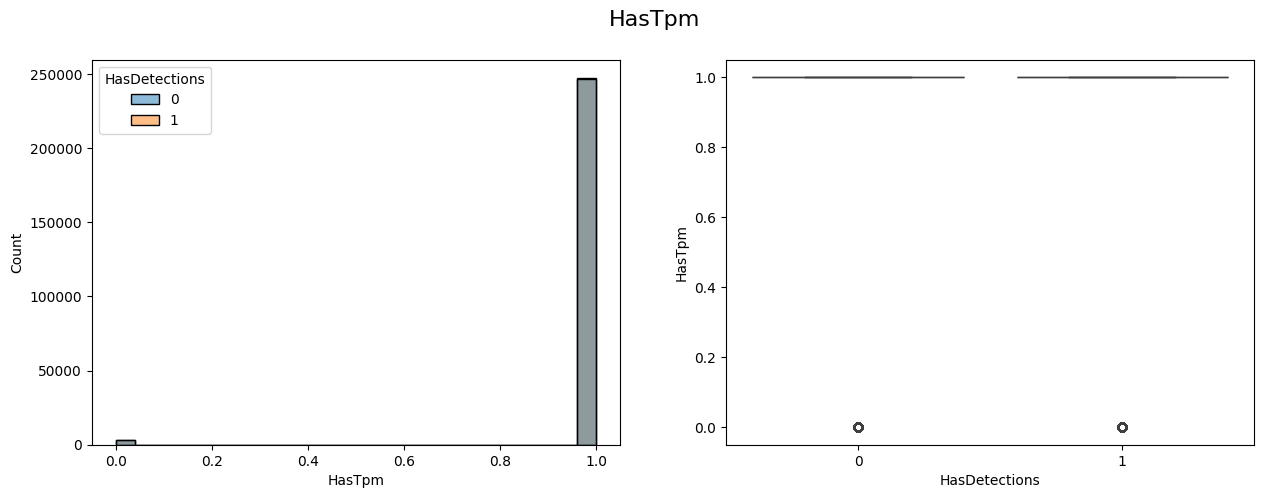

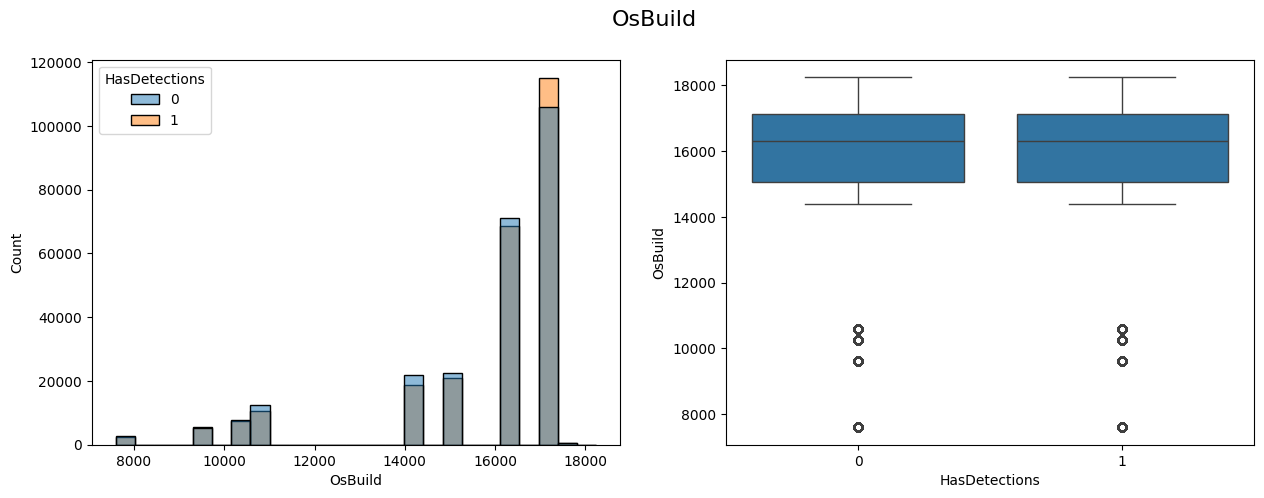

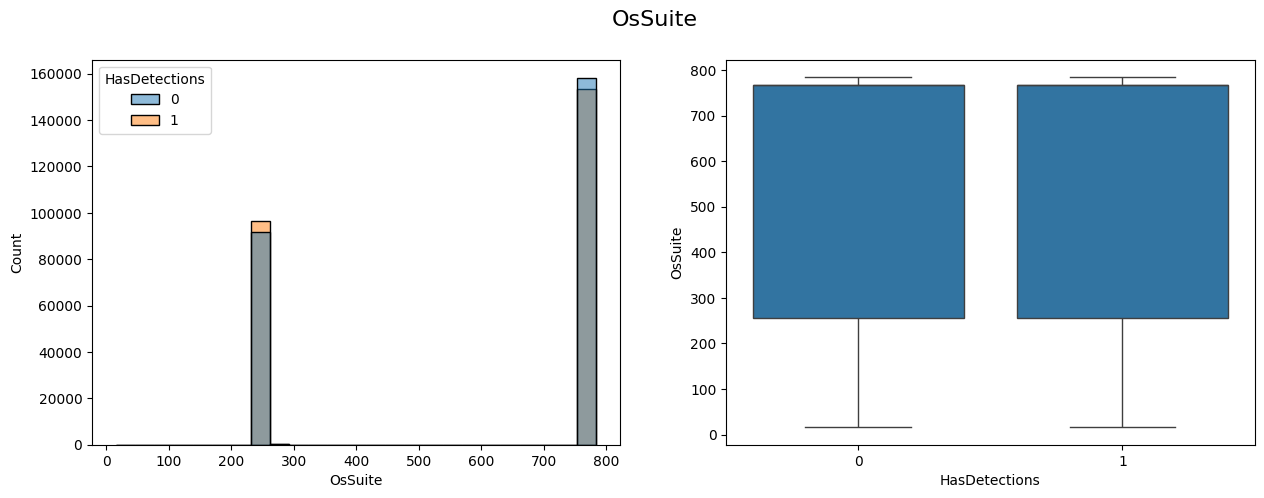

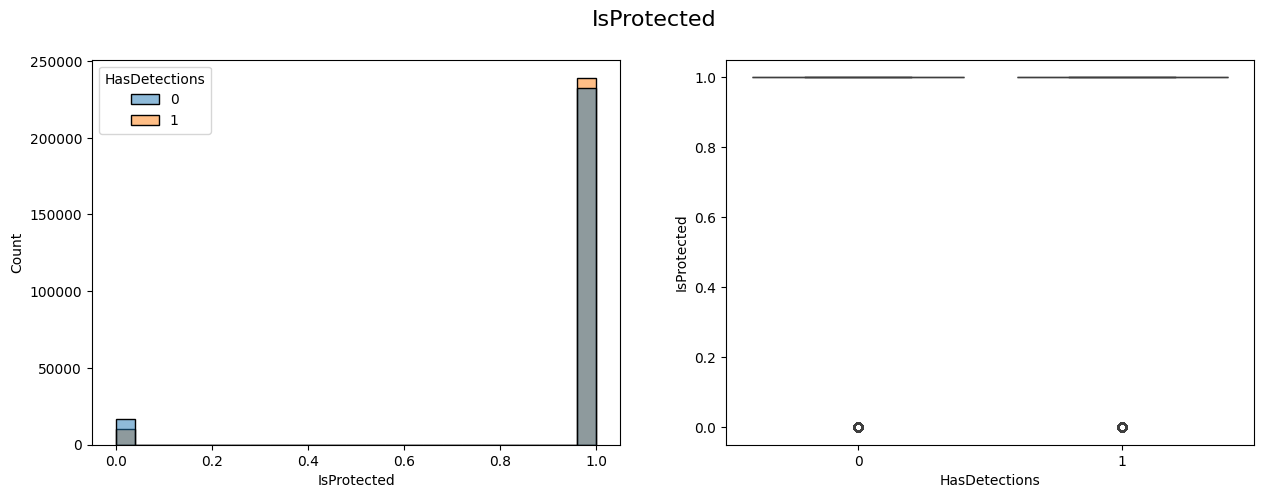

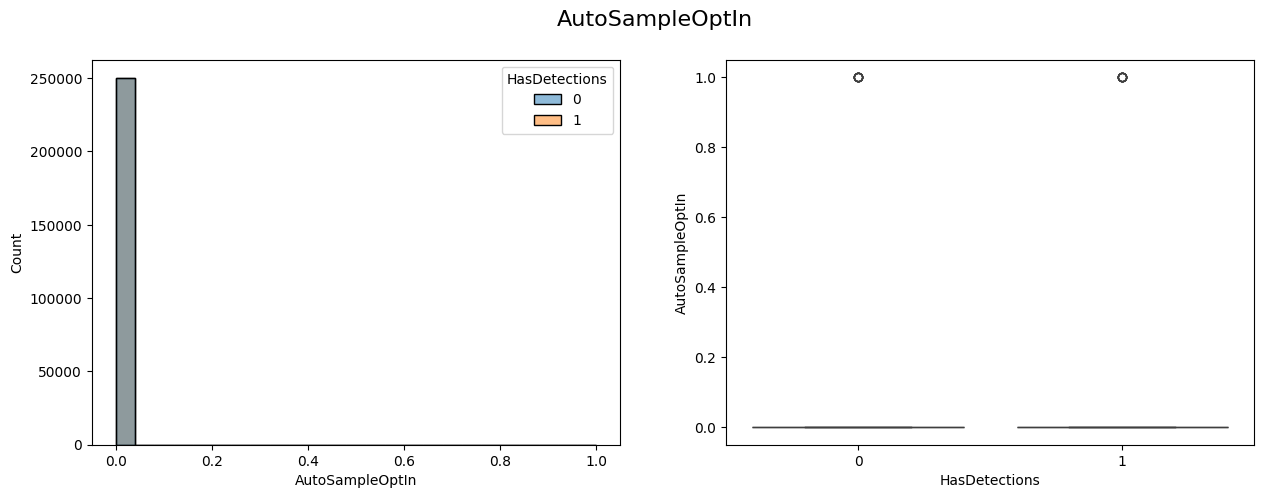

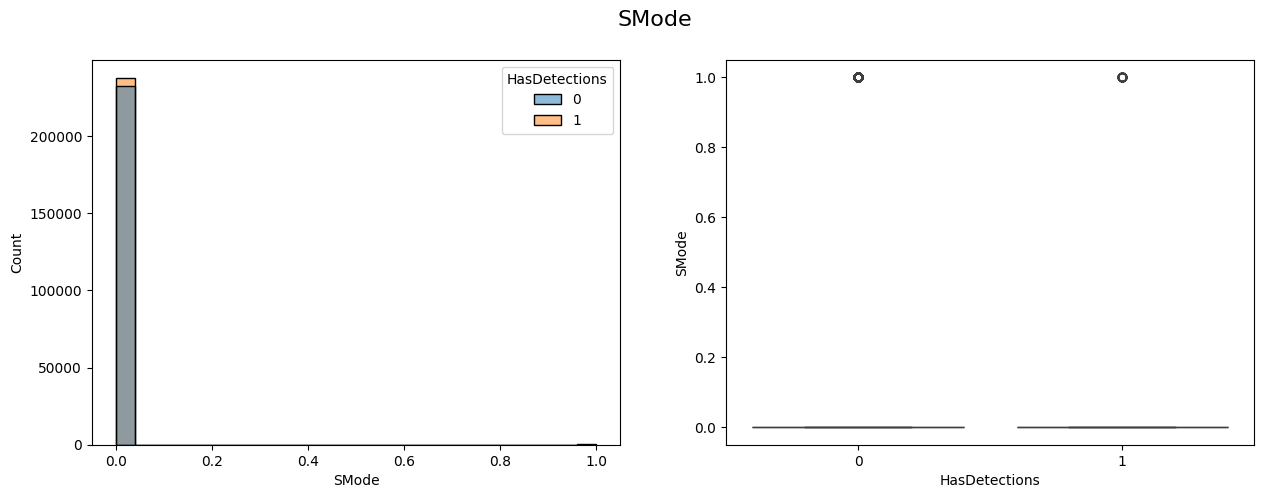

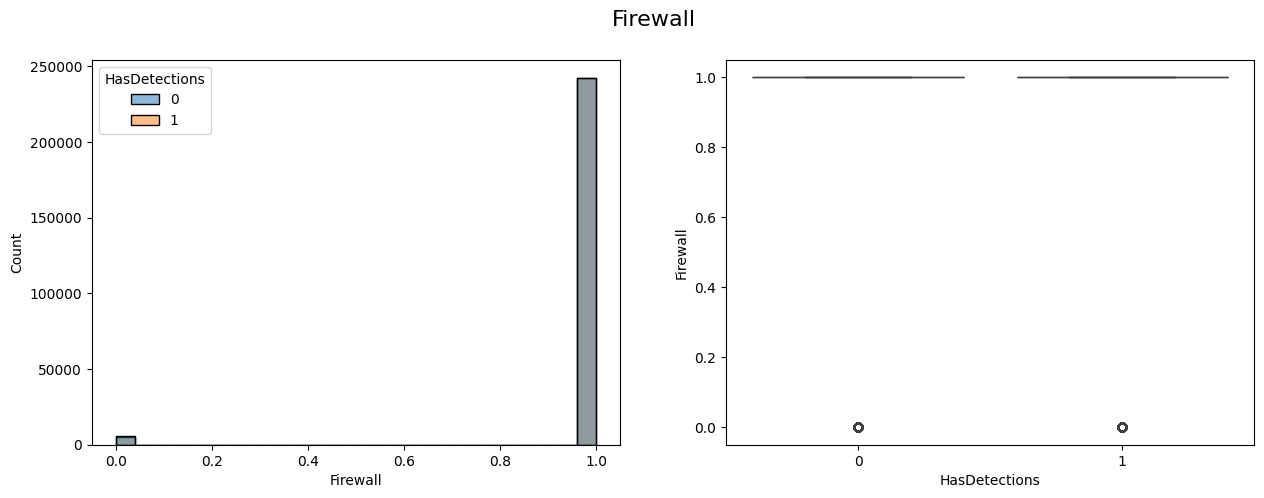

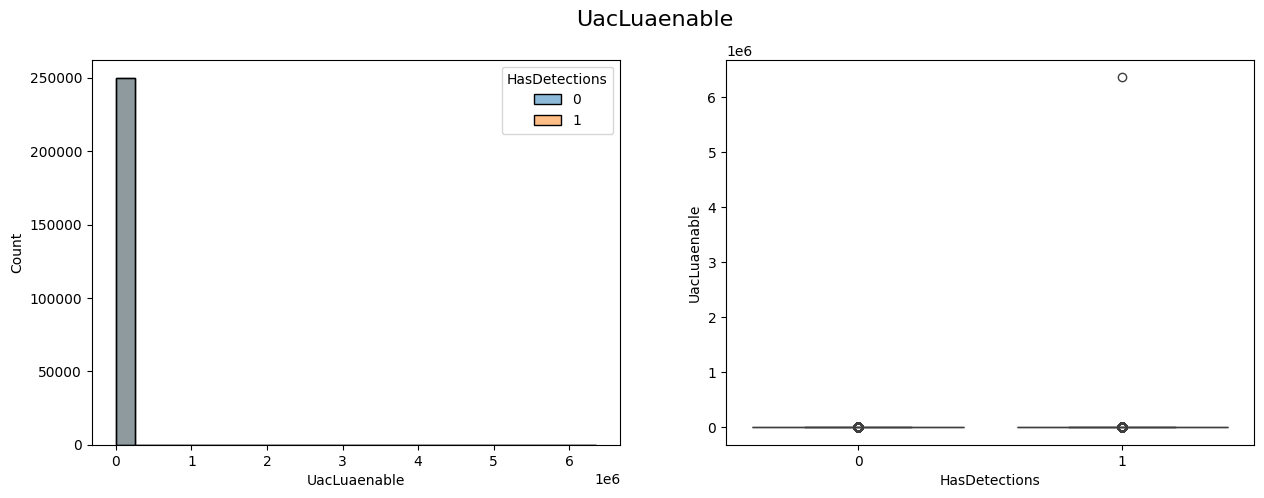

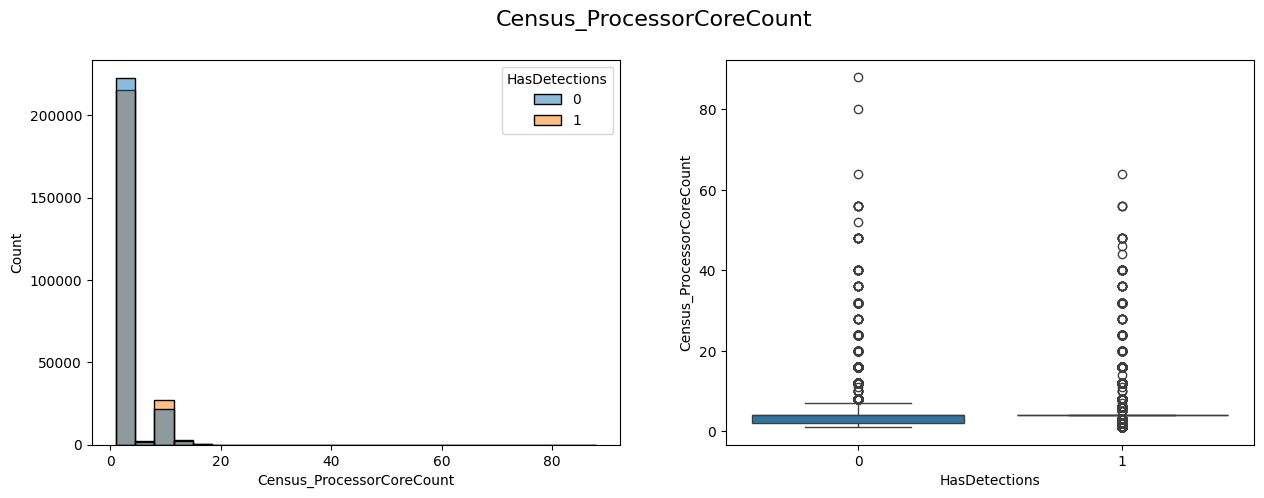

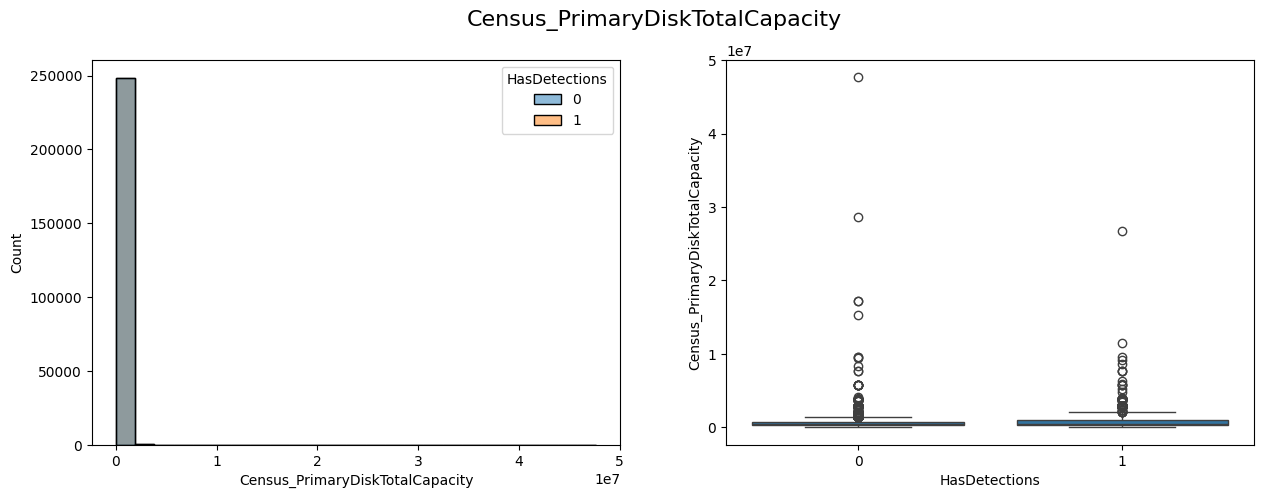

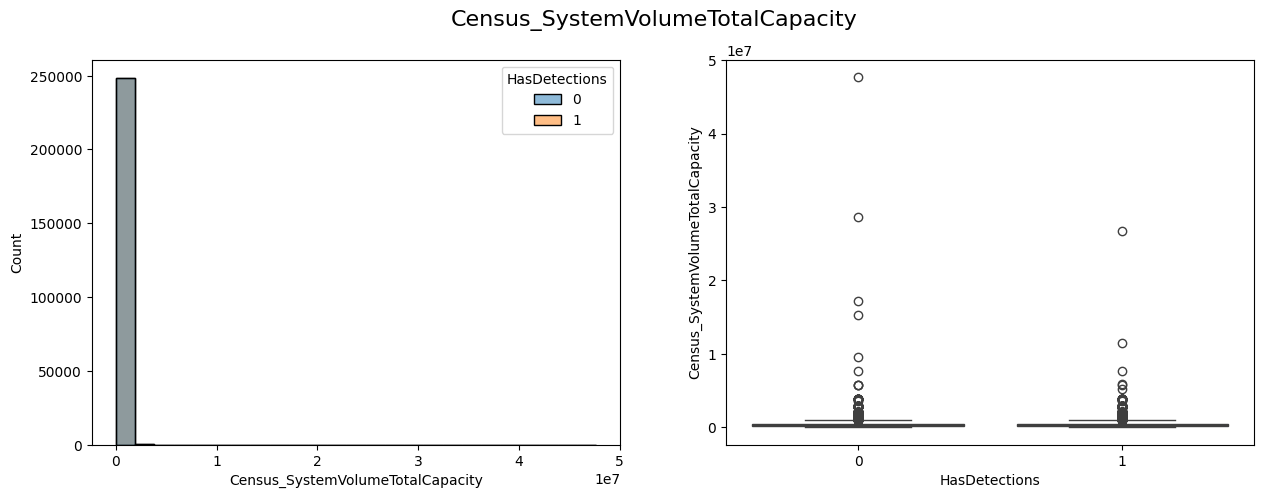

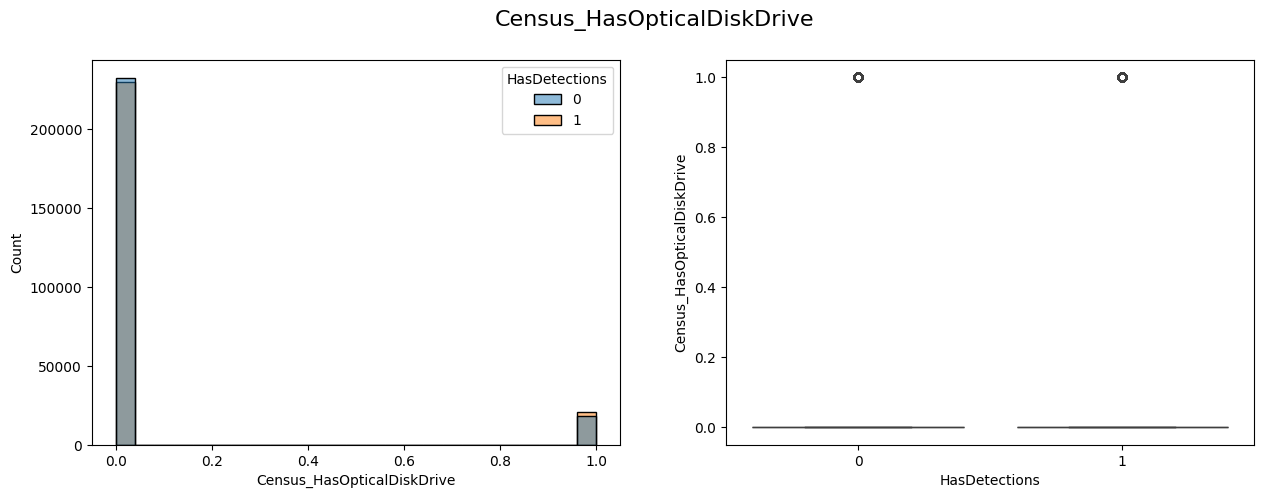

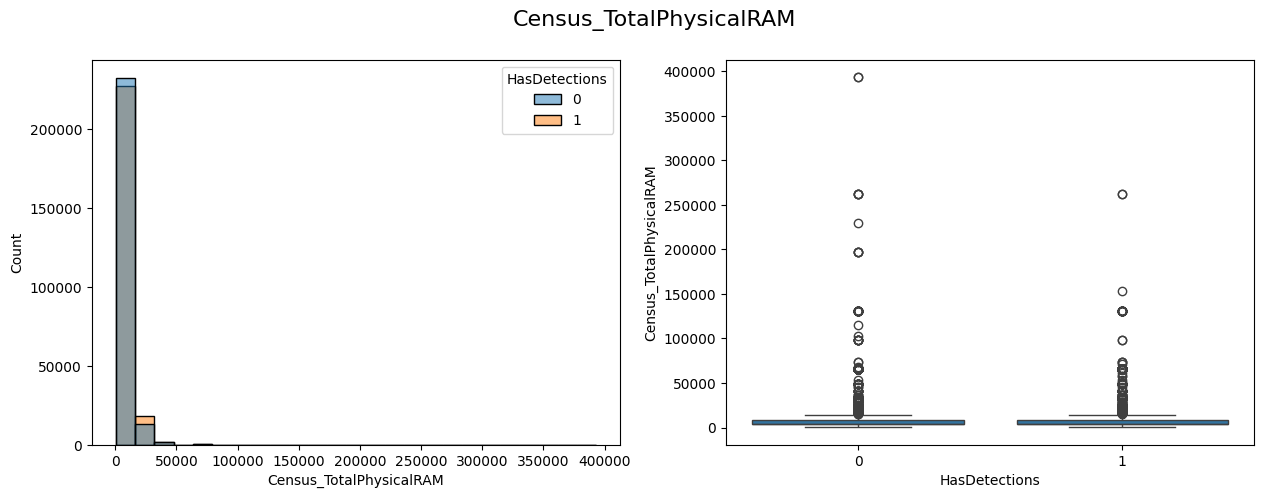

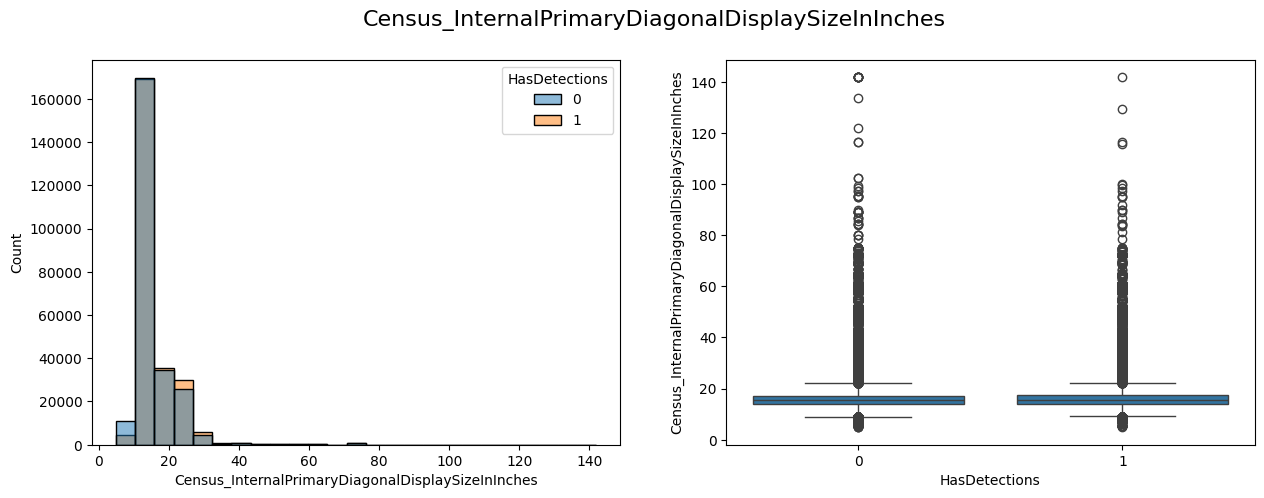

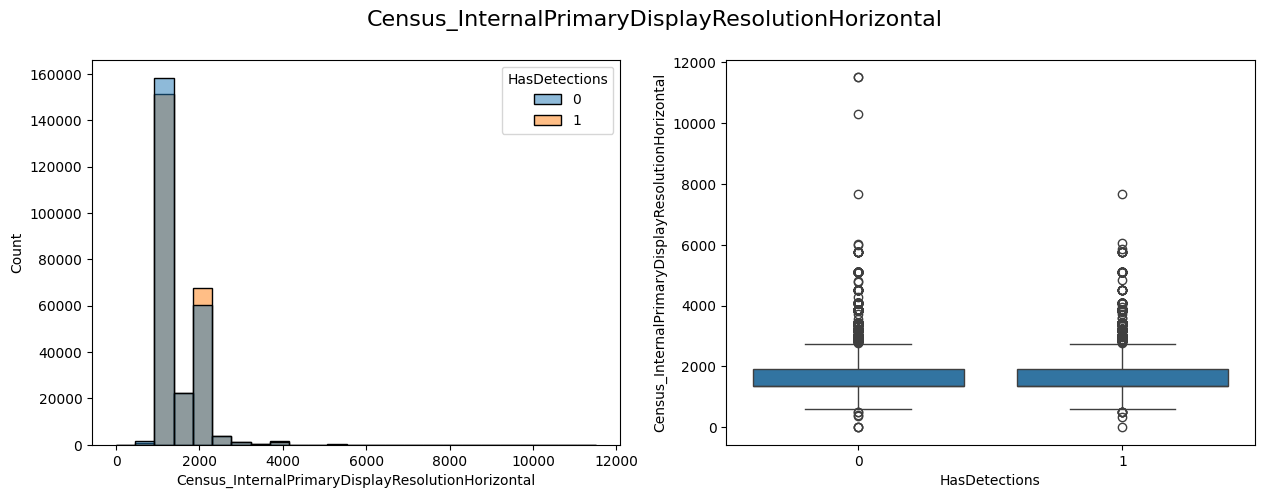

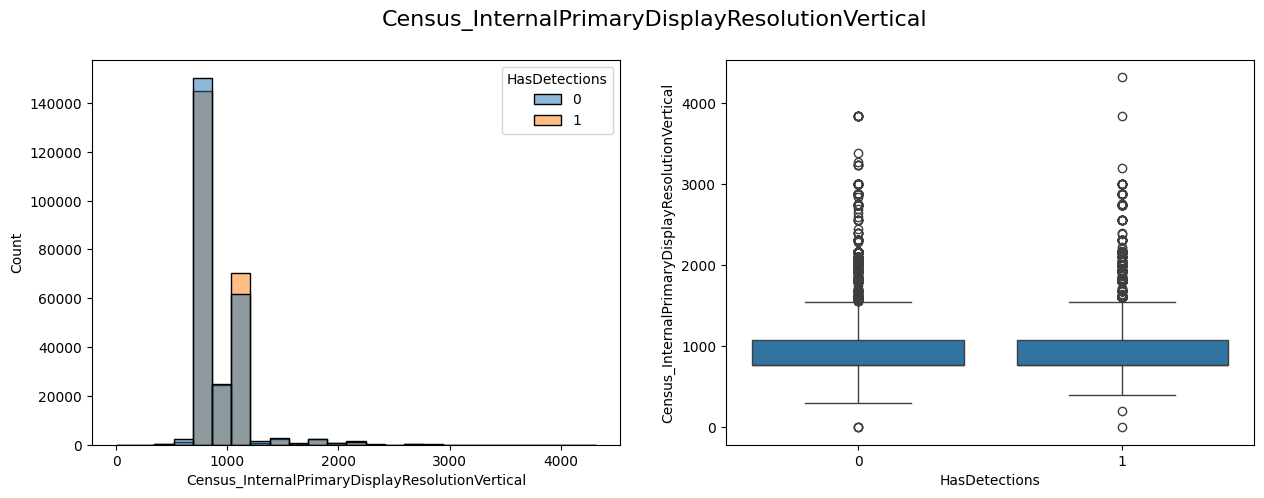

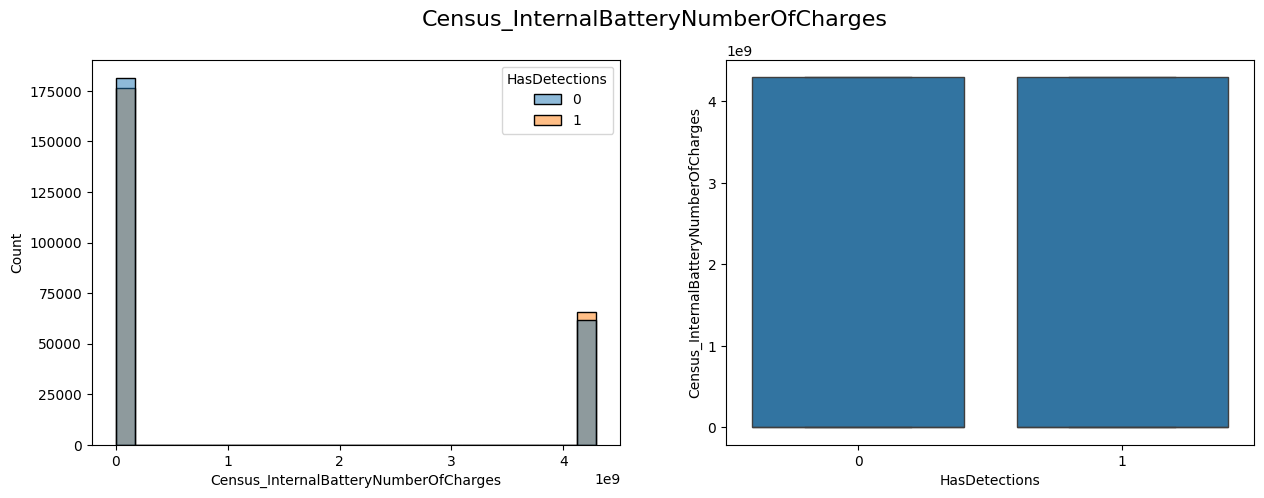

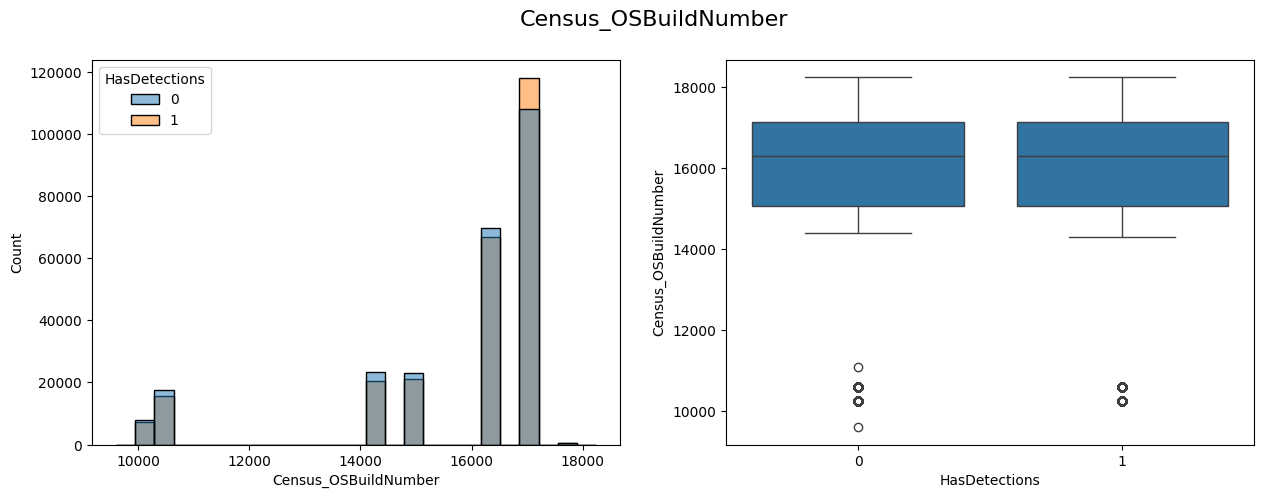

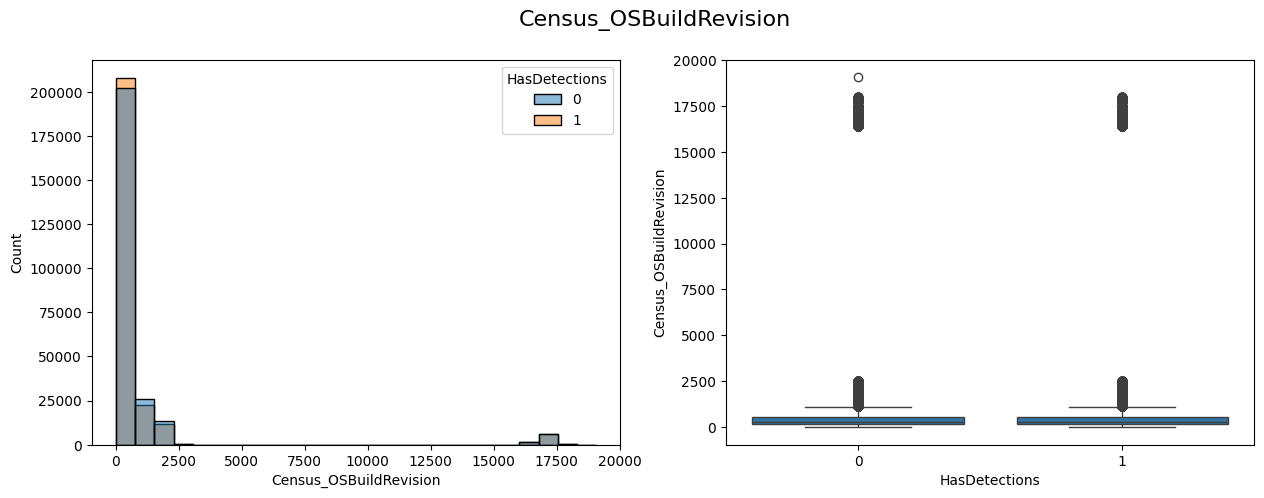

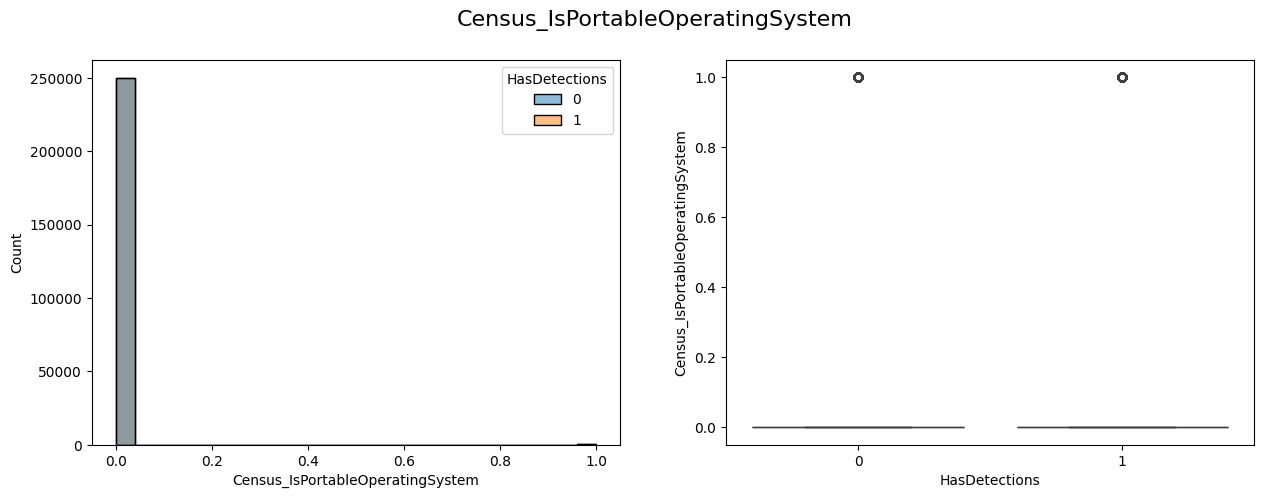

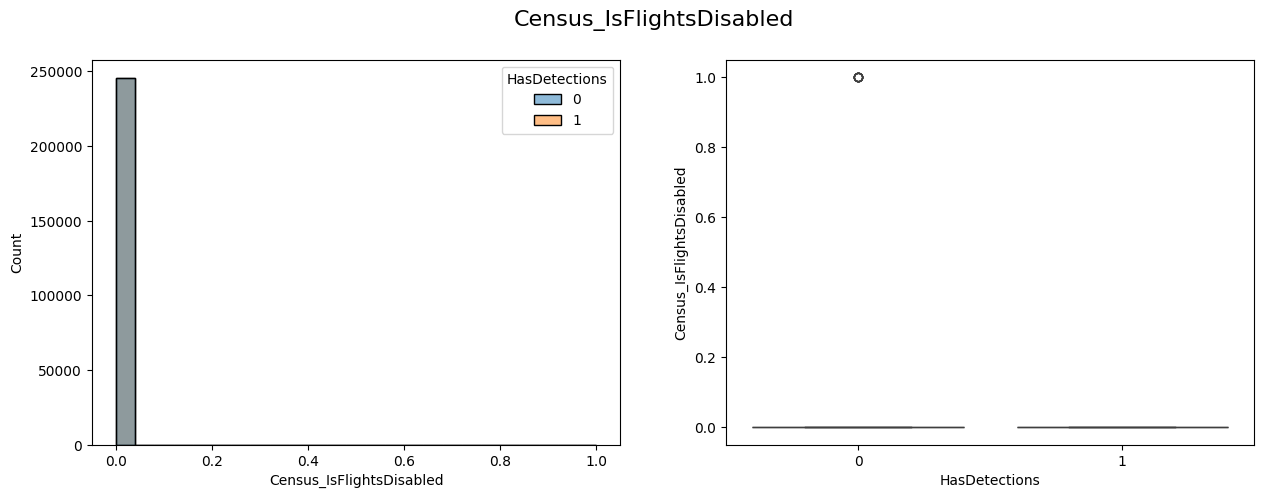

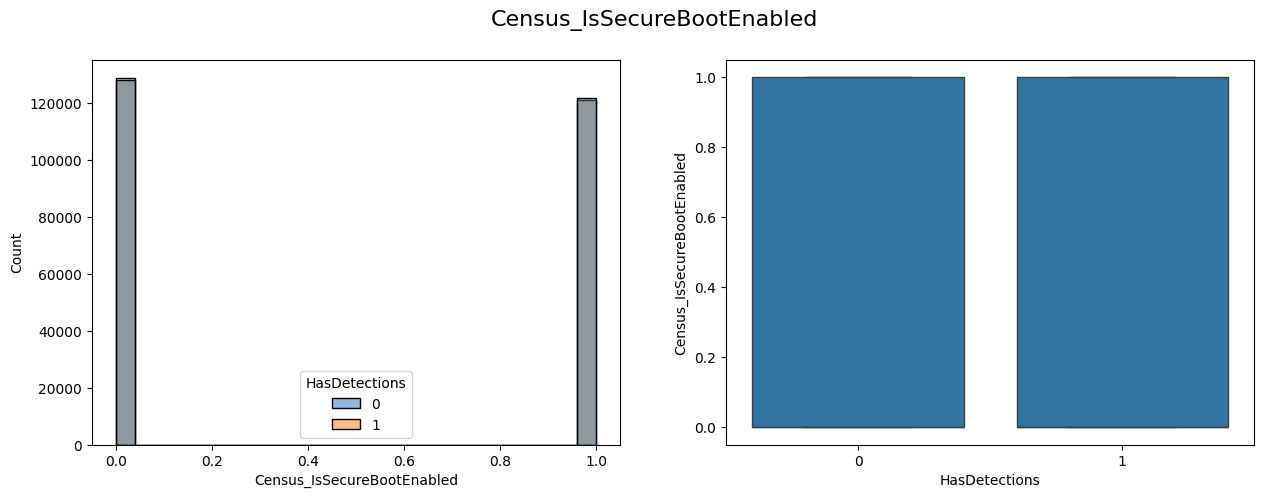

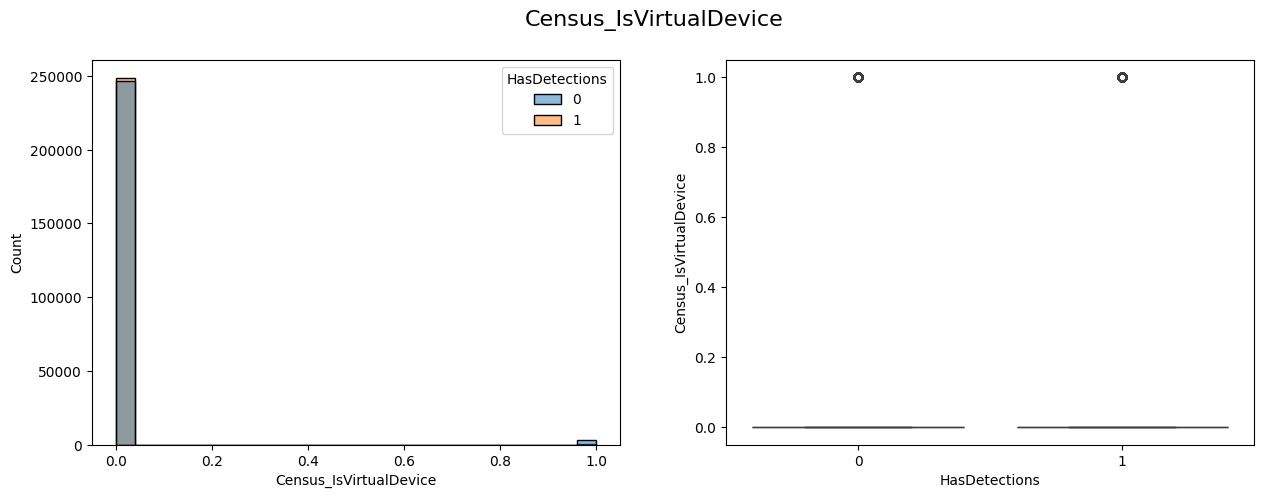

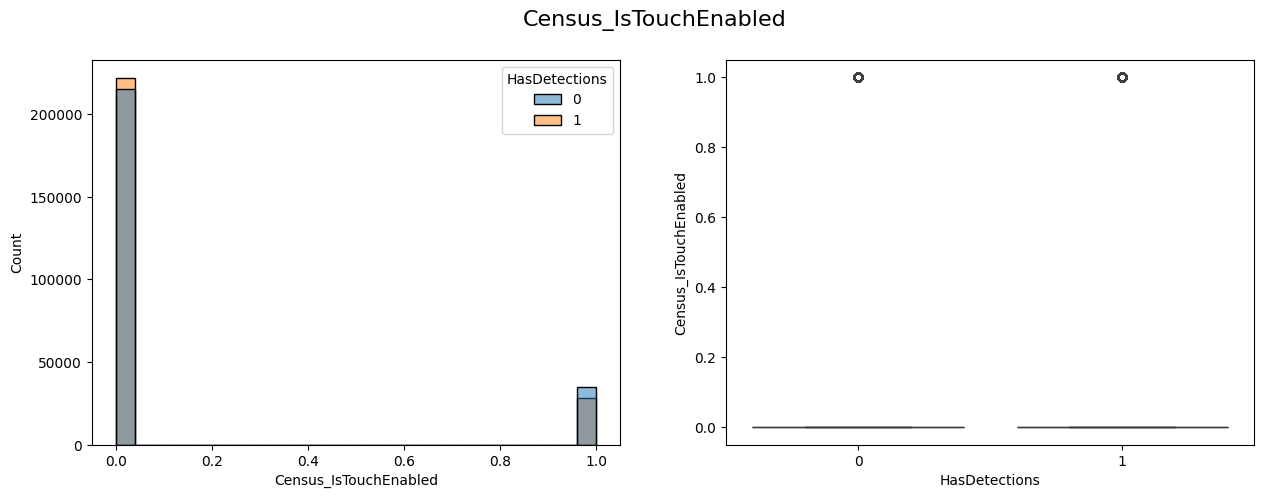

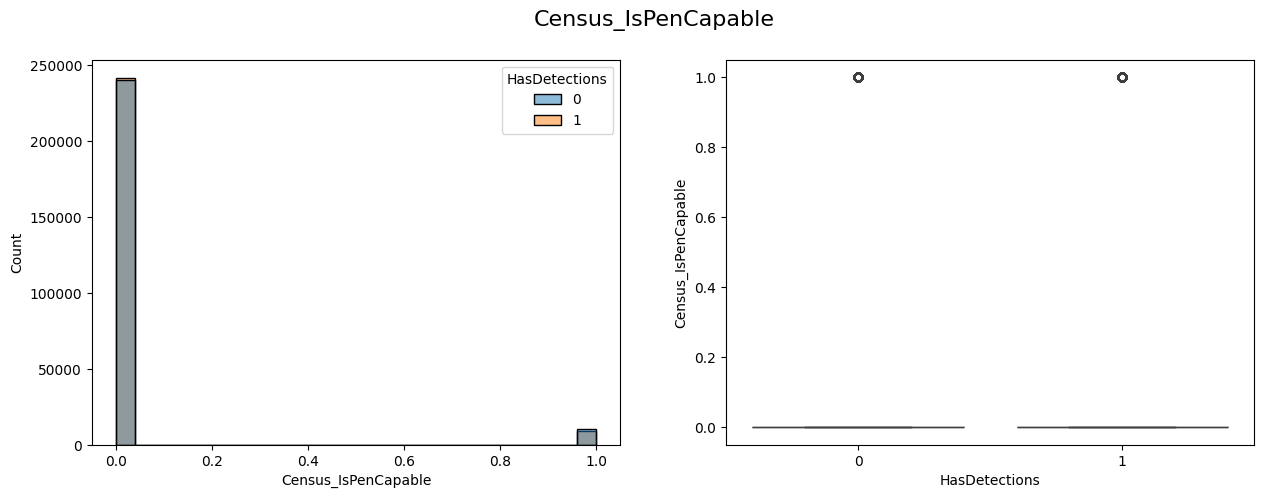

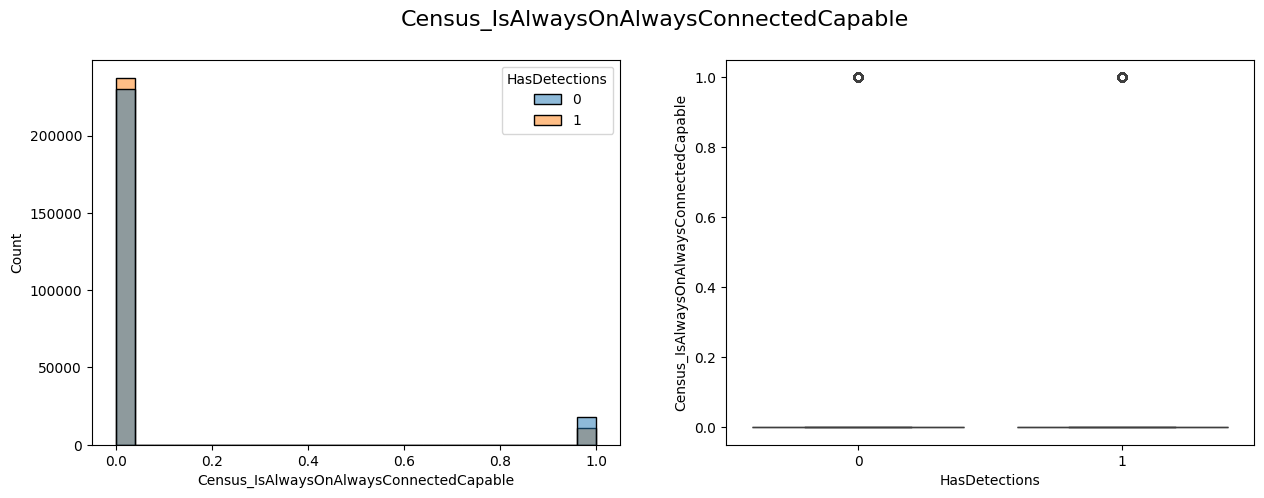

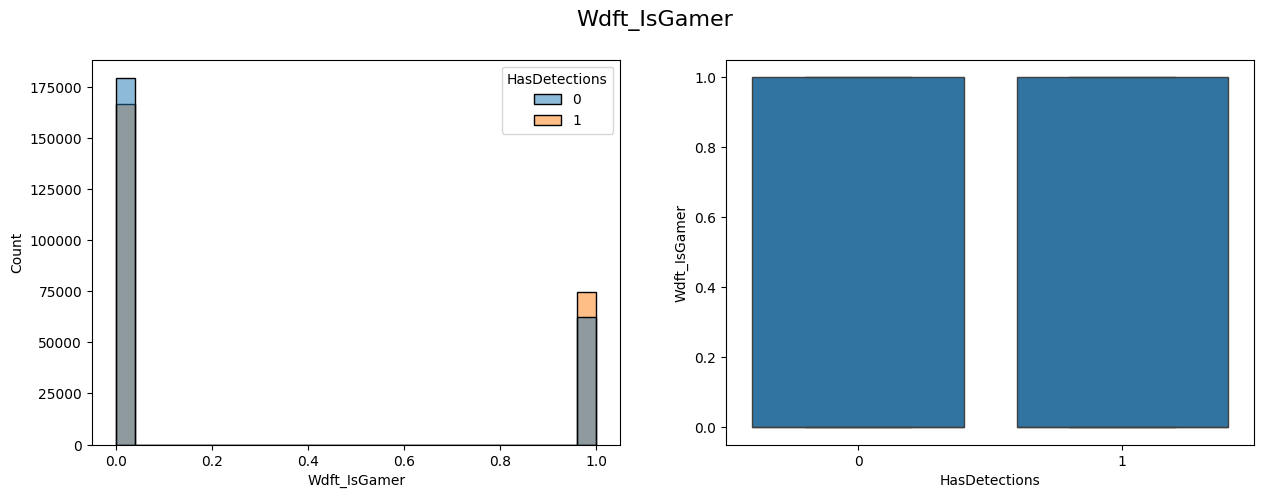

In [331]:
for c in numeric_cols:
    plot_histogram_by_target(df = df, input_name = c, target_name = target_col)

In [332]:
#Ahora hago lo mismo, pero con las variables categóricas...

In [333]:
def plot_barplot_by_target(df, input_name, target_name, stacked = False):
    fig = plt.figure()
    pd.crosstab(df[input_name], df[target_name]).plot(kind = 'bar', rot = 0, stacked = stacked)

C:\Users\admin\AppData\Local\Temp\ipykernel_6720\2490031002.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


<Figure size 1500x500 with 0 Axes>

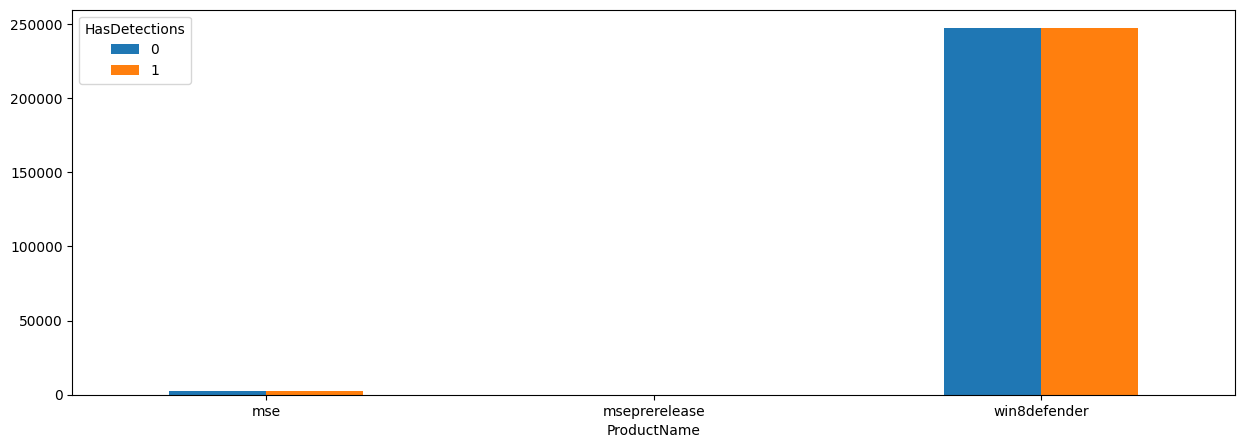

<Figure size 1500x500 with 0 Axes>

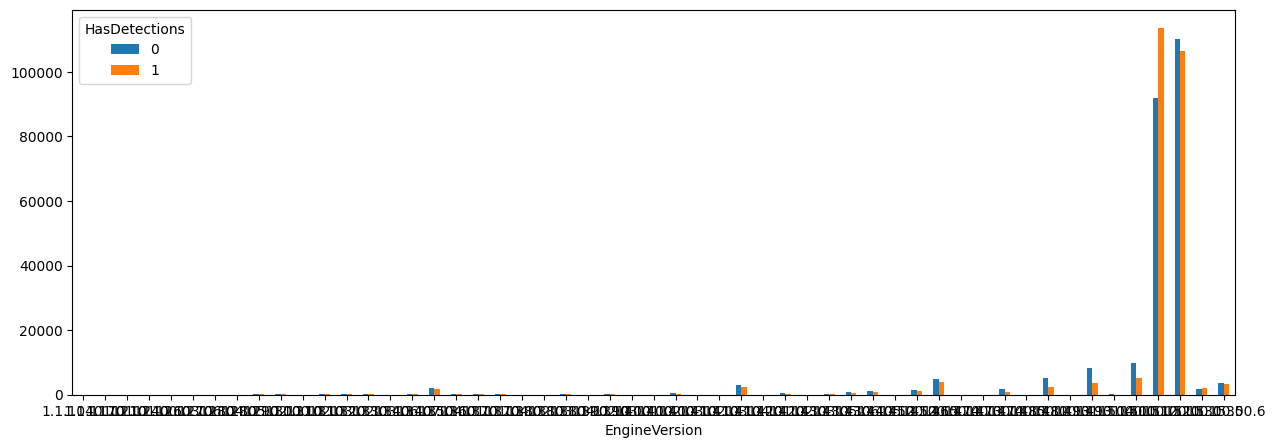

<Figure size 1500x500 with 0 Axes>

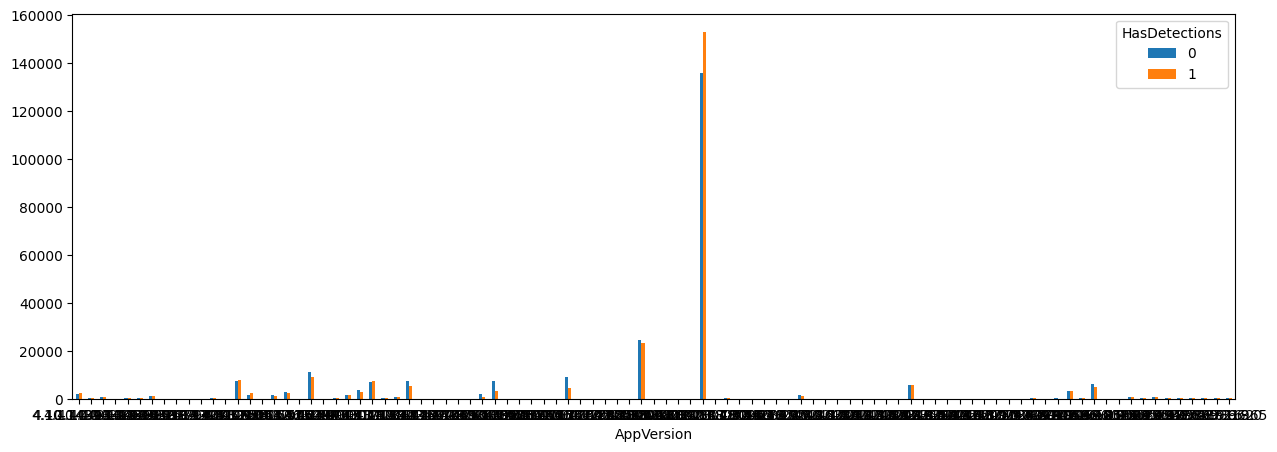

<Figure size 1500x500 with 0 Axes>

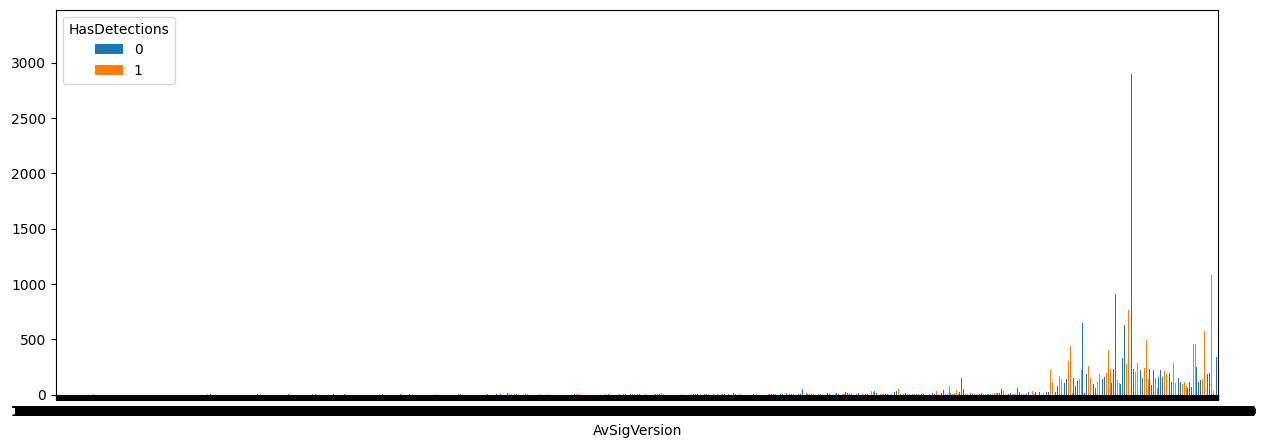

<Figure size 1500x500 with 0 Axes>

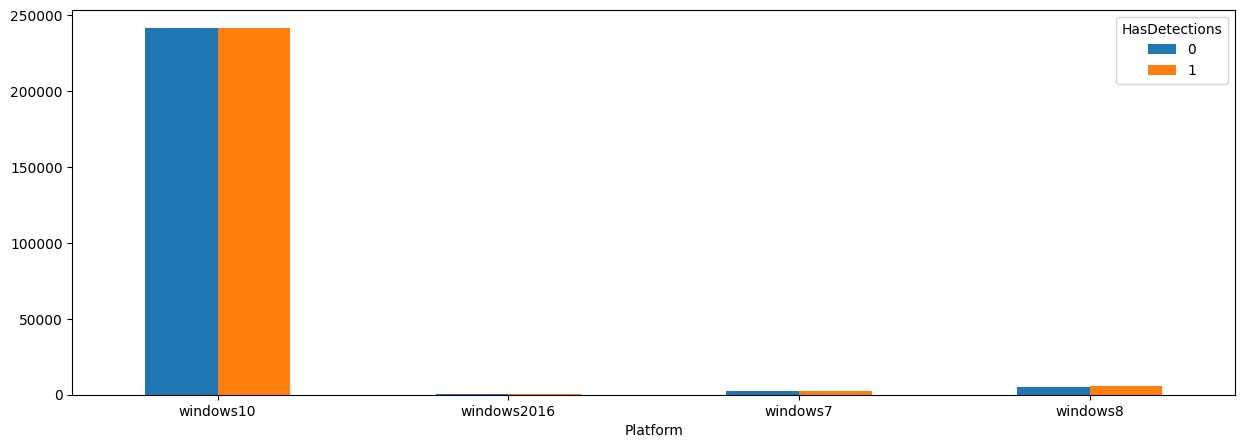

<Figure size 1500x500 with 0 Axes>

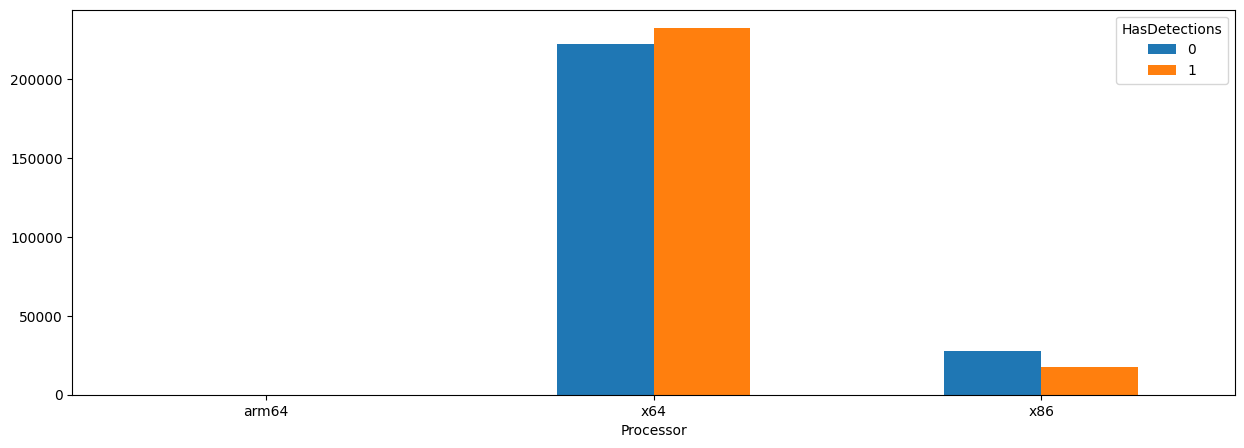

<Figure size 1500x500 with 0 Axes>

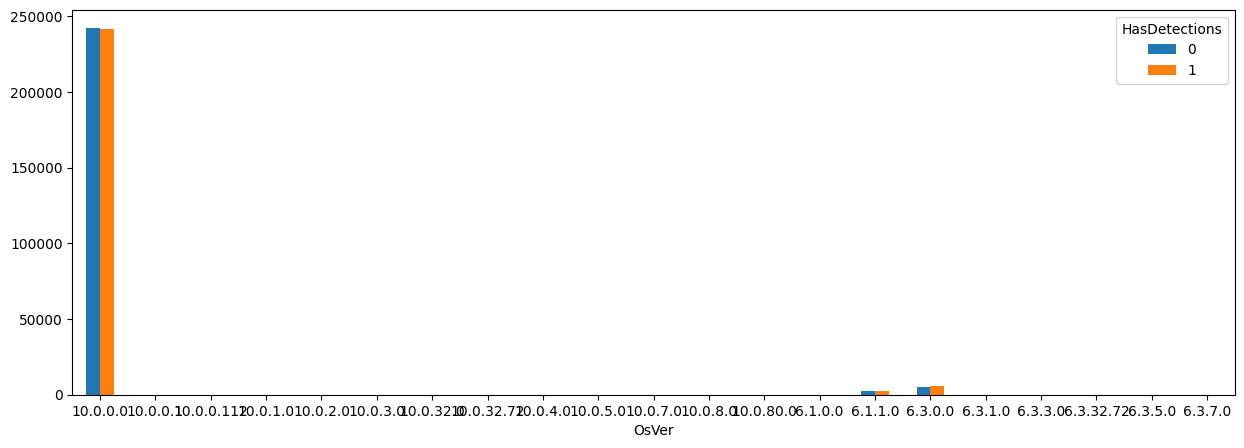

<Figure size 1500x500 with 0 Axes>

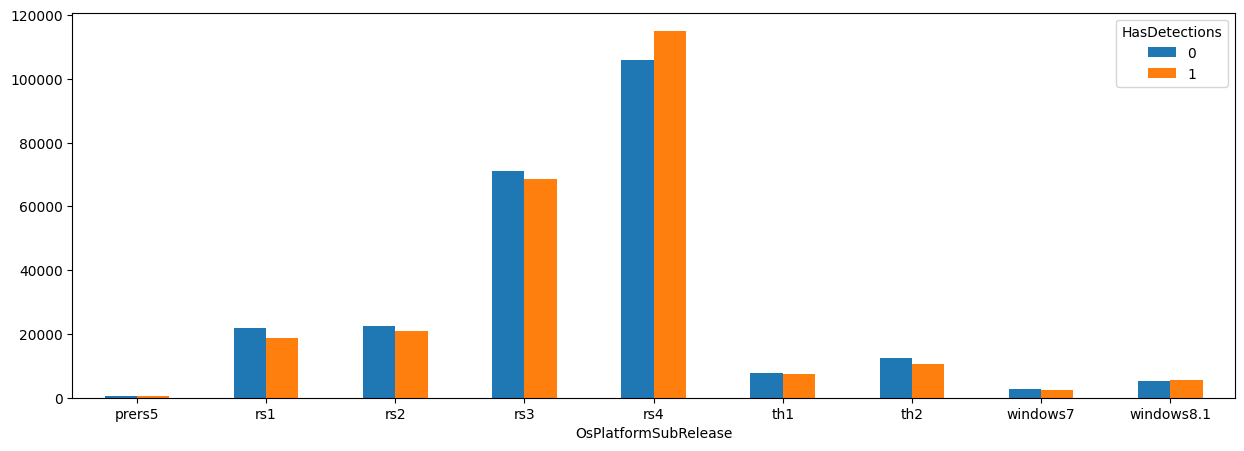

<Figure size 1500x500 with 0 Axes>

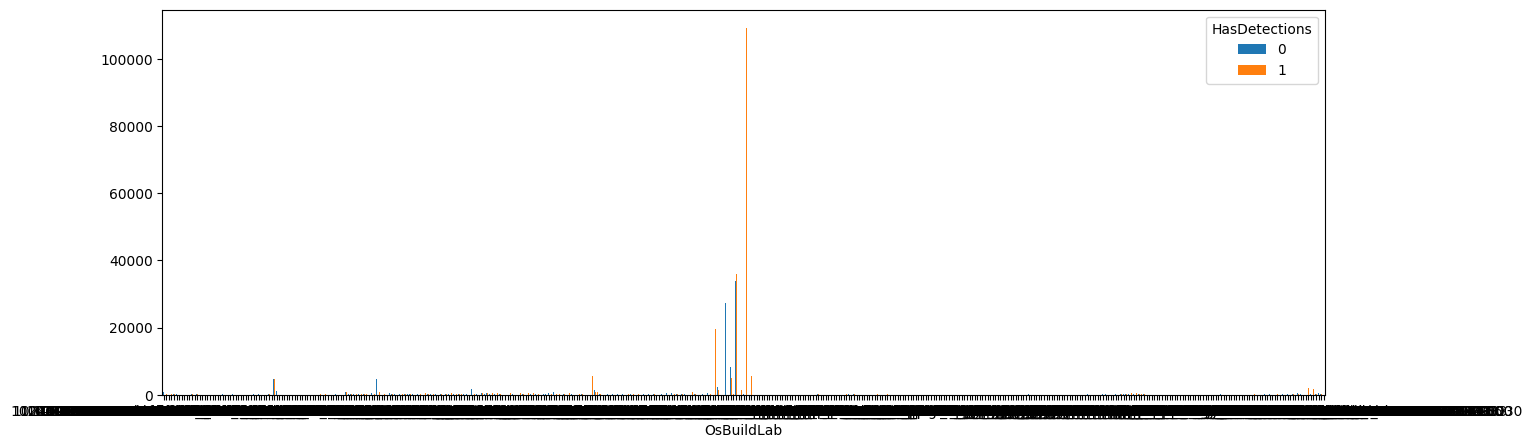

<Figure size 1500x500 with 0 Axes>

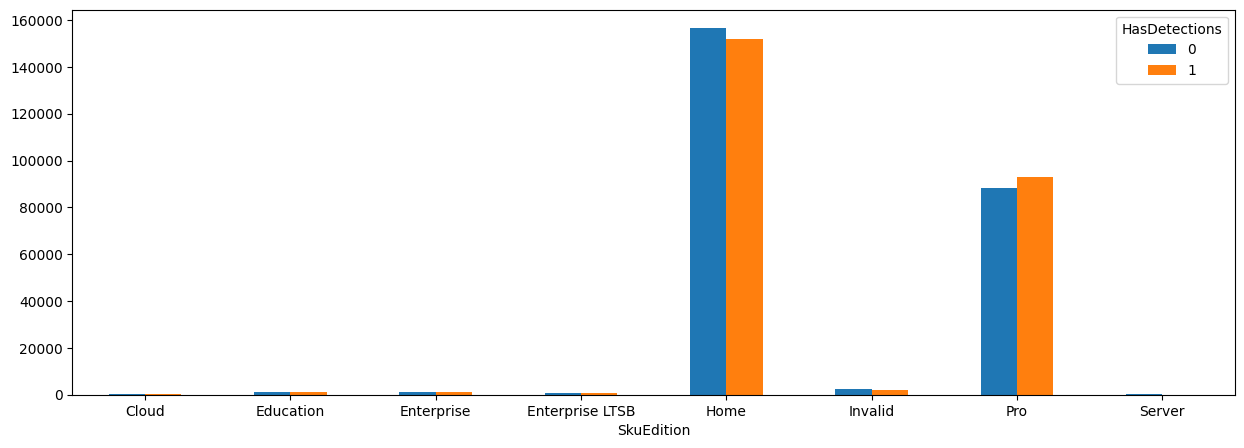

<Figure size 1500x500 with 0 Axes>

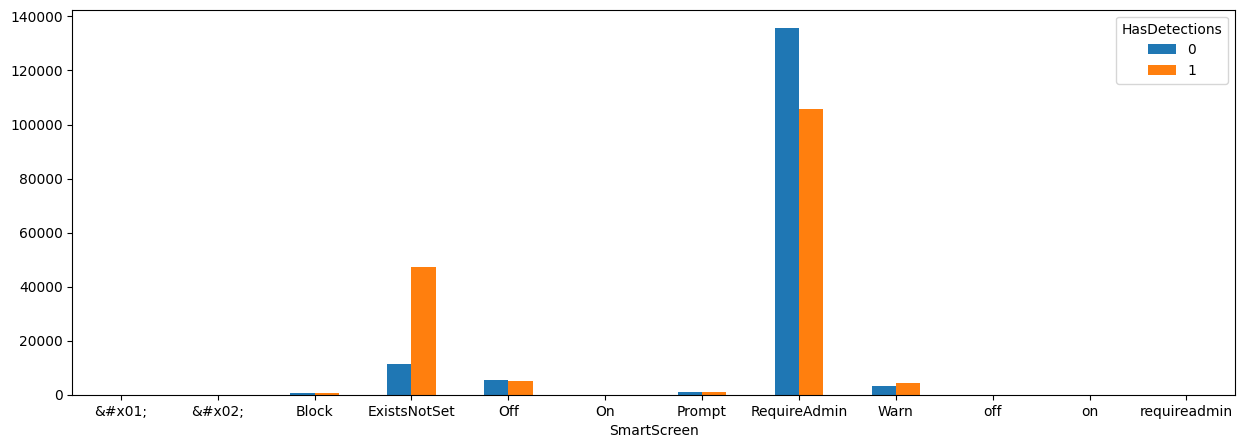

<Figure size 1500x500 with 0 Axes>

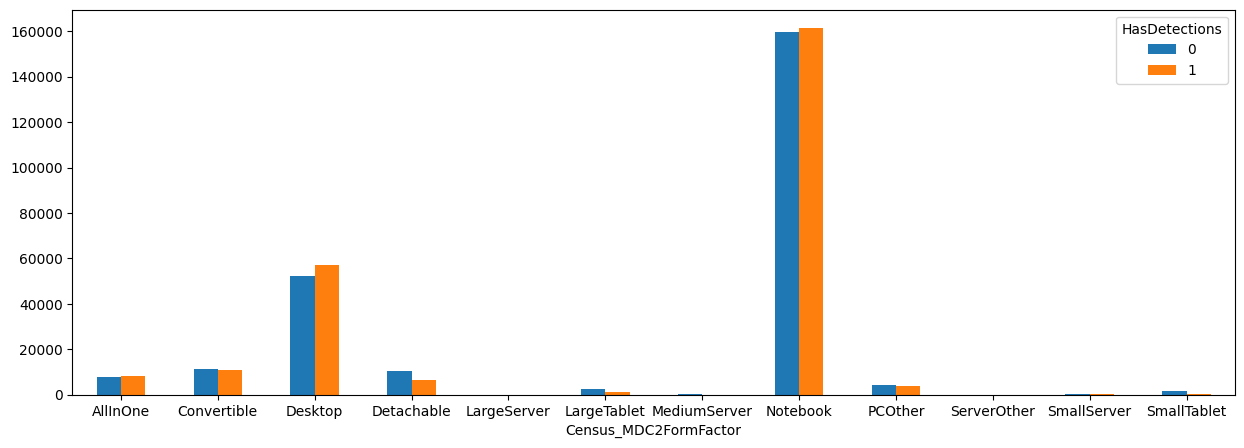

<Figure size 1500x500 with 0 Axes>

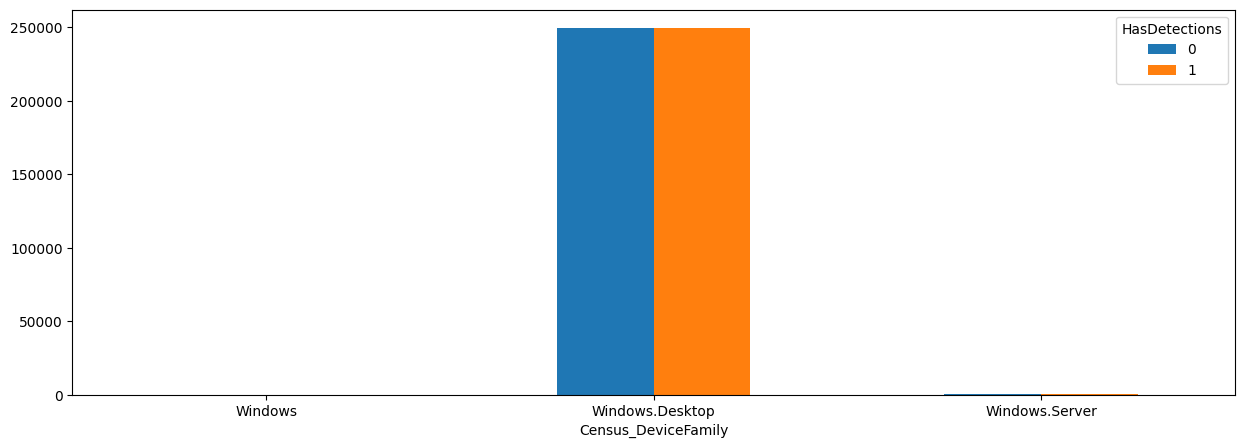

<Figure size 1500x500 with 0 Axes>

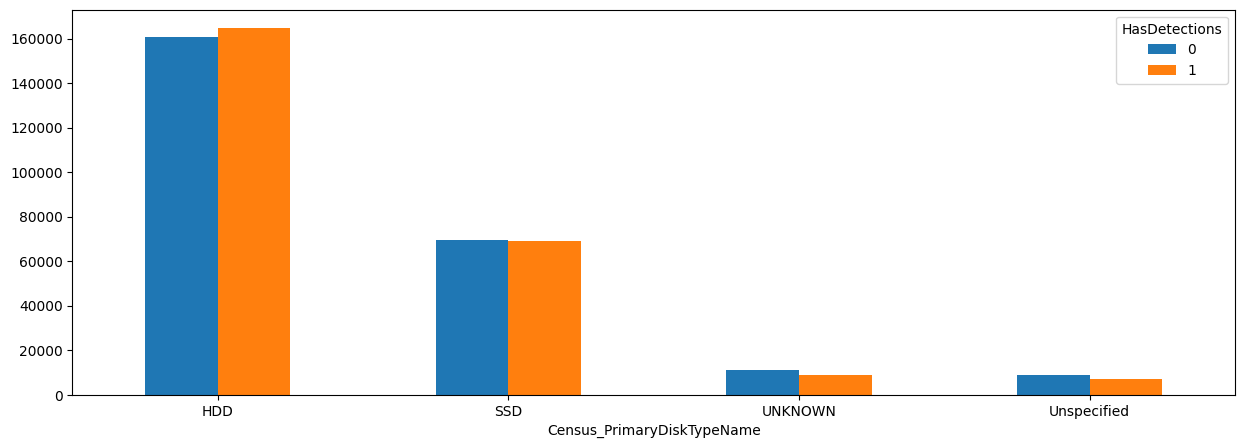

<Figure size 1500x500 with 0 Axes>

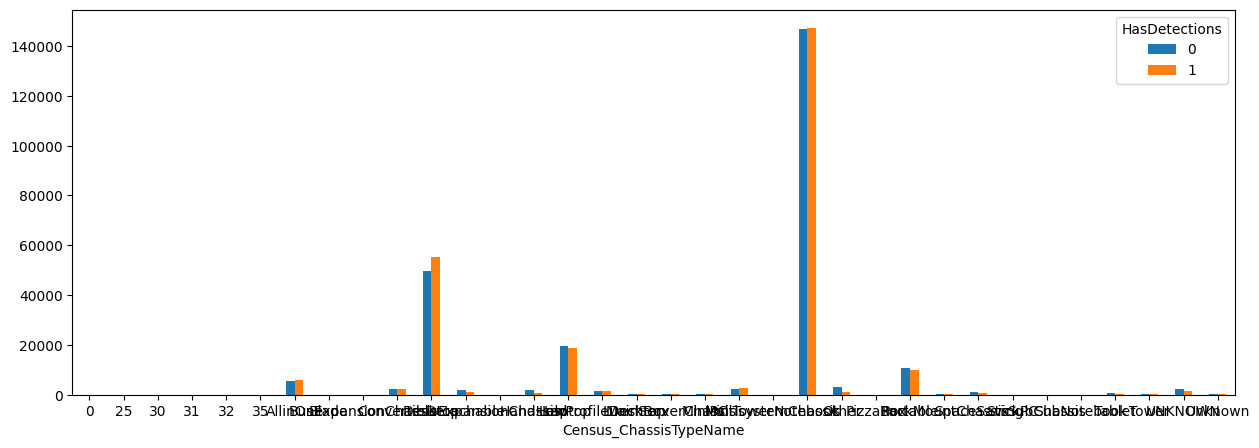

<Figure size 1500x500 with 0 Axes>

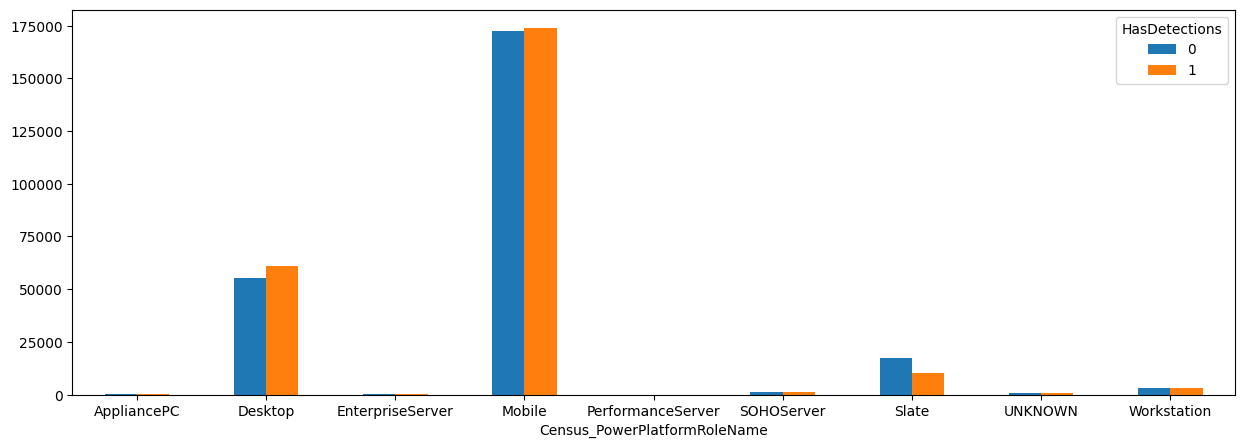

<Figure size 1500x500 with 0 Axes>

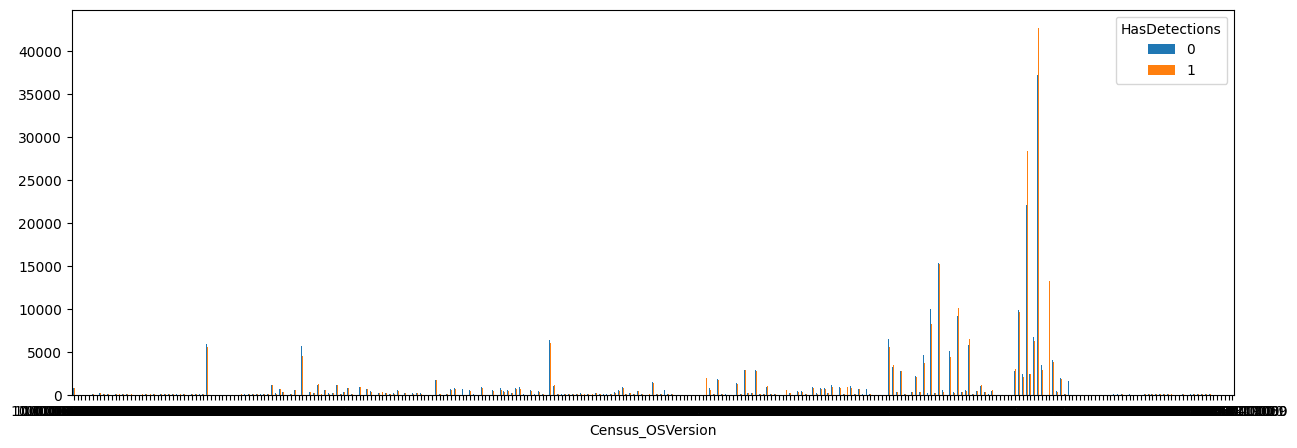

<Figure size 1500x500 with 0 Axes>

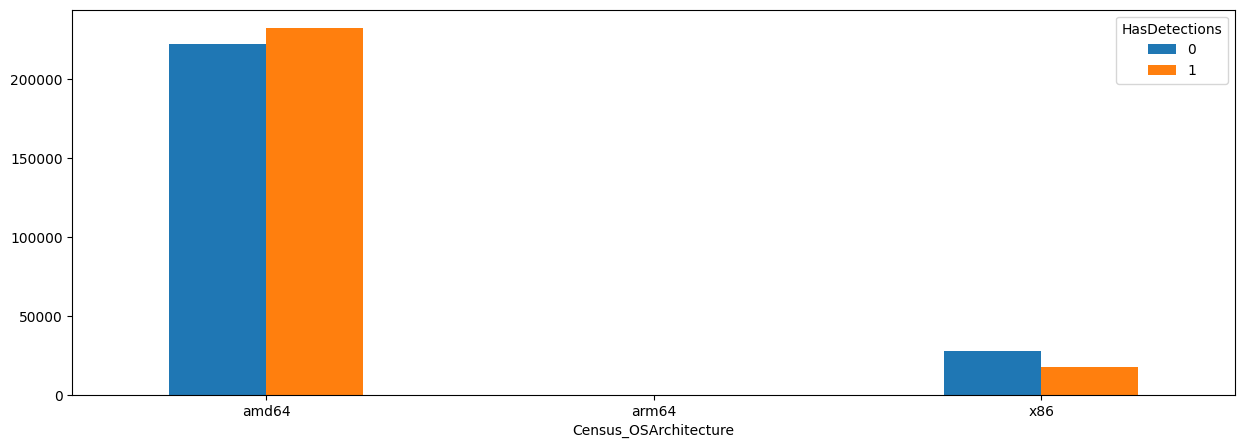

<Figure size 1500x500 with 0 Axes>

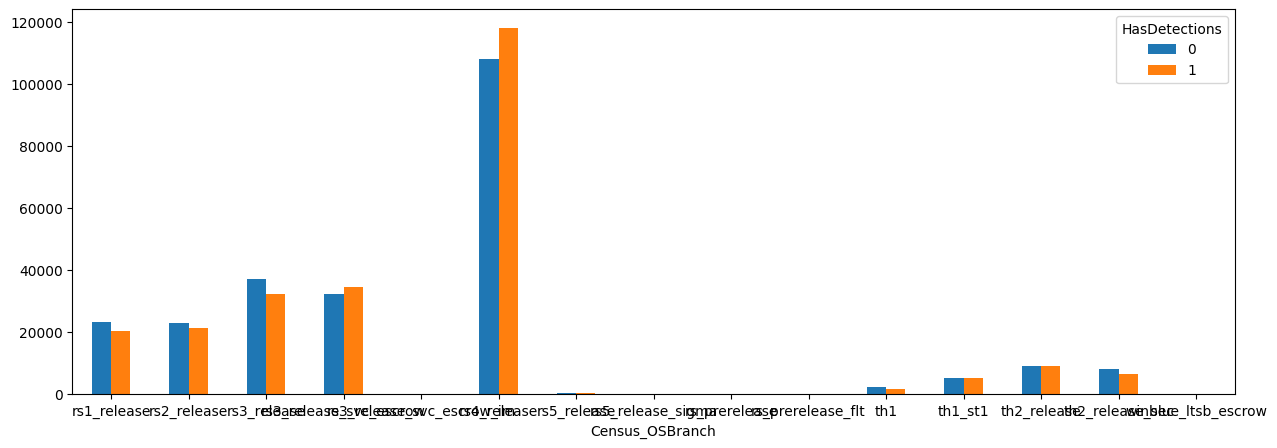

<Figure size 1500x500 with 0 Axes>

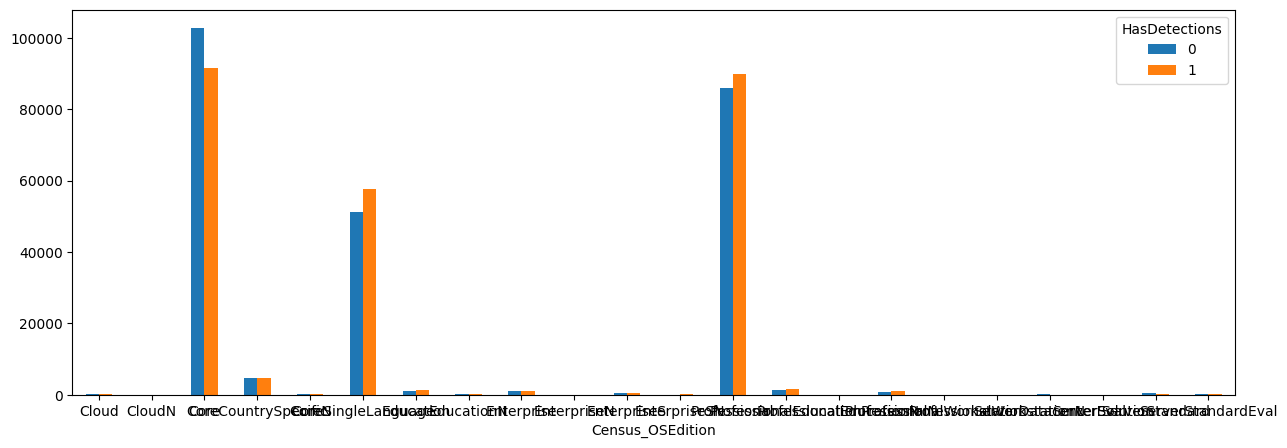

<Figure size 1500x500 with 0 Axes>

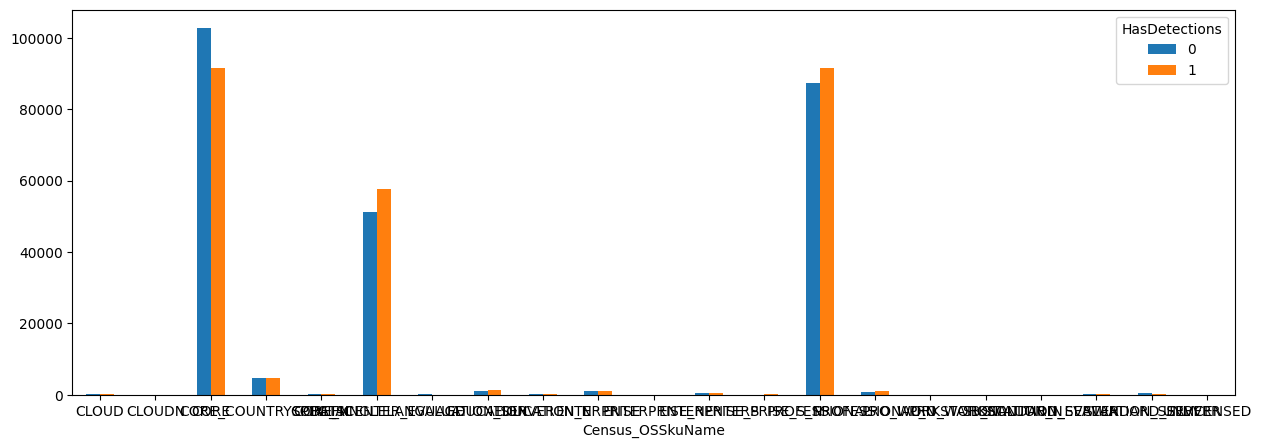

<Figure size 1500x500 with 0 Axes>

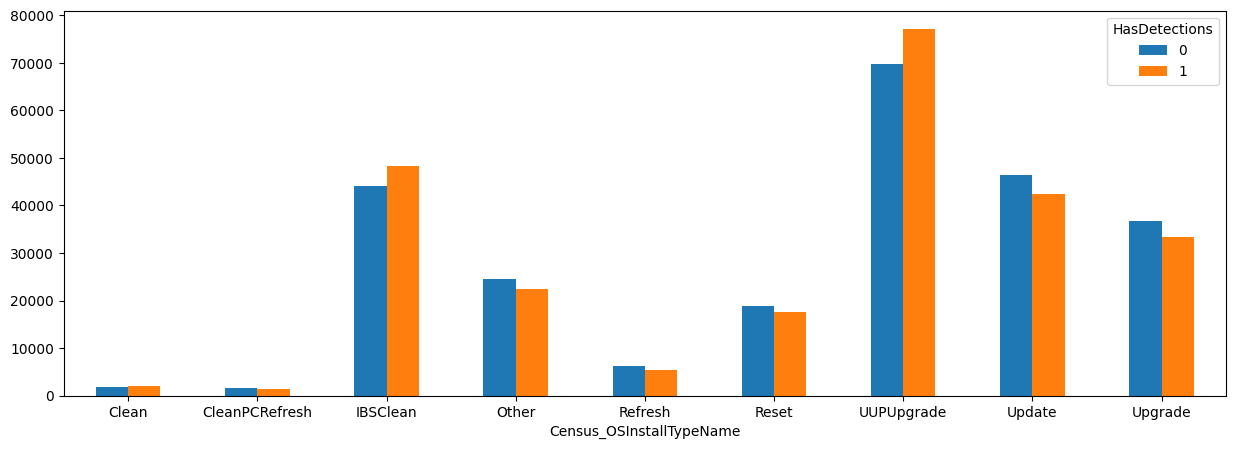

<Figure size 1500x500 with 0 Axes>

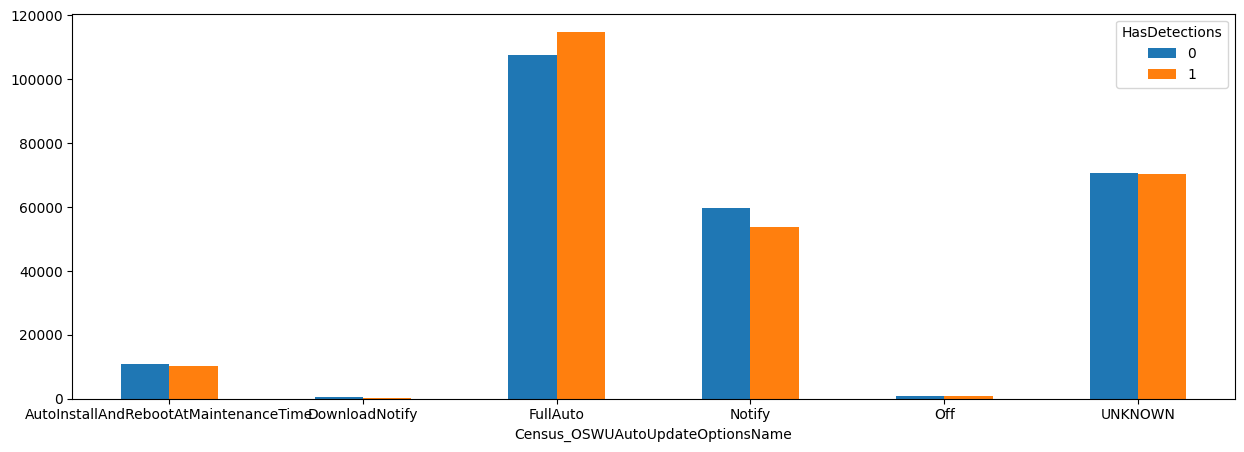

<Figure size 1500x500 with 0 Axes>

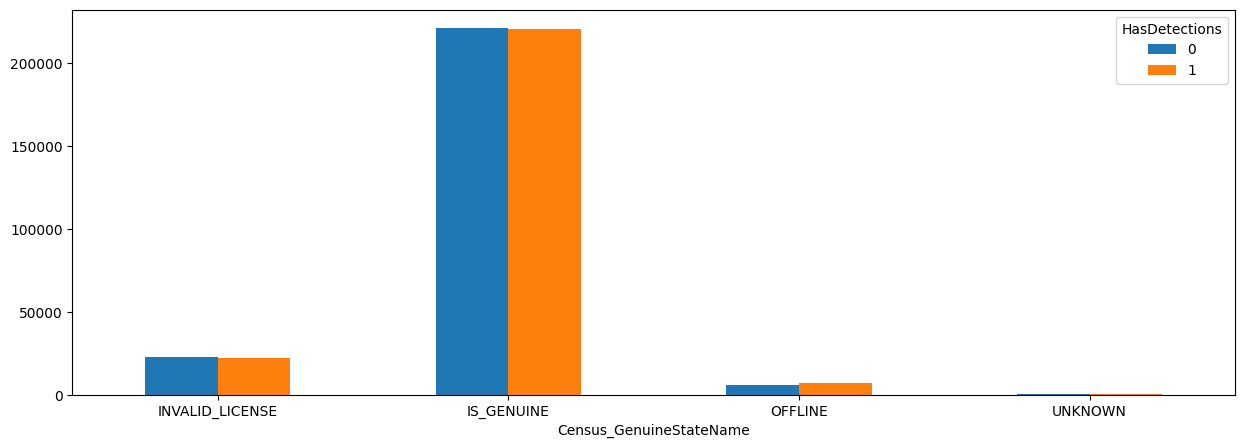

<Figure size 1500x500 with 0 Axes>

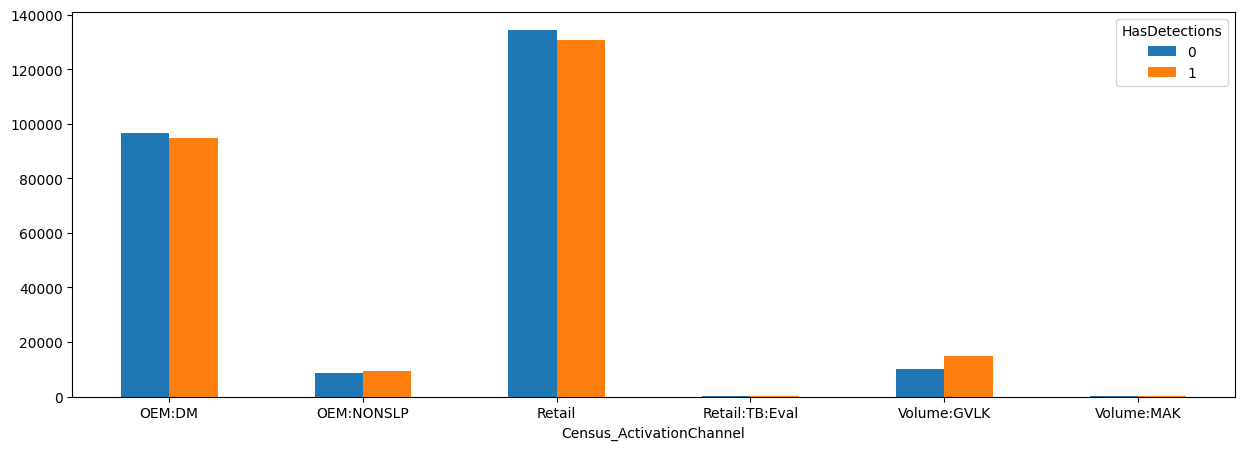

<Figure size 1500x500 with 0 Axes>

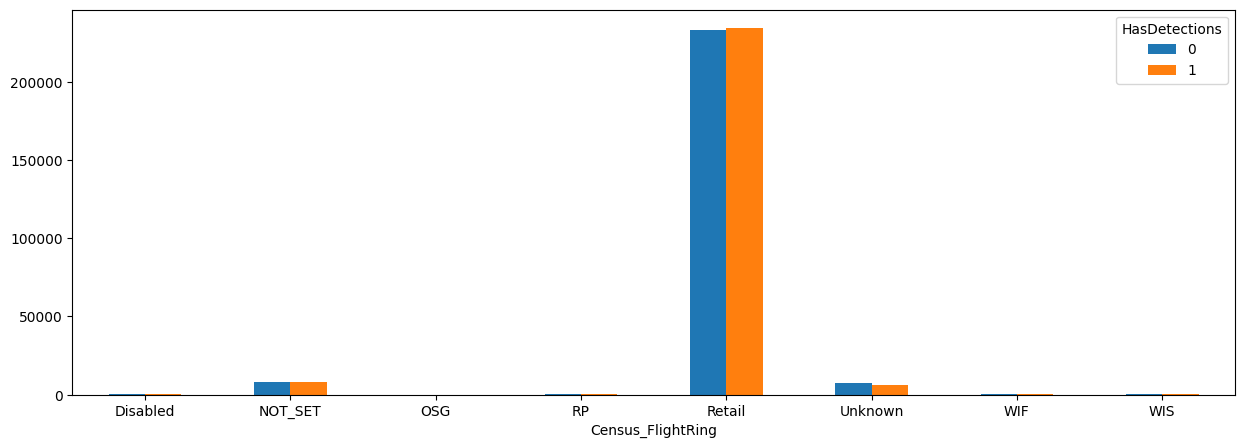

In [334]:
for c in categoric_cols:
    plot_barplot_by_target(df,c,target_name=target_col,stacked=False)

# VALORES DUPLICADOS


In [335]:
#Compruebo si hay filas duplicadas
len(df.drop_duplicates()) / len(df) 

1.0

In [336]:
#Tampoco hay filas duplicadas respecto al identificador "MachineIdentifier"
len(df.drop_duplicates(subset = ['MachineIdentifier'])) / len(df) 

1.0

# VALORES NULOS

In [337]:
pd.reset_option('display.max_rows', None)
total=df.isnull().sum().sort_values(ascending=False)
porcentaje=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_data=pd.concat([total,porcentaje], axis=1, keys=['Total','Porcentaje'])
missing_data[missing_data['Total'] != 0].reset_index()

index   Total  Porcentaje
0                                         SmartScreen  178596     35.7192
1                              OrganizationIdentifier  154563     30.9126
2                                               SMode   29848      5.9696
3                                      CityIdentifier   18240      3.6480
4                               Wdft_RegionIdentifier   16950      3.3900
5                                        Wdft_IsGamer   16950      3.3900
6               Census_InternalBatteryNumberOfCharges   15038      3.0076
7               Census_FirmwareManufacturerIdentifier   10349      2.0698
8                    Census_FirmwareVersionIdentifier    9061      1.8122
9                            Census_IsFlightsDisabled    8933      1.7866
10                          Census_OEMModelIdentifier    5764      1.1528
11                           Census_OEMNameIdentifier    5381      1.0762
12                                           Firewall    5162      1.0324
13                            Census_TotalPhysicalRAM    4556      0.9112
14            Census_IsAlwaysOnAlwaysConnectedCapable    4040      0.8080
15                 Census_OSInstallLanguageIdentifier    3332      0.6664
16                                    IeVerIdentifier    3209      0.6418
17                   Census_SystemVolumeTotalCapacity    2976      0.5952
18                    Census_PrimaryDiskTotalCapacity    2976      0.5952
19  Census_InternalPrimaryDiagonalDisplaySizeInInches    2654      0.5308
20    Census_InternalPrimaryDisplayResolutionVertical    2650      0.5300
21  Census_InternalPrimaryDisplayResolutionHorizontal    2650      0.5300
22                    Census_ProcessorModelIdentifier    2349      0.4698
23                          Census_ProcessorCoreCount    2347      0.4694
24             Census_ProcessorManufacturerIdentifier    2347      0.4694
25                                  AVProductsEnabled    1938      0.3876
26                                AVProductsInstalled    1938      0.3876
27                          AVProductStatesIdentifier    1938      0.3876
28                                        IsProtected    1926      0.3852
29                                   RtpStateBitfield    1832      0.3664
30                             Census_IsVirtualDevice     901      0.1802
31                         Census_PrimaryDiskTypeName     709      0.1418
32                                       UacLuaenable     623      0.1246
33                             Census_ChassisTypeName      37      0.0074
34                                  GeoNameIdentifier      16      0.0032
35                       Census_PowerPlatformRoleName       2      0.0004
36                                         OsBuildLab       1      0.0002

In [338]:
#Para imputar los valores nulos en las variables numéricas vamos a utilizar un valor fuera de rango (-1)

for c in numeric_cols:
    df[c]=df[c].fillna(-1)

In [339]:
#Las variables binarias las voy a separar de las numéricas para evitar aplicarle el OHE
binary_cols=['Census_HasOpticalDiskDrive',
             'Census_IsAlwaysOnAlwaysConnectedCapable',
             'Census_IsPenCapable',
            'Census_IsPortableOperatingSystem',
            'Census_IsSecureBootEnabled',
            'Census_IsTouchEnabled',
            'Census_IsVirtualDevice',
            'Firewall',
            'HasTpm',
            'IsProtected',
            'IsSxsPassiveMode',
            'SMode',
            'Wdft_IsGamer']

#En este caso imputo la moda
for c in binary_cols:
    df[c]=df[c].fillna(df[c].mode()[0])

In [340]:
pd.reset_option('display.max_rows', None)
total=df.isnull().sum().sort_values(ascending=False)
porcentaje=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_data=pd.concat([total,porcentaje], axis=1, keys=['Total','Porcentaje'])
missing_data[missing_data['Total'] != 0].reset_index()

index   Total  Porcentaje
0                              SmartScreen  178596     35.7192
1                   OrganizationIdentifier  154563     30.9126
2                           CityIdentifier   18240      3.6480
3                    Wdft_RegionIdentifier   16950      3.3900
4    Census_FirmwareManufacturerIdentifier   10349      2.0698
5         Census_FirmwareVersionIdentifier    9061      1.8122
6                Census_OEMModelIdentifier    5764      1.1528
7                 Census_OEMNameIdentifier    5381      1.0762
8       Census_OSInstallLanguageIdentifier    3332      0.6664
9                          IeVerIdentifier    3209      0.6418
10         Census_ProcessorModelIdentifier    2349      0.4698
11  Census_ProcessorManufacturerIdentifier    2347      0.4694
12               AVProductStatesIdentifier    1938      0.3876
13              Census_PrimaryDiskTypeName     709      0.1418
14                  Census_ChassisTypeName      37      0.0074
15                       GeoNameIdentifier      16      0.0032
16            Census_PowerPlatformRoleName       2      0.0004
17                              OsBuildLab       1      0.0002

In [341]:
#Para los valores de tipo  identifier también imputo la moda

In [342]:
identifiers_c_null = df.filter(like='Identifier', axis=1).loc[:, df.filter(like='Identifier', axis=1).isna().any()]
df[identifiers_c_null.columns] = df[identifiers_c_null.columns].apply(lambda x: x.fillna(x.mode().iloc[0]), axis=0)

In [343]:
pd.reset_option('display.max_rows', None)
total=df.isnull().sum().sort_values(ascending=False)
porcentaje=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_data=pd.concat([total,porcentaje], axis=1, keys=['Total','Porcentaje'])
missing_data[missing_data['Total'] != 0].reset_index()

index   Total  Porcentaje
0                   SmartScreen  178596     35.7192
1    Census_PrimaryDiskTypeName     709      0.1418
2        Census_ChassisTypeName      37      0.0074
3  Census_PowerPlatformRoleName       2      0.0004
4                    OsBuildLab       1      0.0002

In [344]:
#El resto de columnas las ire limpiando una a una.



In [345]:
#En el caso de 'SmartScreen' imputare el valor 'UNKNOWN' cuando existan nulos
df['SmartScreen'].value_counts()

SmartScreen
RequireAdmin    241594
ExistsNotSet     58497
Off              10388
Warn              7530
Prompt            1950
Block             1274
off                 75
On                  53
&#x02;              20
&#x01;              14
on                   8
requireadmin         1
Name: count, dtype: int64

In [346]:
df['SmartScreen']=np.where(df.SmartScreen.isna(),'UNKNOWN',df['SmartScreen'])

In [347]:
#Como veo que hay varios valores como On y Off que están escritos de distinta forma 
#Aplicare un mapping para unificarlos y evitar que se formen columnas innecesarias al realizar el OHE

In [348]:
df['SmartScreen'] = df['SmartScreen'].str.lower()

#Hago un diccionario con las cosas que quiero modificar
mapping = {
    'requireadmin': 'RequireAdmin',
    'existsnotset': 'ExistsNotSet',
    'off': 'Off',
    'on': 'On',
    '&#x02;': '&#x02;',
    '&#x01;': '&#x01;'
}
df['SmartScreen'] = df['SmartScreen'].map(mapping)
df['SmartScreen'].value_counts()

SmartScreen
RequireAdmin    241595
ExistsNotSet     58497
Off              10463
On                  61
&#x02;              20
&#x01;              14
Name: count, dtype: int64

In [349]:
#En el caso de la columna "Census_PrimaryDiskTypeName" tambien imputare el valor 'UNKNOWN' cuando existan nulos.
#Ademas nombrare los valores que estan en 'Unspecified' como 'UNKNOWN' ya que significan lo mismo.
df["Census_PrimaryDiskTypeName"].value_counts()

Census_PrimaryDiskTypeName
HDD            325429
SSD            138155
UNKNOWN         20083
Unspecified     15624
Name: count, dtype: int64

In [350]:
df["Census_PrimaryDiskTypeName"].isna().sum()

709

In [351]:
df['Census_PrimaryDiskTypeName']=np.where(df.SmartScreen.isna(),'UNKNOWN',df['Census_PrimaryDiskTypeName'])


In [352]:
remplazo={'Unspecified':"UNKNOWN"}

df["Census_PrimaryDiskTypeName"].replace(remplazo,inplace=True)

In [353]:
df['Census_ChassisTypeName'].value_counts()

Census_ChassisTypeName
Notebook               294232
Desktop                104979
Laptop                  38261
Portable                20181
AllinOne                11407
MiniTower                4849
Convertible              4685
Other                    4215
UNKNOWN                  3695
Detachable               2930
LowProfileDesktop        2878
HandHeld                 2652
SpaceSaving              1689
Tablet                    730
Tower                     692
Unknown                   575
MainServerChassis         512
MiniPC                    261
LunchBox                  224
RackMountChassis          189
SubNotebook                47
BusExpansionChassis        38
30                         11
StickPC                     7
0                           5
Blade                       3
35                          3
PizzaBox                    3
MultisystemChassis          3
SubChassis                  2
31                          2
ExpansionChassis            1
32               

In [354]:
df['Census_ChassisTypeName']=np.where(df['Census_ChassisTypeName'].isna(),'UNKNOWN',df['Census_ChassisTypeName'])

In [355]:
#En este caso como el numero de categorias es tan alto (34). aplico un mapeo para reducir el numero de categorias y quedarme solamente con las que tengan menos de 500 valores, el resto las agrupo en una categoria llamada 'minorities'

df['Census_ChassisTypeName'] = np.where(df['Census_ChassisTypeName'].map(df['Census_ChassisTypeName'].value_counts()) < 500, 'Minorities', df['Census_ChassisTypeName'])

In [356]:
df['Census_ChassisTypeName'].value_counts()

Census_ChassisTypeName
Notebook             294232
Desktop              104979
Laptop                38261
Portable              20181
AllinOne              11407
MiniTower              4849
Convertible            4685
Other                  4215
UNKNOWN                3732
Detachable             2930
LowProfileDesktop      2878
HandHeld               2652
SpaceSaving            1689
Minorities              801
Tablet                  730
Tower                   692
Unknown                 575
MainServerChassis       512
Name: count, dtype: int64

In [357]:
df['Census_ChassisTypeName'].nunique()

18

In [358]:
print(df["Census_PowerPlatformRoleName"].value_counts())
print(df['Census_PowerPlatformRoleName'].isna().sum())

Census_PowerPlatformRoleName
Mobile               346378
Desktop              116054
Slate                 27475
Workstation            6235
SOHOServer             2062
UNKNOWN                1172
EnterpriseServer        406
AppliancePC             212
PerformanceServer         4
Name: count, dtype: int64
2


In [359]:
#Como solo tengo 2 nulos en 'Census_PowerPlatformRoleName', los elimino ya que no tienen ninguna importancia...
df = df.dropna(subset=['Census_PowerPlatformRoleName'])

In [360]:
#Hago lo mismo con 'OsBuildLab'
df = df.dropna(subset=['OsBuildLab'])

In [361]:
#Al tener 453 categorias distintas vuelvo a realizar un mapeo para agrupar categorias minoritarias y que esta columna no sea tan pesada a la hora de hacer el OHE
print(df['OsBuildLab'].nunique())
df['OsBuildLab'].value_counts()

453


OsBuildLab
17134.1.amd64fre.rs4_release.180410-1804                 206436
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908     69884
16299.15.amd64fre.rs3_release.170928-1534                 53826
15063.0.amd64fre.rs2_release.170317-1834                  39908
17134.1.x86fre.rs4_release.180410-1804                    14334
                                                          ...  
7600.17273.amd64fre.win7_gdr.130318-1532                      1
7600.17118.amd64fre.win7_gdr.120830-0334                      1
7600.16841.amd64fre.win7_gdr.110622-1503                      1
18219.1000.amd64fre.rs_prerelease.180810-1721                 1
9600.19128.amd64fre.winblue_ltsb_escrow.180813-1030           1
Name: count, Length: 453, dtype: int64

In [362]:
df['OsBuildLab'] = np.where(df['OsBuildLab'].map(df['OsBuildLab'].value_counts()) < 500, 'Minorities', df['OsBuildLab'])

In [363]:
df['OsBuildLab'].nunique()

52

# ONE HOTE ENCODING

In [364]:
#Antes de hacer el OHE, voy a mirar si hay variables con muchas categorias para evitar que el df sea demasiado grande

In [365]:
num_categorias = df[categoric_cols].nunique()


In [366]:
num_categorias_alto=num_categorias[num_categorias > 12].index.to_list()
num_categorias_alto

['EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'OsVer',
 'OsBuildLab',
 'Census_ChassisTypeName',
 'Census_OSVersion',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName']

In [367]:
#Creo esta funcion para agrupar en una categoría llamada 'Others' a las variables que excedan cierto numero de categorías
def codificacion_inicial(variable,num):
    conteo=df[variable].value_counts()
    otros=conteo[conteo<num].index.tolist()
    df[variable]=df[variable].apply(lambda x: 'Others'if x in otros else x)

In [368]:
print(df["EngineVersion"].value_counts())
print(df["AppVersion"].value_counts())
print(df["AvSigVersion"].value_counts())
print(df["OsVer"].value_counts())
print(df["OsBuildLab"].value_counts())
print(df["Census_ChassisTypeName"].value_counts())
print(df["Census_OSVersion"].value_counts())
print(df["Census_OSBranch"].value_counts())
print(df["Census_OSEdition"].value_counts())
print(df["Census_OSSkuName"].value_counts())


EngineVersion
1.1.15200.1    216491
1.1.15100.1    205493
1.1.15000.2     14751
1.1.14901.4     11984
1.1.14600.4      9005
1.1.14800.3      7548
1.1.15300.6      6769
1.1.14104.0      5240
1.1.15300.5      3883
1.1.13504.0      3876
1.1.14700.5      2593
1.1.14500.5      2590
1.1.14405.2      1972
1.1.14306.0      1329
1.1.14202.0       840
1.1.14003.0       804
1.1.13303.0       516
1.1.13903.0       515
1.1.13804.0       513
1.1.13407.0       479
1.1.13601.0       420
1.1.12902.0       321
1.1.14305.0       270
1.1.13704.0       255
1.1.13701.0       255
1.1.13202.0       245
1.1.13103.0       235
1.1.13000.0       220
1.1.15000.1       138
1.1.12805.0       115
1.1.14901.3        71
1.1.14700.4        65
1.1.14700.3        61
1.1.14800.1        51
1.1.14500.2        19
1.1.14201.0        11
1.1.14303.0        10
1.1.12101.0         7
1.1.14103.0         5
1.1.13902.0         4
1.1.13802.0         4
1.1.12804.0         4
1.1.13803.0         3
1.1.12603.0         3
1.1.11701.0       

In [369]:
codificacion_inicial('EngineVersion',800)
codificacion_inicial('AppVersion',10000)
codificacion_inicial("AvSigVersion",3000)
codificacion_inicial("OsVer",5000)
codificacion_inicial("OsBuildLab",20000)
codificacion_inicial("Census_ChassisTypeName",3000)
codificacion_inicial("Census_OSVersion",10000)
codificacion_inicial("Census_OSBranch",4000)
codificacion_inicial("Census_OSEdition",1000)
codificacion_inicial("Census_OSSkuName",500)

In [371]:
#Ahora hago lo mismo con las variables de tipo identificador
unique_counts_id = df[id_cols].nunique()
print(unique_counts_id)

MachineIdentifier                         499997
AVProductStatesIdentifier                   5516
CountryIdentifier                            222
CityIdentifier                             37156
OrganizationIdentifier                        44
GeoNameIdentifier                            268
LocaleEnglishNameIdentifier                  215
IeVerIdentifier                              179
Census_OEMNameIdentifier                    1279
Census_OEMModelIdentifier                  40697
Census_ProcessorManufacturerIdentifier         4
Census_ProcessorModelIdentifier             1767
Census_OSInstallLanguageIdentifier            39
Census_OSUILocaleIdentifier                   92
Census_FirmwareManufacturerIdentifier        303
Census_FirmwareVersionIdentifier           23569
Wdft_RegionIdentifier                         15
dtype: int64


In [372]:
#Como se puede ver, la mayoria de variables tienen valores muy altos por lo que solo me quedaré con las que tengan menos de 50 unique values

menos_50_cat = unique_counts_id[unique_counts_id<50].index.tolist()
mas_50_cat = unique_counts_id[unique_counts_id > 50].index.tolist()
df.drop(columns=mas_50_cat, inplace=True)

In [373]:
menos_50_cat

['OrganizationIdentifier',
 'Census_ProcessorManufacturerIdentifier',
 'Census_OSInstallLanguageIdentifier',
 'Wdft_RegionIdentifier']

In [374]:
#Repito lo mismo que hice con las variables categóricas
print(df["OrganizationIdentifier"].value_counts())
print(df["Census_ProcessorManufacturerIdentifier"].value_counts())
print(df["Census_OSInstallLanguageIdentifier"].value_counts())
print(df["Wdft_RegionIdentifier"].value_counts())

OrganizationIdentifier
27.0    389445
18.0     98842
48.0      3658
50.0      2538
37.0      1048
11.0      1037
49.0       747
46.0       641
14.0       255
32.0       230
36.0       207
52.0       174
33.0       171
2.0        153
5.0        110
40.0       100
28.0        98
4.0         79
10.0        69
51.0        53
1.0         39
20.0        38
8.0         37
6.0         25
31.0        23
47.0        22
22.0        21
39.0        21
3.0         20
21.0        19
16.0        16
19.0        10
29.0         8
42.0         8
7.0          7
44.0         6
26.0         6
43.0         4
45.0         4
41.0         2
35.0         2
23.0         2
25.0         1
17.0         1
Name: count, dtype: int64
Census_ProcessorManufacturerIdentifier
5.0     441373
1.0      58603
10.0        14
3.0          7
Name: count, dtype: int64
Census_OSInstallLanguageIdentifier
8.0     181736
9.0      58012
7.0      28766
29.0     27669
14.0     24191
37.0     22635
10.0     20268
26.0     18520
5.0      14

In [375]:
codificacion_inicial('OrganizationIdentifier',300)
codificacion_inicial('Census_ProcessorManufacturerIdentifier',50000)
codificacion_inicial("Census_OSInstallLanguageIdentifier",10000)
codificacion_inicial("Wdft_RegionIdentifier",7000)

In [376]:
#Una vez ya he terminado de hacer la codificacion inicial creo una copia del df
df_1=df.copy()

In [377]:
col_dummies=categoric_cols + menos_50_cat

df_1=pd.get_dummies(df_1,columns=col_dummies)


In [378]:
feature_names_after_ohe = df_1.columns.tolist()

In [379]:
feature_names_after_ohe

['IsBeta',
 'RtpStateBitfield',
 'IsSxsPassiveMode',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'HasTpm',
 'OsBuild',
 'OsSuite',
 'IsProtected',
 'AutoSampleOptIn',
 'SMode',
 'Firewall',
 'UacLuaenable',
 'Census_ProcessorCoreCount',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_HasOpticalDiskDrive',
 'Census_TotalPhysicalRAM',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_InternalBatteryNumberOfCharges',
 'Census_OSBuildNumber',
 'Census_OSBuildRevision',
 'Census_IsPortableOperatingSystem',
 'Census_IsFlightsDisabled',
 'Census_IsSecureBootEnabled',
 'Census_IsVirtualDevice',
 'Census_IsTouchEnabled',
 'Census_IsPenCapable',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'Wdft_IsGamer',
 'HasDetections',
 'ProductName_mse',
 'ProductName_mseprerelease',
 'ProductName_win8defender',
 'EngineVersion_1.1.13504.0',
 'EngineVers

In [380]:
#Al final, me quedan 272 columnas con las que trabajar en el modelo
df_1.shape

(499997, 272)

# ENTRENAMIENTO DEL MODELO

In [383]:
from sklearn.model_selection import train_test_split


X = df_1.drop(columns = target_col) # Matriz de inputs
y = df_1[target_col]

# Partición en train/test con un porcentaje para el test del 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 2112)

# Número de registros del dataset de train y de test
print("Número de observaciones")
print("- Train: ", X_train.shape[0])
print("- Test:  ", X_test.shape[0])

Número de observaciones
- Train:  399997
- Test:   100000


In [384]:
from sklearn.tree import DecisionTreeClassifier

#Instanciación del modelo
clf = DecisionTreeClassifier(max_depth = 10)

In [385]:
#Entrenamiento del modelo
clf.fit(X_train, y_train)
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [386]:
y_pred = clf.predict(X_test)

In [387]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred).round(2)

0.62

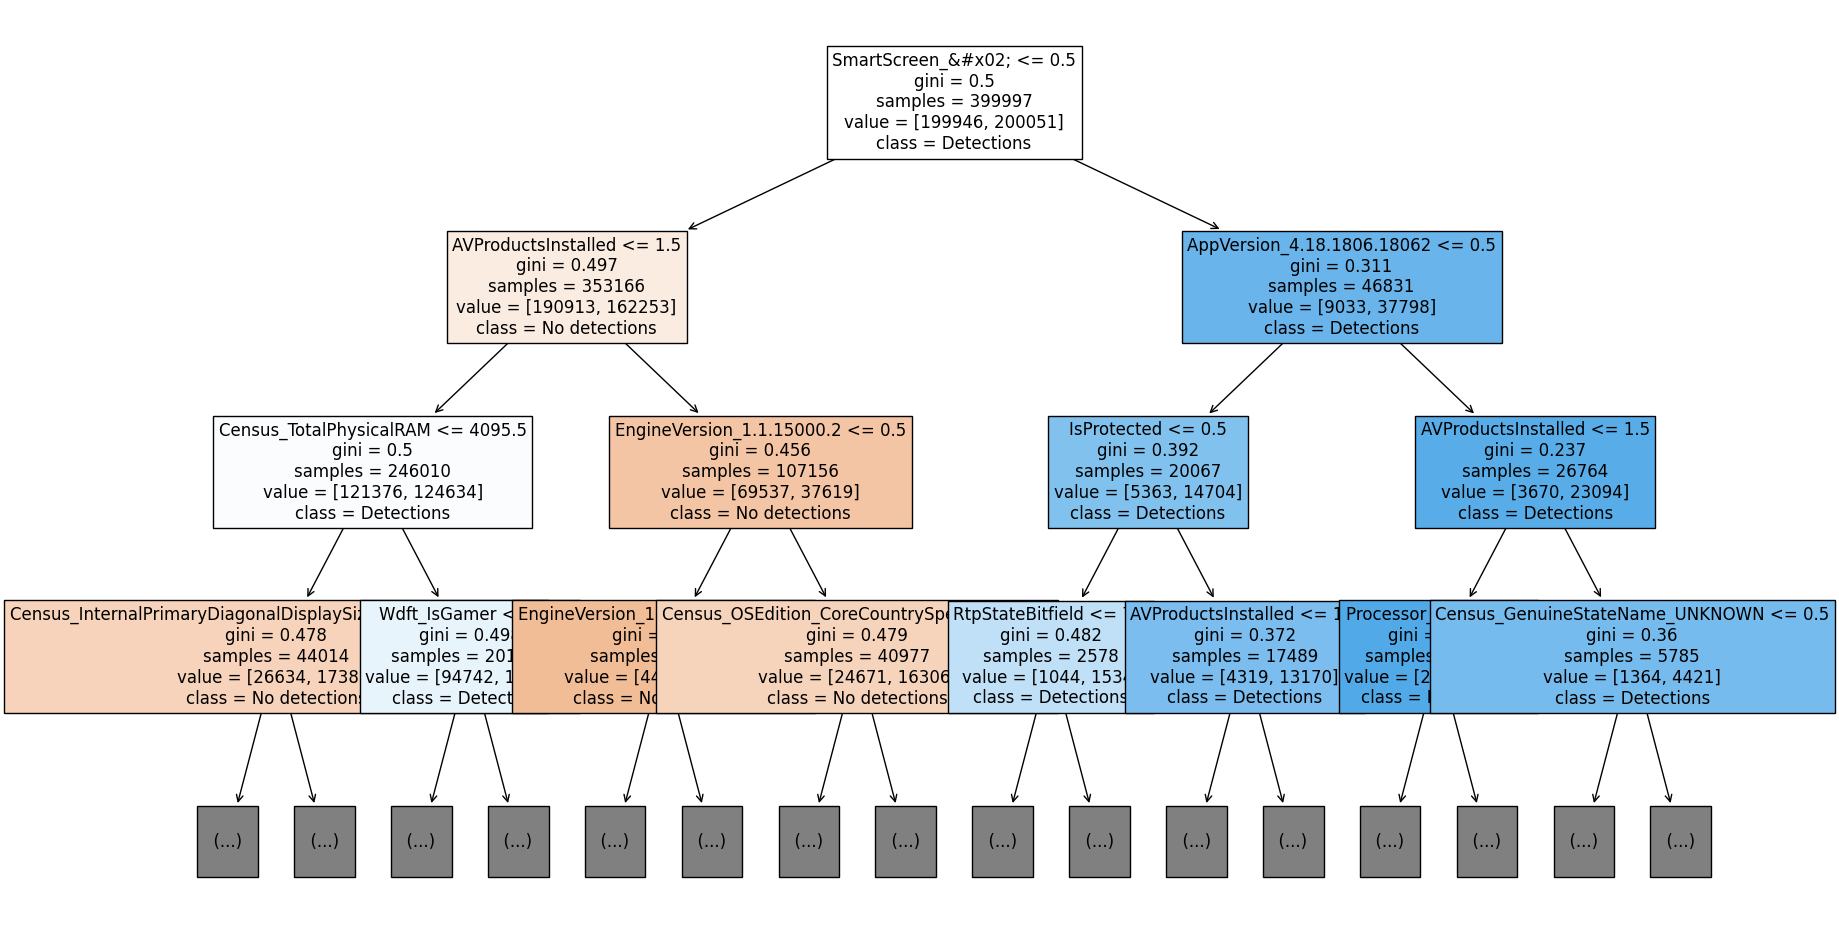

In [388]:
from sklearn.tree import plot_tree
# Visualización del árbol de decisión
fig = plt.figure(figsize=(20, 12))
plot_tree(
    clf,
    max_depth = 3,
    filled = True,
    class_names = ["No detections", "Detections"],
    feature_names = feature_names_after_ohe,
    fontsize = 12
)
plt.show()

# SELECCION DEL MEJOR MODELO

In [389]:
import numpy as np
from numpy.random import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


## DECISION TREE

In [392]:



decision_tree_params = {
    'criterion': ["gini", "entropy"],
    'max_depth': [1,2,3,4,5,6,7,8,9,10],
    'min_samples_leaf': [1,2,3,4,5]
}

decision_tree = DecisionTreeClassifier()
clf_random_search_decision_tree = RandomizedSearchCV(
    estimator=decision_tree,
    param_distributions=decision_tree_params,
    n_iter=5,
    cv=5,
    scoring="roc_auc",
    return_train_score=True,
    refit=True,
    n_jobs=-1,
    verbose=3,
    random_state=2112
)
clf_random_search_decision_tree.fit(X_train, y_train)

# Resultados del Random Search para Decision Tree
df_output_decision_tree = pd.DataFrame(clf_random_search_decision_tree.cv_results_)
 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


## RANDOM FOREST

In [394]:
lista_numeros = [i for i in range(10, 51)]
print(lista_numeros)

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [395]:
random_forest_params = {
    'criterion': ["gini", "entropy"],
    'max_depth': [2,3,4,5,6,7,8,9,10],
    'min_samples_leaf':[1,2,3,4,5],
    'n_estimators': lista_numeros
}

random_forest = RandomForestClassifier(n_jobs=-1)
clf_random_search_random_forest = RandomizedSearchCV(
    estimator=random_forest,
    param_distributions=random_forest_params,
    n_iter=5,
    cv=5,
    scoring="roc_auc",
    return_train_score=True,
    refit=True,
    n_jobs=-1,
    verbose=3,
    random_state=2112
)
clf_random_search_random_forest.fit(X_train, y_train)

# Resultados del Random Search para Random Forest
df_output_random_forest = pd.DataFrame(clf_random_search_random_forest.cv_results_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [399]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier


# GRADIENT BOOST

In [400]:
gradient_boosting_params = {
    'max_depth': [2,3,4,5],
    'min_samples_leaf': [1,2,3,4,5],
    'learning_rate': [0.2, 0.1, 0.01],
    'n_estimators': lista_numeros
}

gradient_boosting = GradientBoostingClassifier()
clf_random_search_gradient_boosting = RandomizedSearchCV(
    estimator=gradient_boosting,
    param_distributions=gradient_boosting_params,
    n_iter=5,
    cv=5,
    scoring="roc_auc",
    return_train_score=True,
    refit=True,
    n_jobs=-1,
    verbose=3,
    random_state=2112
)
clf_random_search_gradient_boosting.fit(X_train, y_train)

# Resultados del Random Search para Gradient Boosting
df_output_gradient_boosting = pd.DataFrame(clf_random_search_gradient_boosting.cv_results_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [402]:
from scipy.stats import uniform


In [406]:
lista_100=[c for c in range(10,101)]


# XGBOOST

In [407]:
xgboost_params = {
    'max_depth': [2,3,4,5],
    'n_estimators': lista_100,
    'learning_rate': [0.2, 0.1, 0.01],
    'subsample': uniform(0.8, 0.2)
}

xgboost = XGBClassifier(objective='binary:logistic', n_jobs=-1)
clf_random_search_xgboost = RandomizedSearchCV(
    estimator=xgboost,
    param_distributions=xgboost_params,
    n_iter=5,
    cv=5,
    scoring="roc_auc",
    return_train_score=True,
    refit=True,
    n_jobs=-1,
    verbose=3,
    random_state=2112
)
clf_random_search_xgboost.fit(X_train, y_train)

# Resultados del Random Search para XGBoost
df_output_xgboost = pd.DataFrame(clf_random_search_xgboost.cv_results_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


c:\Users\admin\anaconda3\envs\Nuclio\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\admin\anaconda3\envs\Nuclio\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\admin\anaconda3\envs\Nuclio\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\admin\anaconda3\envs\Nuclio\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

In [408]:
df_output_decision_tree['clf'] = 'DecisionTree'
best_estimator_decision_tree = clf_random_search_decision_tree.best_estimator_

df_output_random_forest['clf'] = 'RandomForest'
best_estimator_random_forest = clf_random_search_random_forest.best_estimator_

df_output_gradient_boosting['clf'] = 'GradientBoosting'
best_estimator_gradient_boosting = clf_random_search_gradient_boosting.best_estimator_

df_output_xgboost['clf'] = 'XGBoost'
best_estimator_xgboost = clf_random_search_xgboost.best_estimator_


In [409]:
# Obtengo el mejor estimador para cada modelo
best_estimators = {
    'DecisionTree': best_estimator_decision_tree,
    'RandomForest': best_estimator_random_forest,
    'GradientBoosting': best_estimator_gradient_boosting,
    'XGBoost': best_estimator_xgboost
}

In [410]:
best_estimators

{'DecisionTree': DecisionTreeClassifier(max_depth=9, min_samples_leaf=2),
 'RandomForest': RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=18,
                        n_jobs=-1),
 'GradientBoosting': GradientBoostingClassifier(max_depth=4, min_samples_leaf=4, n_estimators=42),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=5, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=67, n_jobs=-1, num_parallel

In [411]:
# Concateno todos los resultados para cada modelo
df_results = pd.concat([df_output_decision_tree, df_output_random_forest, df_output_gradient_boosting, df_output_xgboost]).reset_index(drop=True)

split_test_score_columns = ['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']
df_results = df_results[
    ['clf', 'rank_test_score', 'mean_train_score', 'mean_test_score', 'std_test_score', 'params']
    + split_test_score_columns
]

In [412]:
# Me quedo con el mejor modelo de cada tipo
df_best = (
    df_results
    .query('rank_test_score == 1')
    .drop_duplicates(['clf', 'rank_test_score'])
    .sort_values('mean_test_score', ascending=False)
    .reset_index(drop=True)
)

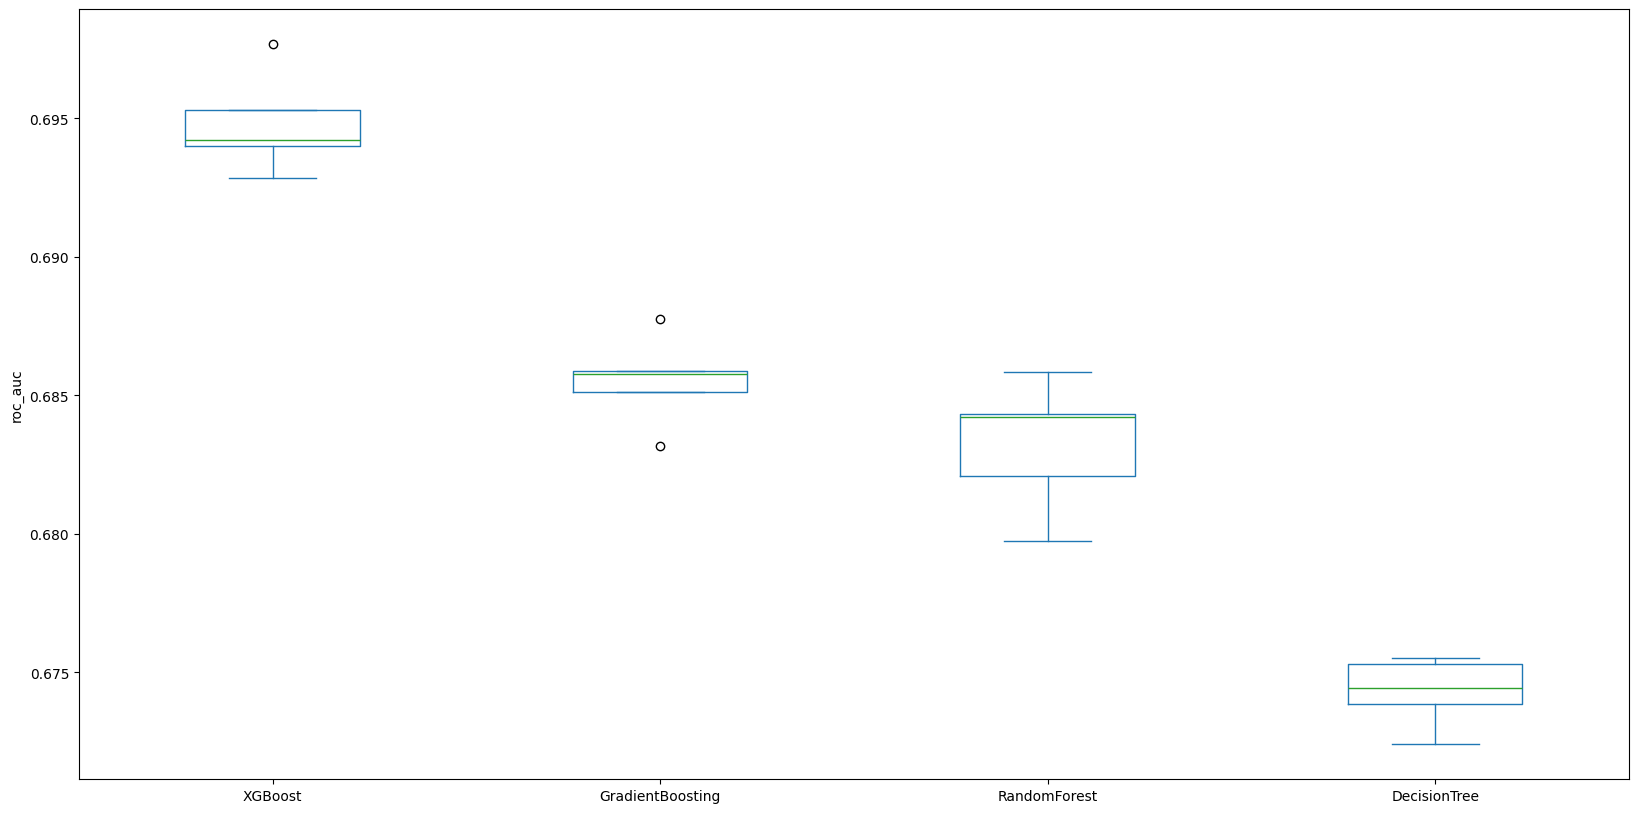

In [413]:
# Boxplot de los scores en test del mejor modelo de cada tipo
df_best.index = df_best['clf']
df_best[split_test_score_columns].T.plot(kind='box', figsize=(20, 10))
plt.ylabel("roc_auc")
plt.show()

In [414]:
for i, r in df_best.iterrows():
    print(r.clf, "=>", np.round(r.mean_test_score, 4), "\u00B1", np.round(r.std_test_score, 4))

XGBoost => 0.6948 ± 0.0016
GradientBoosting => 0.6855 ± 0.0015
RandomForest => 0.6832 ± 0.0021
DecisionTree => 0.6743 ± 0.0011


In [ ]:
#El XGBoost con un resultado de 0.6848 sería el mejor algoritmo para nuestro modelo. 

In [415]:
# Escogemos el mejor modelo de todos
best_model = best_estimators['XGBoost']
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=67, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [416]:
# Obtengo el rendimiento (ROC AUC) sobre los datos de test
y_pred = best_model.predict_proba(X_test)[:,1]
metrics.roc_auc_score(y_test, y_pred)

c:\Users\admin\anaconda3\envs\Nuclio\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\admin\anaconda3\envs\Nuclio\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\admin\anaconda3\envs\Nuclio\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\admin\anaconda3\envs\Nuclio\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

0.6953190031374825

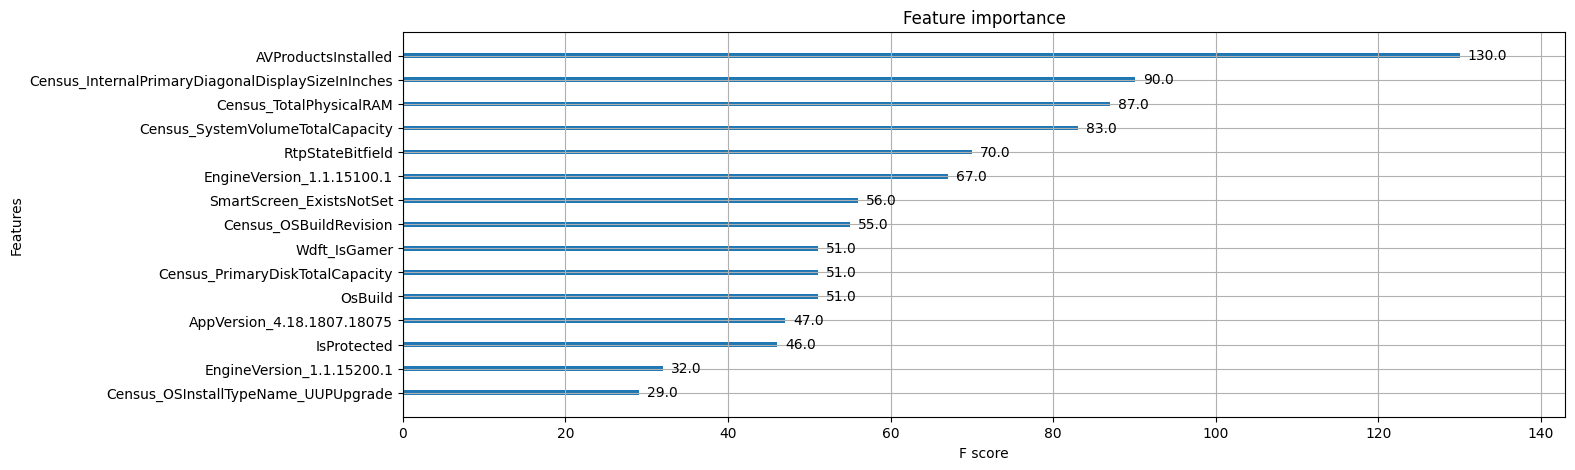

In [429]:
from xgboost import XGBClassifier, plot_importance
# Visualizar la importancia de las variables
plot_importance(best_model, max_num_features=15)
plt.show()

## CONCLUSIONES
* AVProductsInstalled: El numero de antivirus instalados en el dispositivo afecta de forma que si no hay un antivirus instalado el riesgo de malware aumenta.
* Census_InternalPrimaryDiagonalDisplaySizeInInches: Tamaño diagonal de la pantalla principal en pulgadas (No se de que forma afecta a la variable target)
* Census_TotalPhysicalRAM: La cantidad de RAM disponible puede influir en la capacidad del software de seguridad para realizar estos análisis de manera eficiente y completa. Si hay poca RAM disponible, es posible que los análisis sean más lentos o que no se realicen de manera tan exhaustiva.
* Census_SystemVolumeTotalCapacity: Esta variable esta relacionada con la anterior.
* RtpStateBitfield: Si un campo 'RtpStateBitfield' está bien configurado, la probabilidad de que un dispositivo sea atacado por malware disminuye.
* EngineVersion_1.1.15100.1. Version del motor de seguridad. Esta versión es posible que tenga características que sean claves a la hora de detectar malware en un dispositivo.
* SmartScreen_ExistsNoSet:  Esta característica está diseñada para ayudar a proteger contra descargas e instalaciones de software malicioso o no deseado. Por lo tanto, si esta opcion no está activa la probabilidad de que un dispositivo se contagie de malware es mayor.
* Census_OSBuildRevision: Esta variable hace referencia a una cierta revisión específica del sistema operativa Windows.
* Wdft_IsGamer: Esta variable indica si el usuario es considerado 'gamer' es decir, si utiliza su dispositivo para jugar a videojuegos. Es probable que este tipo de usuarios descargue cierto softwares que contengan contenido malicioso el cual facilite la presencia de malware.
* Census_PrimaryDiskTotalCapacity: Capacidad total del disco primario.
* Is_Protected: Si un dispositivo no está dotado de antivirus, es mas probable que se exponga a malware.

In [418]:
import shap

In [419]:
explainer = shap.TreeExplainer(best_model) # Instanciamos explicador
shap_values = explainer(X_train) # Se obtienen las explicaciones (SHAP values)

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


In [420]:
y_pred_raw = best_model.predict(
    X_train, 
    output_margin = True # Predicción en términos de log(odds)
)
# Comprobamos que los SHAP values suman las predicciones marginales
np.abs(shap_values.values .sum(axis = 1) + shap_values.base_values - y_pred_raw).max()

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


1.66893e-06

In [427]:
feature_names = X_test.columns

explanation = shap.Explanation(values=shap_values, base_values=explainer.expected_value, data=X_test,feature_names=feature_names)

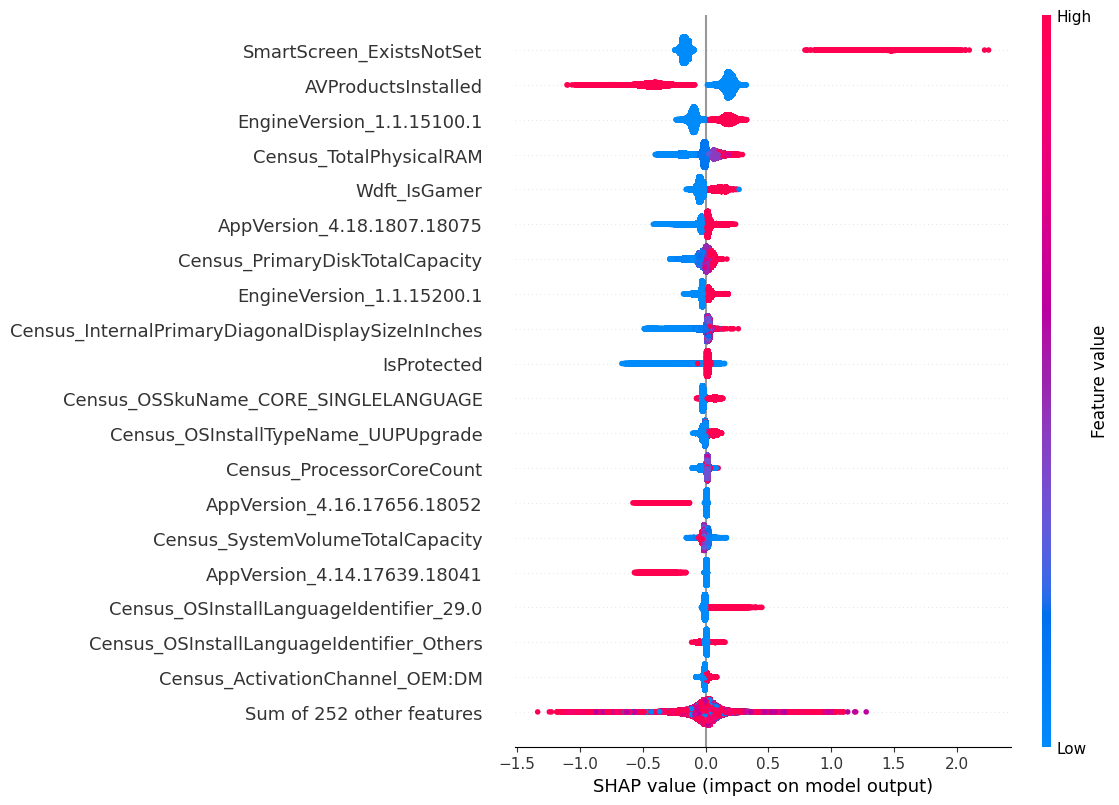

In [428]:
shap.plots.beeswarm(explanation, max_display = 20)